In [241]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re as re
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_data(soup_obj):
    tables=soup_obj.find_all("table")
    rows=[row for row in tables[0].find_all('tr')]
    rows=rows[2:]

    players=[]
    for row in rows:
        items=row.find_all('td')
        player=[i.text for i in items]
        players.append(player)
    return(players)

In [4]:
url = 'https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min=2014&year_max=2017&season_start=1&season_end=-1&pos=0&game_type=R&career_game_num_min=1&career_game_num_max=400&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&c5val=1.0&order_by=fantasy_points&offset=0'

In [5]:
response = requests.get(url)

In [6]:
page = response.text

In [7]:
soup = BeautifulSoup(page,"lxml")

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/pfr/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201803121" rel="dns-prefetch"/>
  <!-- no:cookie fast load the css.           -->
  <link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>
  <link crossorigin="" href="https://d395i9ljze9h3x.cloudfront.net" rel="preconnect"/>
  <style>
   html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;background:#c9cbcd;z-index:0;-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none}a img{border:0}ul,li,ol{margin:0;padding:0;list-style-type:none}table th,table td{border:0}iframe{max-width:10

In [9]:
tables=soup.find_all("table")
#print(tables)
rows=[row for row in tables[0].find_all('tr')]
rows=rows[2:]
#print(rows)
player_list=[]
for row in rows:
    items=row.find_all('td')
    print(items)
    player = [i.text for i in items]
    player_list.append(player)
    

[<td class="left " csk="Bell,Le'Veon" data-append-csv="BellLe00" data-stat="player"><strong><a href="/players/B/BellLe00.htm">Le'Veon Bell</a></strong></td>, <td class="right " data-stat="age">24-297</td>, <td class="left " data-stat="game_date"><a href="/boxscores/201612110buf.htm">2016-12-11</a></td>, <td class="left " data-stat="league_id"><a href="/years/2016/">NFL</a></td>, <td class="left " data-stat="team"><a href="/teams/pit/2016.htm">PIT</a></td>, <td class="right " data-stat="game_location">@</td>, <td class="left " data-stat="opp"><a href="/teams/buf/2016.htm">BUF</a></td>, <td class="left " csk="7" data-stat="game_result">W 27-20</td>, <td class="right " data-stat="game_num">13</td>, <td class="right " data-stat="week_num">14</td>, <td class="left " csk="1" data-stat="game_day_of_week">Sun</td>, <td class="right " data-stat="fantasy_points">47.80</td>, <td class="right " data-stat="fantasy_points_ppr">51.8</td>, <td class="right " data-stat="draftkings_points">54.8</td>, <t

In [10]:
get_data(soup)

[["Le'Veon Bell",
  '24-297',
  '2016-12-11',
  'NFL',
  'PIT',
  '@',
  'BUF',
  'W 27-20',
  '13',
  '14',
  'Sun',
  '47.80',
  '51.8',
  '54.8',
  '49.8',
  '0',
  '0',
  '0',
  '0',
  '0',
  '38',
  '236',
  '3',
  '4',
  '62',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Ben Roethlisberger',
  '32-238',
  '2014-10-26',
  'NFL',
  'PIT',
  '',
  'IND',
  'W 51-34',
  '8',
  '8',
  'Sun',
  '44.78',
  '44.8',
  '47.8',
  '44.8',
  '40',
  '49',
  '522',
  '6',
  '0',
  '1',
  '-1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Drew Brees',
  '36-290',
  '2015-11-01',
  'NFL',
  'NOR',
  '',
  'NYG',
  'W 52-49',
  '8',
  '8',
  'Sun',
  '44.30',
  '44.3',
  '49.3',
  '46.3',
  '39',
  '50',
  '505',
  '7',
  '2',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Jonas Gray',
  '24-142',
  '2014-11-16',
  'NFL',
  'NWE',
  '@',
  'IND',
  'W 42-20',
  '10',
  '11',
  'Sun',
  '44.10',
  '44.1',
  '47.1',
  '44.1',
  '0',
  '0',
  '0',
  '0',


In [11]:
player_list

[["Le'Veon Bell",
  '24-297',
  '2016-12-11',
  'NFL',
  'PIT',
  '@',
  'BUF',
  'W 27-20',
  '13',
  '14',
  'Sun',
  '47.80',
  '51.8',
  '54.8',
  '49.8',
  '0',
  '0',
  '0',
  '0',
  '0',
  '38',
  '236',
  '3',
  '4',
  '62',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Ben Roethlisberger',
  '32-238',
  '2014-10-26',
  'NFL',
  'PIT',
  '',
  'IND',
  'W 51-34',
  '8',
  '8',
  'Sun',
  '44.78',
  '44.8',
  '47.8',
  '44.8',
  '40',
  '49',
  '522',
  '6',
  '0',
  '1',
  '-1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Drew Brees',
  '36-290',
  '2015-11-01',
  'NFL',
  'NOR',
  '',
  'NYG',
  'W 52-49',
  '8',
  '8',
  'Sun',
  '44.30',
  '44.3',
  '49.3',
  '46.3',
  '39',
  '50',
  '505',
  '7',
  '2',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '',
  '',
  '',
  ''],
 ['Jonas Gray',
  '24-142',
  '2014-11-16',
  'NFL',
  'NWE',
  '@',
  'IND',
  'W 42-20',
  '10',
  '11',
  'Sun',
  '44.10',
  '44.1',
  '47.1',
  '44.1',
  '0',
  '0',
  '0',
  '0',


It works! Ok, now lets start the scraping so we can
get the data for the last few years.

In [12]:
page_nums = np.arange(0,100001,100)

In [13]:
page_nums


array([     0,    100,    200, ...,  99800,  99900, 100000])

In [16]:
count = 0
player_list = []
for p in page_nums:
    url = '''https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min=2014&year_max=2017&season_start=1&season_end=-1&pos=0&game_type=R&career_game_num_min=1&career_game_num_max=400&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&c5val=1.0&order_by=fantasy_points&offset=''' + str(p)
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    test = get_data(soup)
    player_list.append(test)
    # List that contains the data
    count +=1
    print(count)
    if len(test) < 100:
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [18]:
p

64600

In [20]:
page_nums[646]

64600

In [21]:
# Was able to download 646 pages before disconnect so lets start there and continue
count = 646
for p in page_nums[646:]:
    url = '''https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min=2014&year_max=2017&season_start=1&season_end=-1&pos=0&game_type=R&career_game_num_min=1&career_game_num_max=400&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&c5val=1.0&order_by=fantasy_points&offset=''' + str(p)
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    test = get_data(soup)
    player_list.append(test)
    # List that contains the data
    count +=1
    print(count)
    if len(test) < 100:
        break

647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896


In [22]:

df = pd.DataFrame(player_list[0])
for i in player_list[0:]:
    df = df.append(i)
    print(df.tail())

                  0       1           2    3    4  5    6        7   8   9   \
99     Robert Kelley  24-048  2016-11-20  NFL  WAS     GNB  W 42-24  10  11   
100  Devonta Freeman  24-278  2016-12-18  NFL  ATL     SFO  W 41-13  14  15   
101       Cam Newton  28-220  2017-12-17  NFL  CAR     GNB  W 31-24  14  15   
102       Cam Newton  26-195  2015-11-22  NFL  CAR     WAS  W 44-16  10  11   
103       Drew Brees  37-240  2016-09-11  NFL  NOR     OAK  L 34-35   1   1   

    ...   21 22 23  24 25 26 27 28 29 30  
99  ...  137  3  0   0  0  0              
100 ...  139  3  2  16  0  1              
101 ...   58  0  0   0  0  0              
102 ...   16  0  0   0  0  0              
103 ...    5  0  0   0  0  1              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99    LeSean McCoy  28-159  2016-12-18  NFL  BUF     CLE  W 33-13  14  15 ...   
100  Philip Rivers  33-356  2015-11-29  NFL  SDG  @  JAX  W 31-25  11  12 ...   
1

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99       Sammy Watkins  21-092  2014-09-14  NFL  BUF     MIA  W 29-10   2   2   
100     Deshaun Watson  22-000  2017-09-14  NFL  HOU  @  CIN   W 13-9   2   2   
101  DeAngelo Williams  32-218  2015-11-29  NFL  PIT  @  SEA  L 30-39  11  12   
102    Tyrell Williams  24-240  2016-10-09  NFL  SDG  @  OAK  L 31-34   5   5   
103      Philip Rivers  35-277  2017-09-11  NFL  LAC  @  DEN  L 21-24   1   1   

    ...  21 22 23   24 25 26 27 28 29 30  
99  ...   0  0  8  117  1  0              
100 ...  67  1  0    0  0  0              
101 ...  29  1  7   88  0  0              
102 ...   0  0  5  117  1  0              
103 ...   0  0  0    0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99      Tarik Cohen  22-046  2017-09-10  NFL  CHI     ATL  L 17-23   1   1   
100    Riley Cooper  27-102  2014-12-20  NFL  PHI  @  

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99         Roddy White  33-014  2014-11-16  NFL  ATL  @  CAR  W 19-17  10  11   
100         Derek Carr  26-236  2017-11-19  NFL  OAK     NWE   L 8-33  10  11   
101  Teddy Bridgewater  22-363  2015-11-08  NFL  MIN     STL  W 21-18   8   9   
102       Paxton Lynch  23-322  2017-12-31  NFL  DEN     KAN  L 24-27  16  17   
103        Josh McCown  38-096  2017-10-08  NFL  NYJ  @  CLE  W 17-14   5   5   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...   0  0  8  75  1  0              
100 ...   0  0  0   0  0  0              
101 ...  17  1  0   0  0  0              
102 ...  13  0  0   0  0  1              
103 ...  -3  0  0   0  0  0              

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99      DeShone Kizer  21-334  2017-12-03  NFL  CLE  @  LAC  L 10-19  12  13   
100     Jeremy Maclin  27-237  2016-01-03  NFL  KAN     

                    0       1           2    3    4  5    6        7   8   9   \
99   Giorgio Tavecchio  27-112  2017-11-05  NFL  OAK  @  MIA  W 27-24   9   9   
100   Demaryius Thomas  28-268  2016-09-18  NFL  DEN     IND  W 34-20   2   2   
101    Deonte Thompson  27-308  2016-12-18  NFL  CHI     GNB  L 27-30  14  15   
102      Justin Tucker  27-363  2017-11-19  NFL  BAL  @  GNB   W 23-0  10  11   
103      Justin Tucker  27-027  2016-12-18  NFL  BAL     PHI  W 27-26  14  15   

    ... 21 22 23   24 25 26 27 28 29 30  
99  ...  0  0  0    0  0  0  2  2  3  3  
100 ...  0  0  5   90  0  0              
101 ...  0  0  8  110  0  0              
102 ...  0  0  0    0  0  0  3  3  2  2  
103 ...  0  0  0    0  0  0  2  2  3  3  

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Robby Anderson  24-177  2017-11-02  NFL  NYJ     BUF  W 34-21   9   9   
100     Matt Asiata  27-157  2014-12-28  NFL  MIN     CHI   W 13-9  16  17   
101 

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99      Arian Foster  28-126  2014-12-28  NFL  HOU     JAX  W 23-17  16  17   
100    Bennie Fowler  26-169  2017-11-26  NFL  DEN  @  OAK  L 14-21  11  12   
101  Devonta Freeman  24-187  2016-09-18  NFL  ATL  @  OAK  W 35-28   2   2   
102   Devin Funchess  22-204  2016-12-11  NFL  CAR     SDG  W 28-16  13  14   
103    Antonio Gates  36-134  2016-10-30  NFL  SDG  @  DEN  L 19-27   8   8   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...  23  0  1  10  1  0              
100 ...   0  0  3  33  1  0              
101 ...  93  0  0   0  0  0              
102 ...   0  0  2  33  1  0              
103 ...   0  0  4  33  1  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Brock Osweiler  25-343  2016-10-30  NFL  HOU     DET  W 20-13   8   8   
100     Eli Manning  36-341  2017-12-10  NFL  NYG     DAL  L 10-30  13  

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7  8  9  ...  \
99   Jamize Olawale  27-196  2016-10-30  NFL  OAK  @  TAM  W 30-24  8  8 ...   
100      Niles Paul  25-043  2014-09-21  NFL  WAS  @  PHI  L 34-37  3  3 ...   
101  Terrelle Pryor  27-083  2016-09-11  NFL  CLE  @  PHI  L 10-29  1  1 ...   
102   Rueben Randle  24-171  2015-10-25  NFL  NYG     DAL  W 27-20  7  7 ...   
103  Allen Robinson  21-049  2014-10-12  NFL  JAX  @  TEN  L 14-16  6  6 ...   

     21 22 23  24 25 26 27 28 29 30  
99   -1  0  2  69  0  0              
100   0  0  6  68  0  0              
101   0  0  3  68  0  0              
102   0  0  2  68  0  0              
103   0  0  8  68  0  0              

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Demaryius Thomas  29-260  2017-09-11  NFL  DEN     LAC  W 24-21   1   1   
100    Chris Thompson  27-023  2017-11-12  NFL  WAS     MIN  L 30-38   9  10   
101   

                  0       1           2    3    4  5    6        7   8   9   \
99     Melvin Gordon  22-223  2015-11-22  NFL  SDG     KAN   L 3-33  10  11   
100       Jonas Gray  25-092  2015-09-27  NFL  MIA     BUF  L 14-41   3   3   
101       A.J. Green  26-136  2014-12-14  NFL  CIN  @  CLE   W 30-0  14  15   
102  Jonathan Grimes  27-011  2017-01-01  NFL  HOU  @  TEN  L 17-24  16  17   
103   Andrew Hawkins  29-250  2015-11-15  NFL  CLE  @  PIT   L 9-30  10  10   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...  37  0  1  12  0  0              
100 ...  49  0  0   0  0  0              
101 ...   0  0  5  49  0  0              
102 ...  16  0  4  33  0  0              
103 ...   0  0  7  69  0  1              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99    Harry Douglas  32-099  2016-12-24  NFL  TEN  @  JAX  L 17-38  15  16   
100    Kenyan Drake  22-243  2016-09-25  NFL  MIA     CLE  W 30-24   3   3   
101  Julian Edel

                  0       1           2    3    4  5    6        7   8   9   \
99          Roy Helu  25-281  2014-09-14  NFL  WAS     JAX  W 41-10   2   2   
100      T.Y. Hilton  26-022  2015-12-06  NFL  IND  @  PIT  L 10-45  12  13   
101    Austin Hooper  23-007  2017-11-05  NFL  ATL  @  CAR  L 17-20   8   9   
102  DeAndre Hopkins  24-140  2016-10-24  NFL  HOU  @  DEN   L 9-27   7   7   
103  DeAndre Hopkins  23-176  2015-11-29  NFL  HOU     NOR   W 24-6  11  12   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...  25  0  2  11  0  0              
100 ...   0  0  3  36  0  0              
101 ...   0  0  3  36  0  0              
102 ...   0  0  5  36  0  0              
103 ...   0  0  5  36  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Giovani Bernard  24-014  2015-12-06  NFL  CIN  @  CLE   W 37-3  12  13   
100    Anquan Boldin  35-344  2016-09-11  NFL  DET  @  IND  W 39-35   1   1   
101       Nic

                 0       1           2    3    4  5    6        7   8   9   \
99   Ronnie Hillman  24-027  2015-10-11  NFL  DEN  @  OAK  W 16-10   5   5   
100     Kevin Hogan  24-346  2017-10-01  NFL  CLE     CIN   L 7-31   4   4   
101       Josh Huff  23-019  2014-11-02  NFL  PHI  @  HOU  W 31-21   8   9   
102  Adam Humphries  24-127  2017-10-29  NFL  TAM     CAR   L 3-17   7   8   
103     Kareem Hunt  22-112  2017-11-26  NFL  KAN     BUF  L 10-16  11  12   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...  21  0  1   5  0  0              
100 ...   0  0  0   0  0  0              
101 ...   0  0  3  26  0  0              
102 ...   0  0  4  26  0  0              
103 ...  17  0  1   9  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99      Andre Williams  23-128  2016-01-03  NFL  NYG     PHI  L 30-35  16  17   
100  Jonathan Williams  22-292  2016-11-20  NFL  BUF  @  CIN  W 16-12  10  11   
101       Luk

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Jerick McKinnon  23-182  2015-11-01  NFL  MIN  @  CHI  W 23-20   7   8   
100    J.D. McKissic  23-078  2017-01-01  NFL  SEA  @  SFO  W 25-23  16  17   
101   Braxton Miller  23-335  2016-10-30  NFL  HOU     DET  W 20-13   8   8   
102     Lamar Miller  25-223  2016-12-04  NFL  HOU  @  GNB  L 13-21  12  13   
103   Donte Moncrief  24-042  2017-09-17  NFL  IND     ARI  L 13-16   2   2   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...  18  0  0   0  0  0              
100 ...   2  0  2  16  0  0              
101 ...   0  0  3  18  0  0              
102 ...  22  0  1  -4  0  0              
103 ...   0  0  2  18  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99        Cole Beasley  28-158  2017-10-01  NFL  DAL     LAR  L 30-35   4   4   
100  Martellus Bennett  27-209  2014-10-05  NFL  CHI  @  CAR  L 24

                  0       1           2    3    4  5    6        7   8   9   \
99     Andre Roberts  26-332  2014-12-07  NFL  WAS     STL   L 0-24  13  14   
100    Andre Roberts  26-291  2014-10-27  NFL  WAS  @  DAL  W 20-17   8   8   
101  Denard Robinson  23-350  2014-09-07  NFL  JAX  @  PHI  L 17-34   1   1   
102    Josh Robinson  23-020  2015-09-13  NFL  IND  @  BUF  L 14-27   1   1   
103   Khiry Robinson  24-260  2014-09-14  NFL  NOR  @  CLE  L 24-26   2   2   

    ...  21 22 23  24 25 26 27 28 29 30  
99  ...   0  0  2  11  0  0              
100 ...   0  0  1  11  0  0              
101 ...   8  0  1   3  0  0              
102 ...  11  0  0   0  0  0              
103 ...  31  0  0   0  0  1              

[5 rows x 31 columns]
                      0       1           2    3    4  5    6        7   8   \
99   Cameron Artis-Payne  25-128  2017-10-29  NFL  CAR  @  TAM   W 17-3   8   
100           Dan Bailey  27-321  2015-12-13  NFL  DAL  @  GNB   L 7-28  13   
101          

                      0       1           2    3    4  5    6        7   8   \
99   Cameron Artis-Payne  23-096  2015-09-27  NFL  CAR     NOR  W 27-22   3   
100          Jason Avant  31-182  2014-10-19  NFL  CAR  @  GNB  L 17-38   7   
101         Doug Baldwin  29-087  2017-12-17  NFL  SEA     LAR   L 7-42  14   
102         Doug Baldwin  26-063  2014-11-23  NFL  SEA     ARI   W 19-3  11   
103        Peyton Barber  22-105  2016-10-10  NFL  TAM  @  CAR  W 17-14   5   

     9  ... 21 22 23 24 25 26 27 28 29 30  
99    3 ...  6  0  0  0  0  0              
100   7 ...  0  0  2  6  0  0              
101  15 ...  0  0  1  6  0  0              
102  12 ...  0  0  2  6  0  0              
103   5 ...  6  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Virgil Green  29-150  2017-12-31  NFL  DEN     KAN  L 24-27  16  17 ...   
100  Shonn Greene  29-088  2014-11-17  NFL  TEN     PIT  L 24-27  10  11 ...  

                  0       1           2    3    4  5    6        7   8   9   \
99    Marcus Sherels  28-032  2015-11-01  NFL  MIN  @  CHI  W 23-20   7   8   
100    Buster Skrine  27-215  2016-11-27  NFL  NYJ     NWE  L 17-22  11  12   
101      Matt Slater  31-051  2016-10-30  NFL  NWE  @  BUF  W 41-25   8   8   
102  Daniel Sorensen  27-286  2017-12-16  NFL  KAN     LAC  W 30-13  14  15   
103    Chris Spencer  32-261  2014-12-14  NFL  TEN     NYJ  L 11-16  14  15   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  1              
100 ...  0  0  0  0  0  1              
101 ...  0  0  0  0  0  1              
102 ...  0  0  0  0  0  1              
103 ...  0  0  0  0  0  1              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Marcus Mariota  22-051  2015-12-20  NFL  TEN  @  NWE  L 16-33  14  15   
100     Jake Fisher  23-110  2016-12-04  NFL  CIN     PHI  W 32-14  12  13   
101       Josh Huff  23-012 

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Antonio Allen  26-012  2014-10-05  NFL  NYJ  @  SDG   L 0-31   5   5 ...   
100  Antonio Allen  28-024  2016-10-17  NFL  NYJ  @  ARI   L 3-28   6   6 ...   
101  Antonio Allen  25-356  2014-09-14  NFL  NYJ  @  GNB  L 24-31   2   2 ...   
102  Antonio Allen  28-002  2016-09-25  NFL  NYJ  @  KAN   L 3-24   3   3 ...   
103  Antonio Allen  26-096  2014-12-28  NFL  NYJ  @  MIA  W 37-24  16  17 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99    Chase Allen  24-117  2017-12-24  NFL  MIA  @  KAN  L 13-29  15  16 ...   
100  Cortez Allen  26-316  2015-09-10  NFL  PIT  @  NWE  L 21-28   1   1 ...   
101  Cortez 

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Arik Armstead  21-303  2015-09-14  NFL  SFO     MIN   W 20-3   1   1 ...   
100  Arik Armstead  22-302  2016-09-12  NFL  SFO     LAR   W 28-0   1   1 ...   
101  Arik Armstead  22-035  2015-12-20  NFL  SFO     CIN  L 14-24  14  15 ...   
102  Arik Armstead  23-334  2017-10-15  NFL  SFO  @  WAS  L 24-26   6   6 ...   
103  Arik Armstead  22-014  2015-11-29  NFL  SFO     ARI  L 13-19  11  12 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7  8  9   \
99   Ray-Ray Armstrong  25-153  2014-10-05       STL  @  PHI  L 28-34  4  5   
100  Ray-Ray Armstrong  26-159  2015-10-11  NFL  OAK     DEN  L 10-16  5  5   
101  Ray-Ray Armstrong  28-149  2017-

             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Tim Barnes  28-224  2016-12-24  NFL  LAR     SFO  L 21-22  15  16 ...  0   
100  Tim Barnes  27-206  2015-12-06  NFL  STL     ARI   L 3-27  12  13 ...  0   
101  Tim Barnes  28-204  2016-12-04  NFL  LAR  @  NWE  L 10-26  12  13 ...  0   
102  Tim Barnes  26-200  2014-11-30       STL     OAK   W 52-0  12  13 ...      
103  Tim Barnes  27-185  2015-11-15  NFL  STL     CHI  L 13-37   9  10 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102                             
103  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Anthony Barr  24-247  2016-11-20  NFL  MIN     ARI  W 30-24  10  11 ...   
100  Anthony Barr  25-218  2017-10-22  NFL  MIN     BAL  W 24-16   7   7 ...   
101  Anthony Barr  22-173  2014-09-07  NFL  MIN  @  

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Joel Bitonio  24-364  2016-10-09  NFL  CLE     NWE  L 13-33   5   5 ...   
100  Joel Bitonio  26-081  2017-12-31  NFL  CLE  @  PIT  L 24-28  16  17 ...   
101  Joel Bitonio  23-050  2014-11-30  NFL  CLE  @  BUF  L 10-26  12  13 ...   
102  Joel Bitonio  24-343  2016-09-18  NFL  CLE     BAL  L 20-25   2   2 ...   
103  Joel Bitonio  26-060  2017-12-10  NFL  CLE     GNB  L 21-27  13  14 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Angelo Blackson  25-033  2017-12-17  NFL  HOU  @  JAX   L 7-45  14  15   
100  Angelo Blackson  23-302  2016-09-11  NFL  TEN     MIN  L 16-25   1   1   
101  Angelo Blackson 

               0       1           2    3    4  5    6        7   8   9  ...  \
99   Bryan Braman  27-217  2014-12-07       PHI     SEA  L 14-24  13  14 ...   
100  Bryan Braman  28-223  2015-12-13  NFL  PHI     BUF  W 23-20  13  14 ...   
101  Bryan Braman  29-221  2016-12-11  NFL  PHI     WAS  L 22-27  13  14 ...   
102  Bryan Braman  27-196  2014-11-16  NFL  PHI  @  GNB  L 20-53  10  11 ...   
103  Bryan Braman  28-202  2015-11-22  NFL  PHI     TAM  L 17-45  10  11 ...   

    21 22 23 24 25 26 27 28 29 30  
99                                 
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Andre Branch  27-073  2016-09-25  NFL  MIA     CLE  W 30-24   3   3 ...   
100  Andre Branch  28-079  2017-10-01  NFL  MIA     NOR   L 0-20   3   4 ...   
101  Andre Branch  25-090  2014-10-12  N

             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Zach Brown  26-065  2015-12-27  NFL  TEN     HOU   L 6-34  15  16 ...  0   
100  Zach Brown  27-062  2016-12-24  NFL  BUF     MIA  L 31-34  15  16 ...  0   
101  Zach Brown  28-038  2017-11-30  NFL  WAS  @  DAL  L 14-38  12  13 ...  0   
102  Zach Brown  26-044  2015-12-06  NFL  TEN     JAX  W 42-39  12  13 ...  0   
103  Zach Brown  27-042  2016-12-04  NFL  BUF  @  OAK  L 24-38  12  13 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Armonty Bryant  24-007  2014-10-05  NFL  CLE  @  TEN  W 29-28   4   5   
100  Armonty Bryant  26-011  2016-10-09  NFL  DET     PHI  W 24-23   5   5   
101  Armonty Bryant  23-344  2014-09-07  NFL  CLE  @  PIT 

             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Josh Bynes  28-038  2017-10-01  NFL  ARI     SFO  W 18-15   4   4 ...  0   
100  Josh Bynes  25-084  2014-11-16  NFL  DET  @  ARI   L 6-14  10  11 ...  0   
101  Josh Bynes  26-090  2015-11-22  NFL  DET     OAK  W 18-13  10  11 ...  0   
102  Josh Bynes  28-017  2017-09-10  NFL  ARI  @  DET  L 23-35   1   1 ...  0   
103  Josh Bynes  28-115  2017-12-17  NFL  ARI  @  WAS  L 15-20  14  15 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7   8   9  ...  \
99   Jeremy Cain  34-188  2014-09-28       CHI     GNB  L 17-38   4   4 ...   
100  Jeremy Cain  34-167  2014-09-07       CHI     BUF  L 20-23   1   1 ...   
101  Jeremy Cain  34-266  2014-12-15  NFL  CHI     NOR 

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Mike Catapano  26-110  2016-12-05  NFL  NYJ     IND  L 10-41  12  13 ...   
100  Mike Catapano  26-081  2016-11-06  NFL  NYJ  @  MIA  L 23-27   9   9 ...   
101  Mike Catapano  26-061  2016-10-17  NFL  NYJ  @  ARI   L 3-28   6   6 ...   
102  Mike Catapano  26-025  2016-09-11  NFL  NYJ     CIN  L 22-23   1   1 ...   
103  Mike Catapano  25-097  2015-11-22  NFL  NYJ  @  HOU  L 17-24  10  11 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Scott Chandler  30-080  2015-10-11  NFL  NWE  @  DAL   W 30-6   4   5   
100  Scott Chandler  29-046  2014-09-07  NFL  BUF  @  CHI  W 23-20   1   1   
101  Scott Chandle

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Ross Cockrell  25-110  2016-11-24  NFL  PIT  @  IND   W 28-7  11  12 ...   
100  Ross Cockrell  26-109  2017-11-23  NFL  NYG  @  WAS  L 10-20  11  12 ...   
101  Ross Cockrell  23-095  2014-11-09       BUF     KAN  L 13-17   9  10 ...   
102  Ross Cockrell  24-115  2015-11-29  NFL  PIT  @  SEA  L 30-39  11  12 ...   
103  Ross Cockrell  25-092  2016-11-06  NFL  PIT  @  BAL  L 14-21   8   9 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101                                
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Colin Cole  34-075  2014-09-07  NFL  CAR  @  TAM  W 20-14   1   1 ...  0   
100  Colin Cole  35-081  2015-09-13  NFL  CAR  @  JAX   W 20-9   1   1 ...  0   
101  Colin Cole  34-173  2014-1

               0       1           2    3    4  5    6        7   8   9  ...  \
99   Riley Cooper  28-060  2015-11-08  NFL  PHI  @  DAL  W 33-27   8   9 ...   
100  Riley Cooper  28-011  2015-09-20  NFL  PHI     DAL  L 10-20   2   2 ...   
101  Riley Cooper  28-108  2015-12-26  NFL  PHI     WAS  L 24-38  15  16 ...   
102  Riley Cooper  28-067  2015-11-15  NFL  PHI     MIA  L 19-20   9  10 ...   
103  Riley Cooper  28-018  2015-09-27  NFL  PHI  @  NYJ  W 24-17   3   3 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7  8  9  ...  \
99   Quinton Coples  24-126  2014-10-26  NFL  NYJ     BUF  L 23-43  8  8 ...   
100  Quinton Coples  25-118  2015-10-18  NFL  NYJ     WAS  W 34-20  5  6 ...   
101  Quinton Coples  24-105  2014-10-05 

                 0       1           2    3    4  5    6        7   8   9   \
99   Marcell Dareus  25-191  2015-09-20  NFL  BUF     NWE  L 32-40   2   2   
100  Marcell Dareus  26-252  2016-11-20  NFL  BUF  @  CIN  W 16-12  10  11   
101  Marcell Dareus  27-265  2017-12-03  NFL  JAX     IND  W 30-10  12  13   
102  Marcell Dareus  24-269  2014-12-07  NFL  BUF  @  DEN  L 17-24  13  14   
103  Marcell Dareus  25-289  2015-12-27  NFL  BUF     DAL   W 16-6  15  16   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99           Matt Darr  23-171  2015-12-20  NFL  MIA  @  SDG  L 14-30  14  15   
100  Julie'n Davenport  22-356  2017-12-31  NFL  HOU  @  IND  L 13-22  16  17   
101  Julie'n Davenport  2

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Darqueze Dennard  25-349  2017-09-24  NFL  CIN  @  GNB  L 24-27   3   3   
100  Darqueze Dennard  23-027  2014-11-06       CIN     CLE   L 3-24   9  10   
101  Darqueze Dennard  24-037  2015-11-16  NFL  CIN     HOU   L 6-10   9  10   
102  Darqueze Dennard  25-083  2017-01-01  NFL  CIN     BAL  W 27-10  16  17   
103  Darqueze Dennard  23-002  2014-10-12       CIN     CAR  T 37-37   5   6   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...                                
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...                                

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Akeem Dent  29-005  2016-10-02  NFL  HOU     TEN  W 27-20   4   4 ...  0   
100  Akeem Dent  27-071  2014-12-07  NFL  HOU  @  JAX  W 27-13  13  14 .

                 0       1           2    3    4  5    6        7   8   9   \
99   Quinton Dunbar  24-079  2016-10-09  NFL  WAS  @  BAL  W 16-10   5   5   
100  Quinton Dunbar  25-099  2017-10-29  NFL  WAS     DAL  L 19-33   7   8   
101  Quinton Dunbar  24-058  2016-09-18  NFL  WAS     DAL  L 23-27   2   2   
102  Quinton Dunbar  25-072  2017-10-02  NFL  WAS  @  KAN  L 20-29   4   4   
103  Quinton Dunbar  23-151  2015-12-20  NFL  WAS     BUF  W 35-25  14  15   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7   8   9  ...  \
99   King Dunlap  29-026  2014-10-05       SDG     NYJ   W 31-0   5   5 ...   
100  King Dunlap  30-053  2015-11-01  NFL  SDG  @  BAL  L 26-29   8   8 ...   
101  King Dunlap  31-093  2016-

                 0       1           2    3    4  5    6        7  8  9  ...  \
99   Anthony Fasano  31-174  2015-10-11  NFL  TEN     BUF  L 13-14  4  5 ...   
100  Anthony Fasano  32-165  2016-10-02  NFL  TEN  @  HOU  L 20-27  4  4 ...   
101  Anthony Fasano  33-171  2017-10-08  NFL  MIA     TEN  W 16-10  4  5 ...   
102  Anthony Fasano  32-144  2016-09-11  NFL  TEN     MIN  L 16-25  1  1 ...   
103  Anthony Fasano  33-150  2017-09-17  NFL  MIA  @  LAC  W 19-17  1  2 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99   Clayton Fejedelem  23-199  2016-12-18  NFL  CIN     PIT  L 20-24  14  15   
100  Clayton Fejedelem  24-198  2017-12-17  NFL  CIN  @  MIN   L 7-34  14  15   
101  Clayton Fejedelem  23-178  2016-

            0       1           2    3    4  5    6        7  8   9  ... 21  \
99     Dan Fox  23-192  2014-09-25       NYG  @  WAS  W 45-14  4   4 ...      
100  Jason Fox  26-142  2014-09-21       MIA     KAN  L 15-34  3   3 ...      
101  Jason Fox  27-197  2015-11-15  NFL  MIA  @  PHI  W 20-19  9  10 ...  0   
102  Jason Fox  27-176  2015-10-25  NFL  MIA     HOU  W 44-26  6   7 ...  0   
103  Jason Fox  27-148  2015-09-27  NFL  MIA     BUF  L 14-41  3   3 ...  0   

    22 23 24 25 26 27 28 29 30  
99                              
100                             
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Orlando Franklin  27-348  2015-11-29  NFL  SDG  @  JAX  W 31-25  11  12   
100  Orlando Franklin  28-354  2016-12-04  NFL  SDG     TAM  L 21-28  12  13   
101  Orlando Franklin  26-279  2014-09-21       DEN  @  SEA  L 2

              0       1           2    3    4  5    6        7   8   9  ...  \
99   William Gay  31-268  2016-09-25  NFL  PIT  @  PHI   L 3-34   3   3 ...   
100  William Gay  32-266  2017-09-24  NFL  PIT  @  CHI  L 17-23   3   3 ...   
101  William Gay  32-364  2017-12-31  NFL  PIT     CLE  W 28-24  16  17 ...   
102  William Gay  29-361  2014-12-28  NFL  PIT     CIN  W 27-17  16  17 ...   
103  William Gay  31-002  2016-01-03  NFL  PIT  @  CLE  W 28-12  16  17 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Ben Gedeon  23-034  2017-11-19  NFL  MIN     LAR   W 24-7  10  11 ...  0   
100  Ben Gedeon  23-006  2017-10-22  NFL  MIN     BAL  W 24-16   7   7 ...  0   
101  Ben Gedeon  22-350  2017-10-01  NFL  M

              0       1           2    3    4  5    6        7   8   9  ...  \
99   Brett Goode  30-330  2015-09-28  NFL  GNB     KAN  W 38-28   3   3 ...   
100  Brett Goode  31-349  2016-10-16  NFL  GNB     DAL  L 16-30   5   6 ...   
101  Brett Goode  32-319  2017-09-17  NFL  GNB  @  ATL  L 23-34   2   2 ...   
102  Brett Goode  30-056  2014-12-28       GNB     DET  W 30-20  16  17 ...   
103  Brett Goode  31-321  2016-09-18  NFL  GNB  @  MIN  L 14-17   2   2 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102                                
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99   Malliciah Goodman  24-344  2014-12-14  NFL  ATL     PIT  L 20-27  14  15   
100       B.J. Goodson  24-104  2017-09-10  NFL  NYG  @  DAL   L 3-19   1   1   
101       B.J. Goodson  23-203  2016-12-18 

             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Matt Haack  23-084  2017-09-17  NFL  MIA  @  LAC  W 19-17   1   2 ...  0   
100  Matt Haack  23-175  2017-12-17  NFL  MIA  @  BUF  L 16-24  14  15 ...  0   
101   Joe Haden  25-223  2014-11-23  NFL  CLE  @  ATL  W 26-24  11  12 ...  0   
102   Joe Haden  27-210  2016-11-10  NFL  CLE  @  BAL   L 7-28  10  10 ...  0   
103   Joe Haden  28-255  2017-12-25  NFL  PIT  @  HOU   W 34-6  15  16 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Ra'Shede Hageman  25-141  2015-12-27  NFL  ATL     CAR  W 20-13  15  16   
100  Ra'Shede Hageman  24-135  2014-12-21  NFL  ATL  @  NOR  W 30-14  15  16   
101  Ra'Shede Hageman  25-120  2015-12-06  NFL  ATL 

               0       1           2    3    4  5    6        7   8   9  ...  \
99   David Harris  32-331  2016-12-17  NFL  NYJ     MIA  L 13-34  14  15 ...   
100  David Harris  30-320  2014-12-07  NFL  NYJ  @  MIN  L 24-30  13  14 ...   
101  David Harris  31-305  2015-11-22  NFL  NYJ  @  HOU  L 17-24  10  11 ...   
102  David Harris  32-311  2016-11-27  NFL  NYJ     NWE  L 17-22  11  12 ...   
103  David Harris  30-292  2014-11-09  NFL  NYJ     PIT  W 20-13  10  10 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   DuJuan Harris  28-106  2016-12-18  NFL  SFO  @  ATL  L 13-41  14  15 ...   
100  DuJuan Harris  26-029  2014-10-02       GNB     MIN  W 42-10   5   5 ...   
101  DuJuan Harris  26-109  2014-12-2

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Trey Hendrickson  22-363  2017-12-03  NFL  NOR     CAR  W 31-21  12  13   
100  Trey Hendrickson  22-342  2017-11-12  NFL  NOR  @  BUF  W 47-10   9  10   
101  Trey Hendrickson  22-321  2017-10-22  NFL  NOR  @  GNB  W 26-17   6   7   
102  Trey Hendrickson  22-293  2017-09-24  NFL  NOR  @  CAR  W 34-13   3   3   
103  Trey Hendrickson  23-002  2017-12-07  NFL  NOR  @  ATL  L 17-20  13  14   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7  8   9  ...  \
99   Mark Herzlich  29-074  2016-11-14  NFL  NYG     CIN  W 21-20  9  10 ...   
100  Mark Herzlich  27-034  2014-10-05  NFL  NYG     ATL  W 30-20  5   5 .

              0       1           2    3    4  5    6        7   8   9  ...  \
99   Davon House  27-140  2016-11-27  NFL  JAX  @  BUF  L 21-28  11  12 ...   
100  Davon House  28-139  2017-11-26  NFL  GNB  @  PIT  L 28-31  11  12 ...   
101  Davon House  25-084  2014-10-02  NFL  GNB     MIN  W 42-10   5   5 ...   
102  Davon House  26-121  2015-11-08  NFL  JAX  @  NYJ  L 23-28   8   9 ...   
103  Davon House  27-119  2016-11-06  NFL  JAX  @  KAN  L 14-19   8   9 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Justin Houston  25-292  2014-11-09  NFL  KAN  @  BUF  W 17-13   9  10   
100  Justin Houston  26-298  2015-11-15  NFL  KAN  @  DEN  W 29-13   9  10   
101  Justin Houston  28-288  2017-11-05  NFL  KAN  @

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Kemal Ishmael  22-124  2014-09-07  NFL  ATL     NOR  W 37-34   1   1 ...   
100  Kemal Ishmael  22-222  2014-12-14  NFL  ATL     PIT  L 20-27  14  15 ...   
101  Kemal Ishmael  23-228  2015-12-20  NFL  ATL  @  JAX  W 23-17  14  15 ...   
102  Kemal Ishmael  25-127  2017-09-10  NFL  ATL  @  CHI  W 23-17   1   1 ...   
103  Kemal Ishmael  22-201  2014-11-23  NFL  ATL     CLE  L 24-26  11  12 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Myles Jack  21-050  2016-10-23  NFL  JAX     OAK  L 16-33   6   7 ...  0   
100  Myles Jack  22-042  2017-10-15  NFL  JAX     LAR  L 17-27   6   6 ...  0   
101  Myles Jack  21-022  2016-0

               0       1           2    3    4  5    6        7  8  9  ... 21  \
99   John Jenkins  28-110  2017-10-29  NFL  CHI  @  NOR  L 12-20  8  8 ...  0   
100  John Jenkins  25-107  2014-10-26  NFL  NOR     GNB  W 44-23  7  8 ...  0   
101  John Jenkins  26-113  2015-11-01  NFL  NOR     NYG  W 52-49  8  8 ...  0   
102  John Jenkins  27-111  2016-10-30  NFL  NOR     SEA  W 25-20  7  8 ...  0   
103  John Jenkins  25-065  2014-09-14       NOR  @  CLE  L 24-26  2  2 ...      

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103                             

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Malcolm Jenkins  26-342  2014-11-27  NFL  PHI  @  DAL  W 33-10  12  13   
100  Malcolm Jenkins  27-351  2015-12-06  NFL  PHI  @  NWE  W 35-28  12  13   
101  Malcolm Jenkins  28-329  2016-11-13  NFL  PHI     

            0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Ben Jones  27-162  2016-12-11  NFL  TEN     DEN  W 13-10  13  14 ...  0   
100  Ben Jones  28-161  2017-12-10  NFL  TEN  @  ARI   L 7-12  13  14 ...  0   
101  Ben Jones  25-158  2014-12-07       HOU  @  JAX  W 27-13  13  14 ...      
102  Ben Jones  26-164  2015-12-13  NFL  HOU     NWE   L 6-27  13  14 ...  0   
103  Ben Jones  28-137  2017-11-16  NFL  TEN  @  PIT  L 17-40  10  11 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101                             
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7   8   9  ...  \
99   Brett Jones  25-108  2016-11-14  NFL  NYG     CIN  W 21-20   9  10 ...   
100  Brett Jones  26-117  2017-11-23  NFL  NYG  @  WAS  L 10-20  11  12 ...   
101  Byron Jones  24-006  2016-10-02  NFL  DAL  @  SFO  W 24-

                0       1           2    3    4  5    6        7   8   9  ...  \
99    Frank Kearse  27-053  2015-12-20  NFL  WAS     BUF  W 35-25  14  15 ...   
100  Jayron Kearse  22-294  2016-12-01  NFL  MIN     DAL  L 15-17  12  13 ...   
101  Jayron Kearse  23-302  2017-12-10  NFL  MIN  @  CAR  L 24-31  13  14 ...   
102  Jayron Kearse  22-276  2016-11-13  NFL  MIN  @  WAS  L 20-26   9  10 ...   
103  Jayron Kearse  23-281  2017-11-19  NFL  MIN     LAR   W 24-7  10  11 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7   8   9  ...  \
99   Jason Kelce  27-011  2014-11-16       PHI  @  GNB  L 20-53  10  11 ...   
100  Jason Kelce  28-017  2015-11-22  NFL  PHI     TAM  L 17-45  10  11 ...   
101  Jason Kelce  29-015  2016-11-20 

           0       1           2    3    4  5    6        7  8  9  ... 21 22  \
99   Sam Koch  34-064  2016-10-16  NFL  BAL  @  NYG  L 23-27  6  6 ...  0  0   
100  Sam Koch  35-063  2017-10-15  NFL  BAL     CHI  L 24-27  6  6 ...  0  0   
101  Sam Koch  32-039  2014-09-21  NFL  BAL  @  CLE  W 23-21  3  3 ...  0  0   
102  Sam Koch  33-045  2015-09-27  NFL  BAL     CIN  L 24-28  3  3 ...  0  0   
103  Sam Koch  34-043  2016-09-25  NFL  BAL  @  JAX  W 19-17  3  3 ...  0  0   

    23 24 25 26 27 28 29 30  
99   0  0  0  0              
100  0  0  0  0              
101  0  0  0  0              
102  0  0  0  0              
103  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Jordan Kovacs  25-177  2015-12-06  NFL  MIA     BAL  W 15-13  12  13 ...   
100  Jordan Kovacs  25-156  2015-11-15  NFL  MIA  @  PHI  W 20-19   9  10 ...   
101  Jordan Kovacs  25-128  2015-10-18  NFL  MIA  @  TEN  W 38-10   5   6

              0       1           2    3    4  5    6        7   8   9  ...  \
99   Shaq Lawson  23-085  2017-09-10  NFL  BUF     NYJ  W 21-12   1   1 ...   
100  Shaq Lawson  22-184  2016-12-18  NFL  BUF     CLE  W 33-13  14  15 ...   
101  Shaq Lawson  22-163  2016-11-27  NFL  BUF     JAX  W 28-21  11  12 ...   
102  Shaq Lawson  23-169  2017-12-03  NFL  BUF     NWE   L 3-23  12  13 ...   
103  Shaq Lawson  23-148  2017-11-12  NFL  BUF     NOR  L 10-47   9  10 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7  8  9  ...  \
99   Cre'von LeBlanc  22-083  2016-10-16  NFL  CHI     JAX  L 16-17  6  6 ...   
100  Cre'von LeBlanc  23-089  2017-10-22  NFL  CHI     CAR   W 17-3  7  7 ...   
101  Cre'von LeBlanc  22-062  2016-09-25  N

                0       1           2    3    4  5    6        7   8   9  ...  \
99      Jeff Locke  26-074  2015-12-10  NFL  MIN  @  ARI  L 20-23  13  14 ...   
100     Jeff Locke  27-054  2016-11-20  NFL  MIN     ARI  W 30-24  10  11 ...   
101     Jeff Locke  25-050  2014-11-16  NFL  MIN  @  CHI  L 13-21  10  11 ...   
102     Jeff Locke  26-056  2015-11-22  NFL  MIN     GNB  L 13-30  10  11 ...   
103  Tyler Lockett  23-020  2015-10-18  NFL  SEA     CAR  L 23-27   6   6 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Bennie Logan  27-291  2017-10-15  NFL  KAN     PIT  L 13-19   6   6 ...   
100  Bennie Logan  24-253  2014-09-07  NFL  PHI     JAX  W 34-17   1   1 ...   
101  Bennie Logan  25-260  2015-09

                    0       1           2    3    4  5    6        7   8   9   \
99   Sen'Derrick Marks  27-245  2014-10-26  NFL  JAX     MIA  L 13-27   8   8   
100  Sen'Derrick Marks  29-201  2016-09-11  NFL  JAX     GNB  L 23-27   1   1   
101  Sen'Derrick Marks  27-224  2014-10-05  NFL  JAX     PIT   L 9-17   5   5   
102  Sen'Derrick Marks  29-299  2016-12-18  NFL  JAX  @  HOU  L 20-21  14  15   
103  Sen'Derrick Marks  27-203  2014-09-14  NFL  JAX  @  WAS  L 10-41   2   2   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Cassius Marsh  25-149  2017-12-03  NFL  SFO  @  CHI  W 15-14  12  13 ...   
100  Cassius Marsh  23-145  2015-11-29  NFL  SEA     PIT  W 39-30  11  12 ...   
101  Ca

             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Josh Mauro  25-284  2016-11-27  NFL  ARI  @  ATL  L 19-38  11  12 ...  0   
100  Josh Mauro  26-282  2017-11-26  NFL  ARI     JAX  W 27-24  11  12 ...  0   
101  Josh Mauro  24-257  2015-11-01  NFL  ARI  @  CLE  W 34-20   8   8 ...  0   
102  Josh Mauro  26-261  2017-11-05  NFL  ARI  @  SFO  W 20-10   8   9 ...  0   
103  Josh Mauro  24-236  2015-10-11  NFL  ARI  @  DET  W 42-17   5   5 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Byron Maxwell  27-293  2015-12-13  NFL  PHI     BUF  W 23-20  13  14 ...   
100  Byron Maxwell  29-213  2017-09-24  NFL  MIA  @  NYJ   L 6-20   2   3 ...   
101  Byron Maxwell  26-287  2014-12-07  NFL  SEA 

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Tony McDaniel  32-296  2017-11-12  NFL  SFO     NYG  W 31-21  10  10 ...   
100  Tony McDaniel  29-237  2014-09-14  NFL  SEA  @  SDG  L 21-30   2   2 ...   
101  Tony McDaniel  29-335  2014-12-21  NFL  SEA  @  ARI   W 35-6  15  16 ...   
102  Tony McDaniel  31-235  2016-09-11  NFL  SEA     MIA  W 12-10   1   1 ...   
103  Tony McDaniel  32-275  2017-10-22  NFL  SFO     DAL  L 10-40   7   7 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Kevin McDermott  24-294  2014-11-02       BAL  @  PIT  L 23-43   9   9   
100  Kevin McDermott  25-321  2015-11-29  NFL  MIN  @  ATL  W 20-10  11  12   
101  Kevin McDermott  26-317  2016-11

              0       1           2    3    4  5    6        7  8  9  ... 21  \
99   Jamie Meder  24-182  2015-10-11  NFL  CLE  @  BAL  W 33-30  5  5 ...  0   
100  Jamie Meder  25-180  2016-10-09  NFL  CLE     NWE  L 13-33  5  5 ...  0   
101  Jamie Meder  26-179  2017-10-08  NFL  CLE     NYJ  L 14-17  5  5 ...  0   
102  Jamie Meder  24-161  2015-09-20  NFL  CLE     TEN  W 28-14  2  2 ...  0   
103  Jamie Meder  25-159  2016-09-18  NFL  CLE     BAL  L 20-25  2  2 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Rashaan Melvin  28-041  2017-11-12  NFL  IND     PIT  L 17-20  10  10   
100  Rashaan Melvin  25-360  2015-09-27  NFL  BAL     CIN  L 24-28   3   3   
101  Rashaan Melvin  27-007  2016-10-09  NFL  IND     CHI  W 29-

               0       1           2    3    4  5    6        7   8   9  ...  \
99   Marlon Moore  27-018  2014-09-21  NFL  CLE     BAL  L 21-23   3   3 ...   
100  Marlon Moore  28-038  2015-10-11  NFL  CLE  @  BAL  W 33-30   5   5 ...   
101  Marlon Moore  28-017  2015-09-20  NFL  CLE     TEN  W 28-14   2   2 ...   
102  Marlon Moore  27-109  2014-12-21  NFL  CLE  @  CAR  L 13-17  15  16 ...   
103  Marlon Moore  27-074  2014-11-16  NFL  CLE     HOU   L 7-23  10  11 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   Sterling Moore  26-228  2016-09-18  NFL  NOR  @  NYG  L 13-16   2   2   
100  Sterling Moore  27-303  2017-12-03  NFL  NOR     CAR  W 31-21  12  13   
101  Sterling Moore  24-216  2014-09-07  NFL  

                    0       1           2    3    4  5    6        7   8   9   \
99   Marshall Newhouse  26-013  2014-10-12       CIN     CAR  T 37-37   5   6   
100  Marshall Newhouse  27-020  2015-10-19  NFL  NYG  @  PHI   L 7-27   6   6   
101  Marshall Newhouse  28-080  2016-12-18  NFL  NYG     DET   W 17-6  14  15   
102  Marshall Newhouse  29-093  2017-12-31  NFL  OAK  @  LAC  L 10-30  16  17   
103  Marshall Newhouse  25-350  2014-09-14       CIN     ATL  W 24-10   2   2   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...                                
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...                                

[5 rows x 31 columns]
                   0       1           2    3    4  5    6        7   8   9   \
99   Jonathan Newsome  23-298  2014-11-16  NFL  IND     NWE  L 20-42  10  11   
100  Jonathan Newsome  24-290  2015-11-08  NFL  IND     DEN  W 27-24   9   9   
101  Jonat

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Eric Olsen  26-181  2014-12-14       TEN     NYJ  L 11-16  14  15 ...      
100  Eric Olsen  26-132  2014-10-26       NOR     GNB  W 44-23   7   8 ...      
101  Eric Olsen  26-185  2014-12-18       TEN  @  JAX  L 13-21  15  16 ...      
102  Eric Olsen  26-167  2014-11-30       TEN  @  HOU  L 21-45  12  13 ...      
103  Greg Olsen  32-274  2017-12-10  NFL  CAR     MIN  W 31-24  13  14 ...  0   

    22 23 24 25 26 27 28 29 30  
99                              
100                             
101                             
102                             
103  0  0  0  0  0              

[5 rows x 31 columns]
                 0       1           2    3    4  5    6        7   8   9   \
99   David Onyemata  25-034  2017-12-17  NFL  NOR     NYJ  W 31-19  14  15   
100  David Onyemata  24-035  2016-12-18  NFL  NOR  @  ARI  W 48-41  14  15   
101  David Onyemata  24-014  2016-11

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Logan Paulsen  30-224  2017-10-08  NFL  SFO  @  IND  L 23-26   5   5 ...   
100  Logan Paulsen  27-200  2014-09-14       WAS     JAX  W 41-10   2   2 ...   
101  Logan Paulsen  29-206  2016-09-19  NFL  CHI     PHI  L 14-29   2   2 ...   
102  Logan Paulsen  30-203  2017-09-17  NFL  SFO  @  SEA   L 9-12   2   2 ...   
103  Logan Paulsen  29-302  2016-12-24  NFL  CHI     WAS  L 21-41  15  16 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100                                
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Erik Pears  33-115  2015-10-18  NFL  SFO     BAL  W 25-20   6   6 ...  0   
100  Erik Pears  32-088  2014-09-21       BUF     SDG  L 10-22   3   3 ...      
101  Erik Pears  33-094  2015-0

                  0       1           2    3    4  5    6        7   8   9   \
99   Lafayette Pitts  25-098  2017-12-31  NFL  BUF  @  MIA  W 22-16  16  17   
100  Lafayette Pitts  24-078  2016-12-11  NFL  MIA     ARI  W 26-23  13  14   
101  Lafayette Pitts  25-077  2017-12-10  NFL  BUF     IND   W 13-7  13  14   
102  Lafayette Pitts  24-057  2016-11-20  NFL  MIA  @  LAR  W 14-10  10  11   
103  Lafayette Pitts  25-056  2017-11-19  NFL  BUF  @  LAC  L 24-54  10  11   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7  8  9  ... 21  \
99   Dontari Poe  27-072  2017-10-29  NFL  ATL  @  NYJ  W 25-20  7  8 ...  0   
100  Dontari Poe  24-062  2014-10-19  NFL  KAN  @  SDG  W 23-20  6  7 ...  0   
101  Dontari Poe  25-0

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Bacarri Rambo  24-150  2014-11-24       BUF     NYJ   W 38-3  11  12 ...   
100  Bacarri Rambo  25-155  2015-11-29  NFL  BUF  @  KAN  L 22-30  11  12 ...   
101  Bacarri Rambo  25-134  2015-11-08  NFL  BUF     MIA  W 33-17   8   9 ...   
102  Bacarri Rambo  26-180  2016-12-24  NFL  MIA  @  BUF  W 34-31  15  16 ...   
103  Bacarri Rambo  26-160  2016-12-04  NFL  MIA  @  BAL   L 6-38  12  13 ...   

    21 22 23 24 25 26 27 28 29 30  
99                                 
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Jalen Ramsey  21-344  2016-10-02  NFL  JAX     IND  W 30-27   4   4 ...   
100  Jalen Ramsey  22-321  2017-09-10  NFL  JAX  @  HOU   W 29-7   1   1 ...   
101  Jalen Ramsey  21-323  2016-09

                  0       1           2    3    4  5    6        7   8   9   \
99   Sean Richardson  24-321  2014-12-08  NFL  GNB     ATL  W 43-37  13  14   
100  Sean Richardson  24-299  2014-11-16  NFL  GNB     PHI  W 53-20  10  11   
101  Sean Richardson  24-271  2014-10-19  NFL  GNB     CAR  W 38-17   7   7   
102  Sean Richardson  24-250  2014-09-28  NFL  GNB  @  CHI  W 38-17   4   4   
103  Sean Richardson  24-226  2014-09-04  NFL  GNB  @  SEA  L 16-36   1   1   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...  0  0  0  0  0  0              
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Weston Richburg  23-021  2014-11-30       NYG  @  JAX  L 24-25  12  13   
100  Weston Richburg  24-035  2015-12-14  NFL  NYG  @  MIA  W 31-24  13  14   
101  Weston Richburg  25-

                              0       1           2    3    4  5    6   \
99   Dominique Rodgers-Cromartie  30-164  2016-09-18  NFL  NYG     NOR   
100  Dominique Rodgers-Cromartie  31-170  2017-09-24  NFL  NYG  @  PHI   
101  Dominique Rodgers-Cromartie  28-251  2014-12-14  NFL  NYG     WAS   
102  Dominique Rodgers-Cromartie  29-264  2015-12-27  NFL  NYG  @  MIN   
103  Dominique Rodgers-Cromartie  30-269  2017-01-01  NFL  NYG  @  WAS   

          7   8   9  ... 21 22 23 24 25 26 27 28 29 30  
99   W 16-13   2   2 ...  0  0  0  0  0  0              
100  L 24-27   3   3 ...  0  0  0  0  0  0              
101  W 24-13  14  15 ...  0  0  0  0  0  0              
102  L 17-49  15  16 ...  0  0  0  0  0  0              
103  W 19-10  16  17 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7  8   9   \
99   Quinten Rollins  23-088  2015-10-11  NFL  GNB     STL  W 24-10  5   5   
100  Quinten Rollins  24-121  2016

                    0       1           2    3    4  5    6        7   8   9   \
99   Mitchell Schwartz  25-189  2014-12-14       CLE     CIN   L 0-30  14  15   
100  Mitchell Schwartz  26-195  2015-12-20  NFL  CLE  @  SEA  L 13-30  14  15   
101  Mitchell Schwartz  27-193  2016-12-18  NFL  KAN     TEN  L 17-19  14  15   
102  Mitchell Schwartz  28-191  2017-12-16  NFL  KAN     LAC  W 30-13  14  15   
103  Mitchell Schwartz  25-168  2014-11-23       CLE  @  ATL  W 26-24  11  12   

    ... 21 22 23 24 25 26 27 28 29 30  
99  ...                                
100 ...  0  0  0  0  0  0              
101 ...  0  0  0  0  0  0              
102 ...  0  0  0  0  0  0              
103 ...                                

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Mike Scifres  34-011  2014-10-19  NFL  SDG     KAN  L 20-23   7   7 ...   
100  Mike Scifres  35-045  2015-11-22  NFL  SDG     KAN   L 3-33  10  11 ...   
101  Mike 

              0       1           2    3    4  5    6        7   8   9  ...  \
99   Sam Shields  27-307  2015-10-11  NFL  GNB     STL  W 24-10   5   5 ...   
100  Sam Shields  27-286  2015-09-20  NFL  GNB     SEA  W 27-17   2   2 ...   
101  Sam Shields  27-013  2014-12-21  NFL  GNB  @  TAM   W 20-3  15  16 ...   
102  Sam Shields  26-357  2014-11-30  NFL  GNB     NWE  W 26-21  12  13 ...   
103  Sam Shields  28-005  2015-12-13  NFL  GNB     DAL   W 28-7  13  14 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
               0       1           2    3    4  5    6        7   8   9  ...  \
99   Kawann Short  26-230  2015-09-20  NFL  CAR     HOU  W 24-17   2   2 ...   
100  Kawann Short  27-229  2016-09-18  NFL  CAR     SFO  W 46-27   2   2 ...   
101  Kawann Short  28-227  2017-09-17  NFL  CA

            0       1           2    3    4  5    6        7  8  9  ... 21 22  \
99   Lee Smith  26-332  2014-10-19       BUF     MIN  W 17-16  7  7 ...         
100  Lee Smith  29-293  2017-09-10  NFL  OAK  @  TEN  W 26-16  1  1 ...  0  0   
101  Lee Smith  26-311  2014-09-28       BUF  @  HOU  L 17-23  4  4 ...         
102  Lee Smith  27-296  2015-09-13  NFL  OAK     CIN  L 13-33  1  1 ...  0  0   
103  Lee Smith  29-321  2017-10-08  NFL  OAK     BAL  L 17-30  5  5 ...  0  0   

    23 24 25 26 27 28 29 30  
99                           
100  0  0  0  0              
101                          
102  0  0  0  0              
103  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99    Marcus Smith  23-278  2016-01-03  NFL  PHI  @  NYG  W 35-30  16  17 ...   
100   Marcus Smith  24-276  2017-01-01  NFL  PHI     DAL  W 27-13  16  17 ...   
101   Marcus Smith  22-224  2014-11-10       PHI     CAR  W 45-21  

               0       1           2    3    4  5    6        7   8   9  ...  \
99   Randy Starks  30-334  2014-11-13  NFL  MIA     BUF   W 22-9  10  11 ...   
100  Randy Starks  31-336  2015-11-15  NFL  CLE  @  PIT   L 9-30  10  10 ...   
101  Randy Starks  30-316  2014-10-26  NFL  MIA  @  JAX  W 27-13   7   8 ...   
102  Randy Starks  31-315  2015-10-25  NFL  CLE  @  STL   L 6-24   7   7 ...   
103   Tyler Starr  24-329  2015-12-20  NFL  ATL  @  JAX  W 23-17  14  15 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99   Donald Stephenson  27-081  2015-12-20  NFL  KAN  @  BAL  W 34-14  14  15   
100  Donald Stephenson  28-346  2017-09-11  NFL  DEN     LAC  W 24-21   1   1   
101  Donald Stephenson  26-051  2014-

             0       1           2    3    4  5    6        7  8   9  ... 21  \
99   Aqib Talib  28-252  2014-10-23  NFL  DEN     SDG  W 35-21  7   8 ...  0   
100  Aqib Talib  29-268  2015-11-08  NFL  DEN  @  IND  L 24-27  8   9 ...  0   
101  Aqib Talib  30-243  2016-10-13  NFL  DEN  @  SDG  L 13-21  6   6 ...  0   
102  Aqib Talib  31-272  2017-11-12  NFL  DEN     NWE  L 16-41  9  10 ...  0   
103  Aqib Talib  28-234  2014-10-05  NFL  DEN     ARI  W 41-20  4   5 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7  8  9  ... 21  \
99   Darryl Tapp  32-054  2016-11-06  NFL  NOR  @  SFO  W 41-23  8  9 ...  0   
100  Darryl Tapp  30-043  2014-10-26  NFL  DET  @  ATL  W 22-21  8  8 ...  0   
101  Darryl Tapp  31-049  2015-11-01  NFL  DET  @  KAN  L 

                0       1           2    3    4  5    6        7   8   9  ...  \
99   Shaq Thompson  21-229  2015-12-06  NFL  CAR  @  NOR  W 41-38  12  13 ...   
100  Shaq Thompson  22-242  2016-12-19  NFL  CAR  @  WAS  W 26-15  14  15 ...   
101  Shaq Thompson  23-254  2017-12-31  NFL  CAR  @  ATL  L 10-22  16  17 ...   
102  Shaq Thompson  21-208  2015-11-15  NFL  CAR  @  TEN  W 27-10   9  10 ...   
103  Shaq Thompson  22-220  2016-11-27  NFL  CAR  @  OAK  L 32-35  11  12 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Cedric Thornton  28-110  2016-10-09  NFL  DAL     CIN  W 28-14   5   5   
100  Cedric Thornton  29-144  2017-11-12  NFL  BUF     NOR  L 10-47   9  10   
101  Cedric Thornton  26-182  2014-12

               0       1           2    3    4  5    6        7  8   9  ...  \
99     Tani Tupou  23-273  2016-09-11  NFL  SEA     MIA  W 12-10  1   1 ...   
100    Tani Tupou  24-306  2017-10-15  NFL  ATL     MIA  L 17-20  5   6 ...   
101  Billy Turner  24-029  2015-11-15  NFL  MIA  @  PHI  W 20-19  9  10 ...   
102  Billy Turner  25-363  2017-10-15  NFL  DEN     NYG  L 10-23  5   6 ...   
103  Billy Turner  24-008  2015-10-25  NFL  MIA     HOU  W 44-26  6   7 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
             0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Brian Tyms  25-282  2014-11-30       NWE  @  GNB  L 21-26  12  13 ...      
100  Brian Tyms  25-254  2014-11-02       NWE     DEN  W 43-21   9   9 ...      
101  Brian Tyms  25-289  2014-12-07  NFL  N

               0       1           2    3    4  5    6        7   8   9  ...  \
99   Cameron Wake  35-300  2017-11-26  NFL  MIA  @  NWE  L 17-35  11  12 ...   
100  Cameron Wake  32-227  2014-09-14  NFL  MIA  @  BUF  L 10-29   2   2 ...   
101  Cameron Wake  33-233  2015-09-20  NFL  MIA  @  JAX  L 20-23   2   2 ...   
102  Cameron Wake  34-281  2016-11-06  NFL  MIA     NYJ  W 27-23   8   9 ...   
103  Cameron Wake  35-279  2017-11-05  NFL  MIA     OAK  L 24-27   8   9 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
              0       1           2    3    4  5    6        7  8   9  ... 21  \
99   Erik Walden  32-083  2017-11-12  NFL  TEN     CIN  W 24-20  9  10 ...  0   
100  Erik Walden  29-059  2014-10-19  NFL  IND     CIN   W 27-0  7   7 ...  0   
101  Erik Walden  30-073  2015-11-02 

            0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Tress Way  27-159  2017-09-24  NFL  WAS     OAK  W 27-10   3   3 ...  0   
100  Tress Way  24-254  2014-12-28  NFL  WAS     DAL  L 17-44  16  17 ...  0   
101  Tress Way  25-260  2016-01-03  NFL  WAS  @  DAL  W 34-23  16  17 ...  0   
102  Tress Way  26-258  2017-01-01  NFL  WAS     NYG  L 10-19  16  17 ...  0   
103  Tress Way  27-257  2017-12-31  NFL  WAS  @  NYG  L 10-18  16  17 ...  0   

    22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0              
100  0  0  0  0  0              
101  0  0  0  0  0              
102  0  0  0  0  0              
103  0  0  0  0  0              

[5 rows x 31 columns]
                    0       1           2    3    4  5    6        7   8   9   \
99   Stephen Weatherly  23-266  2017-12-10  NFL  MIN  @  CAR  L 24-31  13  14   
100  Stephen Weatherly  23-245  2017-11-19  NFL  MIN     LAR   W 24-7  10  11   
101  Stephen Weatherly  23-210  2017-10-15  NFL  MIN   

              0       1           2    3    4  5    6        7   8   9  ...  \
99   Kyle Wilber  27-145  2016-09-18  NFL  DAL  @  WAS  W 27-23   2   2 ...   
100  Kyle Wilber  28-152  2017-09-25  NFL  DAL  @  ARI  W 28-17   3   3 ...   
101  Kyle Wilber  25-239  2014-12-21  NFL  DAL     IND   W 42-7  15  16 ...   
102  Kyle Wilber  26-245  2015-12-27  NFL  DAL  @  BUF   L 6-16  15  16 ...   
103  Kyle Wilber  27-250  2017-01-01  NFL  DAL  @  PHI  L 13-27  16  17 ...   

    21 22 23 24 25 26 27 28 29 30  
99   0  0  0  0  0  0              
100  0  0  0  0  0  0              
101  0  0  0  0  0  0              
102  0  0  0  0  0  0              
103  0  0  0  0  0  0              

[5 rows x 31 columns]
                0       1           2    3    4  5    6        7   8   9  ...  \
99   Vince Wilfork  33-313  2015-09-13  NFL  HOU     KAN  L 20-27   1   1 ...   
100  Vince Wilfork  34-046  2015-12-20  NFL  HOU  @  IND  W 16-10  14  15 ...   
101  Vince Wilfork  35-050  2016-12-24  NFL

                     0       1           2    3    4  5    6        7   8   \
99   Sylvester Williams  26-016  2014-12-07  NFL  DEN     BUF  W 24-17  13   
100  Sylvester Williams  27-001  2015-11-22  NFL  DEN  @  CHI  W 17-15  10   
101  Sylvester Williams  28-006  2016-11-27  NFL  DEN     KAN  L 27-30  11   
102  Sylvester Williams  29-012  2017-12-03  NFL  TEN     HOU  W 24-13  12   
103  Sylvester Williams  25-360  2014-11-16  NFL  DEN  @  STL   L 7-22  10   

     9  ... 21 22 23 24 25 26 27 28 29 30  
99   14 ...  0  0  0  0  0  0              
100  11 ...  0  0  0  0  0  0              
101  12 ...  0  0  0  0  0  0              
102  13 ...  0  0  0  0  0  0              
103  11 ...  0  0  0  0  0  0              

[5 rows x 31 columns]
                  0       1           2    3    4  5    6        7   8   9   \
99   Tourek Williams  25-229  2016-12-24  NFL  SDG  @  CLE  L 17-20  15  16   
100  Tourek Williams  23-128  2014-09-14  NFL  SDG     SEA  W 30-21   2   2   
101  To

              0       1           2    3    4  5    6        7  8   9  ... 21  \
99    Earl Wolff  24-266  2014-09-07  NFL  PHI     JAX  W 34-17  1   1 ...  0   
100   Earl Wolff  24-301  2014-10-12       PHI     NYG   W 27-0  6   6 ...      
101   Earl Wolff  24-274  2014-09-15       PHI  @  IND  W 30-27  2   2 ...      
102  Cierre Wood  24-225  2015-10-04  NFL  BUF     NYG  L 10-24  4   4 ...  0   
103  Cierre Wood  24-264  2015-11-12  NFL  BUF  @  NYJ  W 22-17  9  10 ...  0   

    22 23  24 25 26 27 28 29 30  
99   0  0   0  0  0              
100                              
101                              
102  0  1  -6  0  0              
103  0  0   0  0  0              

[5 rows x 31 columns]
           0       1           2    3    4  5    6        7   8   9  ... 21  \
99   Al Woods  30-176  2017-09-17  NFL  IND     ARI  L 13-16   2   2 ...  0   
100  Al Woods  27-229  2014-11-09  NFL  TEN  @  BAL   L 7-21   9  10 ...  0   
101  Al Woods  28-235  2015-11-15  NFL  TEN     C

In [ ]:
df

In [23]:
df.columns = ['player', 'age', 'date', 'league', 'team', 'h/a', 'opponent', 'reslt', 'game', 'week', 'day',
              'FantPt', 'ppr', 'DKPT', 'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds',
              'rutds', 'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA']

In [ ]:
df.head()

In [24]:
df.reset_index(inplace=True)

In [25]:
import pickle

In [3]:
df.to_pickle('players_df.pkl')

NameError: name 'df' is not defined

In [265]:
"""
Scrape ESPN's weekly fantasy football projections and actual scoring.
"""
from itertools import chain
from bs4 import BeautifulSoup
from csv import DictWriter
from time import sleep
import requests
import sys

USER_AGENT = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.111 Safari/537.36'}
PROJ_URL = ('http://games.espn.go.com/ffl/tools/projections'
            '?&scoringPeriodId={}&seasonId={}&startIndex={}')
SCORING_URL = ('http://games.espn.go.com/ffl/leaders'
                '?&scoringPeriodId={}&seasonId={}&startIndex={}')
GAMELOG_URL = 'http://espn.go.com/nfl/player/gamelog/_/id/{}'
# stats on the gamelog page are position specific
# create a mapping of player position to column headers
HEADER_MAPPING = {
    'QB': ['date', 'opponent', 'result', 'pass_completions', 'pass_attempts',
            'pass_yards', 'completion_percentage', 'pass_yards_per_attempt',
            'longest_pass', 'pass_TD', 'interceptions', 'qb_rating',
            'passer_rating'],
    'RB': ['date', 'opponent', 'result', 'rush_attempts', 'rush_yards',
            'rush_yards_per_attempt', 'longest_run', 'rush_TD', 'receptions',
            'receiving_yards', 'yards_per_reception', 'longest_reception',
            'receiving_TDs', 'fumbles', 'fumbles_lost'],
    'WR': ['date', 'opponent', 'result', 'receptions', 'targets',
            'receiving_yards', 'yards_per_reception', 'longest_reception',
            'receiving_TDs', 'rush_attempts', 'rush_yards',
            'rush_yards_per_attempt', 'longest_run', 'rush_TD',
            'fumbles', 'fumbles_lost'],
    'TE': ['date', 'opponent', 'result', 'receptions', 'targets',
            'receiving_yards', 'yards_per_reception', 'longest_reception',
            'receiving_TDs', 'rush_attempts', 'rush_yards',
            'rush_yards_per_attempt', 'longest_run', 'rush_TD',
            'fumbles', 'fumbles_lost'],
    'PK': ['date', 'opponent', 'result', '1-19', '20-29', '30-39', '40-49',
            '50+', 'fg_totals', 'percentage', 'avg_distance',
            'longest_made', 'extra_points_made', 'extra_point_attempts',
            'points'],
    'DST': [] # no such thing as "gamelogs" for DST - have to parse all stats
}


def get_projections(week, season, num_players=400, wait=0, timeout=60):
    projections = []
    for i in range(0, num_players + 1, 40):
        response = requests.get(PROJ_URL.format(week, season, i),
                                headers=USER_AGENT,
                                timeout=timeout)
        
        try:
            response.raise_for_status()
        except HTTPError:
            # ESPN is throwing random 404s - let's at least try twice
            print('HTTPError; trying again: {}'.format(response.url))
            response = requests.get(PROJ_URL.format(week, i),
                                    headers=USER_AGENT,
                                    timeout=timeout)
            response.raise_for_status()

        msg = 'Fetching projections for week {}, {}, {} of {}: ({}) {}'
        print(msg.format(week, season, i, num_players, response.status_code, response.url))
        
        soup = BeautifulSoup(response.text, "lxml")
        table = soup.find('table', class_='playerTableTable')

        for row in table.find_all('tr', 'pncPlayerRow'):
            try:
                projections.append({
                    'season': float(season),
                    'week': float(week),
                    'player_id': float(row.find_all('td')[0].a.get('playerid')),
                    'name': row.find_all('td')[0].a.text.strip(),
                    'opponent': row.find_all('td')[1].text.strip(),
                    'game_result': row.find_all('td')[2].text.strip(),
                    'pass_completions': float(row.find_all('td')[3].text.split('/')[0]),
                    'pass_attempts': float(row.find_all('td')[3].text.split('/')[1]),
                    'pass_yards': float(row.find_all('td')[4].text),
                    'pass_TD': float(row.find_all('td')[5].text),
                    'interceptions': float(row.find_all('td')[6].text),
                    'rush_attempts': float(row.find_all('td')[7].text),
                    'rush_yards': float(row.find_all('td')[8].text),
                    'rush_TD': float(row.find_all('td')[9].text),
                    'receptions': float(row.find_all('td')[10].text),
                    'receiving_yards': float(row.find_all('td')[11].text),
                    'receiving_TD': float(row.find_all('td')[12].text),
                    'projected_pts': float(row.find_all('td')[13].text),
                })
            except IndexError: # handle players on BYE week
                continue
        sleep(wait) # ESPN was throwing 404s, but the page loads when testing
    return projections

In [266]:
p = []
for week in range(1,18):
    p.append(get_projections(week, 2017))

Fetching projections for week 1, 2017, 0 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=0
Fetching projections for week 1, 2017, 40 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=40
Fetching projections for week 1, 2017, 80 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=80
Fetching projections for week 1, 2017, 120 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=120
Fetching projections for week 1, 2017, 160 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=160
Fetching projections for week 1, 2017, 200 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=1&seasonId=2017&startIndex=200
Fetching projections for week 1, 2017, 240 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPerio

Fetching projections for week 6, 2017, 40 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=40
Fetching projections for week 6, 2017, 80 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=80
Fetching projections for week 6, 2017, 120 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=120
Fetching projections for week 6, 2017, 160 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=160
Fetching projections for week 6, 2017, 200 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=200
Fetching projections for week 6, 2017, 240 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=6&seasonId=2017&startIndex=240
Fetching projections for week 6, 2017, 280 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringP

Fetching projections for week 11, 2017, 80 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=80
Fetching projections for week 11, 2017, 120 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=120
Fetching projections for week 11, 2017, 160 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=160
Fetching projections for week 11, 2017, 200 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=200
Fetching projections for week 11, 2017, 240 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=240
Fetching projections for week 11, 2017, 280 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=11&seasonId=2017&startIndex=280
Fetching projections for week 11, 2017, 320 of 400: (200) http://games.espn.com/ffl/tools/projec

Fetching projections for week 16, 2017, 80 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=80
Fetching projections for week 16, 2017, 120 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=120
Fetching projections for week 16, 2017, 160 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=160
Fetching projections for week 16, 2017, 200 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=200
Fetching projections for week 16, 2017, 240 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=240
Fetching projections for week 16, 2017, 280 of 400: (200) http://games.espn.com/ffl/tools/projections?&scoringPeriodId=16&seasonId=2017&startIndex=280
Fetching projections for week 16, 2017, 320 of 400: (200) http://games.espn.com/ffl/tools/projec

In [267]:
p[-1]

[{'game_result': 'W 26-6',
  'interceptions': 0.4,
  'name': 'Tom Brady',
  'opponent': 'NYJ',
  'pass_TD': 2.4,
  'pass_attempts': 35.1,
  'pass_completions': 22.9,
  'pass_yards': 281.6,
  'player_id': 2330.0,
  'projected_pts': 20.6,
  'receiving_TD': 0.0,
  'receiving_yards': 0.0,
  'receptions': 0.0,
  'rush_TD': 0.1,
  'rush_attempts': 2.2,
  'rush_yards': 2.0,
  'season': 2017.0,
  'week': 17.0},
 {'game_result': 'L 24-31',
  'interceptions': 0.0,
  'name': 'Mark Ingram',
  'opponent': '@TB',
  'pass_TD': 0.0,
  'pass_attempts': 0.0,
  'pass_completions': 0.0,
  'pass_yards': 0.0,
  'player_id': 13981.0,
  'projected_pts': 19.8,
  'receiving_TD': 0.1,
  'receiving_yards': 27.1,
  'receptions': 3.5,
  'rush_TD': 0.9,
  'rush_attempts': 16.2,
  'rush_yards': 77.9,
  'season': 2017.0,
  'week': 17.0},
 {'game_result': 'W 15-10',
  'interceptions': 0.0,
  'name': 'Dion Lewis',
  'opponent': 'Jax',
  'pass_TD': 0.0,
  'pass_attempts': 0.0,
  'pass_completions': 0.0,
  'pass_yards': 0

In [277]:
#Somehow need to merge p with df_2017 on player.
for i in range(1,17):
    projected = projected.append(pd.DataFrame(p[i]))

In [278]:
projected

game_result  interceptions                 name opponent  pass_TD  \
0       W 21-18            0.0         Le'Veon Bell     @Cle      0.0   
1       L 23-35            0.0        David Johnson     @Det      0.0   
2       L 27-42            0.7            Tom Brady       KC      2.1   
3        W 23-3            0.7           Cam Newton      @SF      1.6   
4        L 9-17            0.7       Russell Wilson      @GB      1.8   
5        W 17-9            0.6        Aaron Rodgers      Sea      2.0   
6       W 21-18            0.0        Antonio Brown     @Cle      0.0   
7        W 19-3            0.0      Ezekiel Elliott      NYG      0.0   
8       W 35-23            0.6     Matthew Stafford      Ari      1.9   
9       L 18-21            0.2         Tyrod Taylor      Pit      1.3   
10       W 46-9            0.0       Todd Gurley II      Ind      0.0   
11      W 21-12            0.0         LeSean McCoy      NYJ      0.0   
12      W 23-17            0.7            Matt Ryan     @Chi      1.8   
13      W 26-16            0.4           Derek Carr     @Ten      1.7   
14      L 16-26            0.6       Marcus Mariota      Oak      1.8   
15      W 21-18            0.9   Ben Roethlisberger     @Cle      1.8   
16       L 3-19            1.0          Eli Manning     @Dal      2.0   
17      W 29-19            0.8         Kirk Cousins       NO      1.6   
18       W 19-3            0.6         Dak Prescott      NYG      1.6   
19      W 23-17            0.0          Julio Jones     @Chi      0.0   
20      L 23-35            0.5         Sam Bradford     @Det      1.8   
21      L 19-29            0.8           Drew Brees     @Min      1.7   
22       L 0-20            0.0           A.J. Green      Bal      0.0   
23      L 23-35            1.0        Carson Palmer     @Det      1.7   
24      W 23-17            0.0      Devonta Freeman     @Chi      0.0   
25      W 26-16            0.0         Jordy Nelson     @Ten      0.0   
26       L 3-19            0.0     Brandon Marshall     @Dal      0.0   
27       L 0-20            0.7          Andy Dalton      Bal      1.4   
28       L 9-17            0.0         Doug Baldwin      @GB      0.0   
29      W 30-17            0.8         Carson Wentz     @Wsh      1.3   
..          ...            ...                  ...      ...      ...   
410     W 26-24            0.0        Chad Williams     @Sea      0.0   
411     L 10-30            0.0        Johnny Holton     @LAC      0.0   
412     L 10-23            0.0       Ben Braunecker     @Min      0.0   
413     L 10-22            0.0      Fozzy Whittaker     @Atl      0.0   
414     L 10-23            0.0       Michael Burton     @Min      0.0   
415     L 10-15            0.0        Tommy Bohanon     @Ten      0.0   
416     L 24-31            0.0            Zach Line      @TB      0.0   
417      L 6-26            0.0        Andre Roberts      @NE      0.0   
418     L 10-22            0.0       Chris Manhertz     @Atl      0.0   
419     L 10-22            0.0  Cameron Artis-Payne     @Atl      0.0   
420     W 30-10            0.0           Derek Watt      Oak      0.0   
421      W 26-6            0.0          Brian Hoyer      NYJ      0.0   
422     W 35-11            0.0          Jake Rudock       GB      0.0   
423     W 31-24            0.0     Ryan Fitzpatrick       NO      0.0   
424     L 13-22            0.0      Taylor Heinicke     @Ind      0.0   
425     L 24-26            0.0         Austin Davis      Ari      0.0   
426     W 28-24            0.0         Joshua Dobbs      Cle      0.0   
427     L 13-34            0.0           Jared Goff       SF      0.0   
428     L 16-22            0.0       Brock Osweiler      Buf      0.0   
429     W 30-10            0.0       Kellen Clemens      Oak      0.0   
430     L 11-35            0.0         Joe Callahan     @Det      0.0   
431     L 10-18            0.0           Colt McCoy     @NYG      0.0   
432     W 22-10            0.0          Matt Schaub      Car  

In [279]:
projected.to_pickle('projected_df.pkl')

In [282]:
projected = projected[['name', 'projected_pts', 'week']]
projected.rename(columns={'name':'player'},inplace=True)

In [284]:
projected.head()

player  projected_pts  week
0    Le'Veon Bell           25.2   1.0
1   David Johnson           23.4   1.0
2       Tom Brady           19.8   1.0
3      Cam Newton           19.6   1.0
4  Russell Wilson           19.5   1.0

In [269]:
df_2017.head()

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  cmp  \
0  A.J. Green  29-041 2017-09-10     1     1     7.4  12.4  12.4   9.9    0   
1  A.J. Green  29-045 2017-09-14     2     2     6.7  11.7  11.7   9.2    0   
2  A.J. Green  29-055 2017-09-24     3     3    17.1  27.1  30.1  22.1    0   
3  A.J. Green  29-062 2017-10-01     4     4    12.3  17.3  17.3  14.8    0   
4  A.J. Green  29-069 2017-10-08     5     5    22.9  29.9  33.9  26.4    0   

     ...     opponent_TAM  opponent_TEN  opponent_WAS  day_Mon  day_Sat  \
0    ...                0             0             0        0        0   
1    ...                0             0             0        0        0   
2    ...                0             0             0        0        0   
3    ...                0             0             0        0        0   
4    ...                0             0             0        0        0   

   day_Sun  day_Thu  rank    adp  position  
0        1        0     7  12.73        WR  
1        0        1     7  12.73        WR  
2        1        0     7  12.73        WR  
3        1        0     7  12.73        WR  
4        1        0     7  12.73        WR  

[5 rows x 103 columns]

In [287]:
projected_2017 = df_2017.merge(projected, on=['player', 'week'])

In [288]:
projected_2017.head()

player     age       date  game week  FantPt   ppr  DKPT  FDPT  cmp  \
0  A.J. Green  29-041 2017-09-10     1    1     7.4  12.4  12.4   9.9    0   
1  A.J. Green  29-045 2017-09-14     2    2     6.7  11.7  11.7   9.2    0   
2  A.J. Green  29-055 2017-09-24     3    3    17.1  27.1  30.1  22.1    0   
3  A.J. Green  29-062 2017-10-01     4    4    12.3  17.3  17.3  14.8    0   
4  A.J. Green  29-069 2017-10-08     5    5    22.9  29.9  33.9  26.4    0   

       ...        opponent_TEN  opponent_WAS  day_Mon  day_Sat  day_Sun  \
0      ...                   0             0        0        0        1   
1      ...                   0             0        0        0        0   
2      ...                   0             0        0        0        1   
3      ...                   0             0        0        0        1   
4      ...                   0             0        0        0        1   

   day_Thu  rank    adp  position  projected_pts  
0        0     7  12.73        WR           16.8  
1        1     7  12.73        WR           18.0  
2        0     7  12.73        WR           19.1  
3        0     7  12.73        WR           19.1  
4        0     7  12.73        WR           17.5  

[5 rows x 104 columns]

In [ ]:
#need to find projection data for previous years

In [3]:
with open("modified_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [4]:
# Going to pivot to adding average draft position data because the projection data is not available before 2017.
adp_2014 = pd.read_csv('adp_2014.csv', header = None, names = ['rank', 'player','adp'])
adp_2015 = pd.read_csv('adp_2015.csv', header = None, names = ['rank', 'player','adp'])
adp_2016 = pd.read_csv('adp_2016.csv', header = None, names = ['rank', 'player','adp'])
adp_2017 = pd.read_csv('adp_2017.csv', header = None, names = ['rank', 'player','adp'])


In [5]:
adp_2014


rank                        player     adp
0       1          McCoy, LeSean PHI RB    2.64
1       2        Charles, Jamaal KCC RB    3.41
2       3        Johnson, Calvin DET WR    6.35
3       4            Forte, Matt CHI RB    6.94
4       5            Lacy, Eddie GBP RB    8.80
5       6      Thomas, Demaryius DEN WR    9.67
6       7        Manning, Peyton DEN QB    9.83
7       8          Graham, Jimmy NOS TE   10.55
8       9            Bryant, Dez DAL WR   13.01
9      10            Green, A.J. CIN WR   13.51
10     11         Rodgers, Aaron GBP QB   14.39
11     12        Lynch, Marshawn SEA RB   15.18
12     13            Brees, Drew NOS QB   15.58
13     14           Jones, Julio ATL WR   16.53
14     15        Murray, DeMarco DAL RB   18.70
15     16       Bernard, Giovani CIN RB   21.38
16     17          Nelson, Jordy GBP WR   22.99
17     18         Brown, Antonio PIT WR   23.86
18     19        Jeffery, Alshon CHI WR   24.86
19     20           Martin, Doug TBB RB   26.15
20     21          Foster, Arian HOU RB   26.23
21     22          Bell, Le'Veon PIT RB   27.59
22     23          Cobb, Randall GBP WR   28.78
23     24         Thomas, Julius DEN TE   28.91
24     25        Gronkowski, Rob NEP TE   30.15
25     26         Morris, Alfred WAS RB   33.70
26     27           Luck, Andrew IND QB   34.46
27     28             Stacy, Zac STL RB   34.52
28     29          Allen, Keenan SDC WR   35.14
29     30      Stafford, Matthew DET QB   35.80
..    ...                           ...     ...
270   271            Hill, Shaun STL QB  197.68
271   272          Brown, Donald SDC RB  197.92
272   273       Jackson, D'Qwell IND LB  198.41
273   274       Lattimore, Marcus FA RB  198.46
274   275       Johnson, Charles CAR DE  198.62
275   276       McManus, Brandon DEN PK  199.77
276   277       Dolphins, Miami MIA Def  200.14
277   278            Freese, Nate FA PK  200.39
278   279        LaFell, Brandon NEP WR  200.42
279   280      Cunningham, Benny STL RB  200.53
280   281      Rodgers, Jacquizz ATL RB  200.59
281   282    Thompkins, Kenbrell OAK WR  200.66
282   283     Cotchery, Jerricho CAR WR  201.55
283   284            Brown, Andre FA RB  201.97
284   285          Sanu, Mohamed CIN WR  203.10
285   286         Carpenter, Dan BUF PK  203.16
286   287           Schaub, Matt OAK QB  204.49
287   288           Nugent, Mike CIN PK  205.44
288   289         Suisham, Shaun PIT PK  205.69
289   290            Long, Chris STL DE  206.21
290   291       Cowboys, Dallas DAL Def  206.71
291   292           Celek, Brent PHI TE  208.63
292   293       Bryant, Martavis PIT WR  208.99
293   294           Succop, Ryan TEN PK  209.97
294   295           Hurns, Allen JAC WR  210.27
295   296           Tuck, Justin OAK DE  210.57
296   297  Redskins, Washington WAS Def  210.87
297   298   Chargers, San Diego SDC Def  210.94
298   299            Archer, Dri PIT RB  211.43
299   300          Williams, Mike FA WR  211.57

[300 rows x 3 columns]

In [6]:
# We need to split the name column into a team and position column
def split_name(df):
    i = 0
    position_list = []
    while i < 300:
        player_list = df['player'][i].replace(',', ' ').split()
        df['player'][i] = player_list[1] + ' ' + player_list[0]
        position_list.append(player_list[-1])
        i += 1
    df['position'] = position_list
    return df
    

In [7]:
adp_2014 = split_name(adp_2014)
adp_2015 = split_name(adp_2015)
adp_2016 = split_name(adp_2016)
adp_2017 = split_name(adp_2017)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
adp_2014.head()

rank          player   adp position
0     1    LeSean McCoy  2.64       RB
1     2  Jamaal Charles  3.41       RB
2     3  Calvin Johnson  6.35       WR
3     4      Matt Forte  6.94       RB
4     5      Eddie Lacy  8.80       RB

In [10]:
adp_2015.head()

rank           player    adp position
0     1  Adrian Peterson   5.49       RB
1     2    Antonio Brown   5.99       WR
2     3       Eddie Lacy   6.06       RB
3     4      Andrew Luck   9.30       QB
4     5      Julio Jones  11.28       WR

In [11]:
adp_2016.head()

rank         player   adp position
0     1  Antonio Brown  2.17       WR
1     2  Odell Beckham  4.53       WR
2     3    Julio Jones  5.47       WR
3     4    Todd Gurley  5.56       RB
4     5  David Johnson  8.22       RB

In [12]:
adp_2017.head()

rank         player    adp position
0     1   Le'Veon Bell   2.86       RB
1     2  Antonio Brown   4.92       WR
2     3    Julio Jones   8.32       WR
3     4     Mike Evans   9.42       WR
4     5  Melvin Gordon  12.40       RB

In [19]:
df_2014 = df[df['date'] < '2015-02-01']
df_2015 = df[(df['date'] > '2015-02-01') & (df['date'] < '2016-02-01')]
df_2016 = df[(df['date'] > '2016-02-01') & (df['date'] < '2017-02-01')]
df_2017 = df[df['date'] > '2017-02-01']

In [20]:
df_2014 = df_2014.merge(adp_2014, on='player')
df_2015 = df_2015.merge(adp_2015, on='player')
df_2016 = df_2016.merge(adp_2016, on='player')
df_2017 = df_2017.merge(adp_2017, on='player')

In [21]:
df_2014

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  \
0        A.J. Green  26-038 2014-09-07     1     1   19.60  25.6  28.6  22.6   
1        A.J. Green  26-045 2014-09-14     2     2    0.00   0.0   0.0   0.0   
2        A.J. Green  26-052 2014-09-21     3     3   10.20  16.2  19.2  13.2   
3        A.J. Green  26-066 2014-10-05     4     5   12.10  17.1  18.1  14.6   
4        A.J. Green  26-094 2014-11-02     8     9   10.10  13.1  13.1  11.6   
5        A.J. Green  26-098 2014-11-06     9    10    2.30   5.3   5.3   3.8   
6        A.J. Green  26-108 2014-11-16    10    11   18.70  24.7  27.7  21.7   
7        A.J. Green  26-115 2014-11-23    11    12   12.10  24.1  27.1  18.1   
8        A.J. Green  26-122 2014-11-30    12    13   11.70  15.7  15.7  13.7   
9        A.J. Green  26-129 2014-12-07    13    14   28.40  39.4  42.4  33.9   
10       A.J. Green  26-136 2014-12-14    14    15    4.90   9.9   9.9   7.4   
11       A.J. Green  26-144 2014-12-22    15    16    0.00   0.0   0.0   0.0   
12       A.J. Green  26-150 2014-12-28    16    17    6.20  14.2  15.2  10.2   
13    Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6  10.6   
14    Aaron Rodgers  30-286 2014-09-14     2     2   28.64  28.6  32.6  28.6   
15    Aaron Rodgers  30-293 2014-09-21     3     3   10.48  10.5  10.5  10.5   
16    Aaron Rodgers  30-300 2014-09-28     4     4   28.88  28.9  31.9  28.9   
17    Aaron Rodgers  30-304 2014-10-02     5     5   18.24  18.2  18.2  18.2   
18    Aaron Rodgers  30-314 2014-10-12     6     6   25.96  26.0  26.0  26.0   
19    Aaron Rodgers  30-321 2014-10-19     7     7   24.30  24.3  24.3  24.3   
20    Aaron Rodgers  30-328 2014-10-26     8     8   24.82  24.8  29.8  26.8   
21    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
22    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
23    Aaron Rodgers  30-349 2014-11-16    10    11   28.84  28.8  31.8  28.8   
24    Aaron Rodgers  30-356 2014-11-23    11    12   19.76  19.8  19.8  19.8   
25    Aaron Rodgers  30-363 2014-11-30    12    13   24.92  24.9  27.9  24.9   
26    Aaron Rodgers  31-006 2014-12-08    13    14   27.88  27.9  30.9  27.9   
27    Aaron Rodgers  31-012 2014-12-14    14    15    6.10   6.1   8.1   8.1   
28    Aaron Rodgers  31-019 2014-12-21    15    16   14.72  14.7  18.7  14.7   
29    Aaron Rodgers  31-026 2014-12-28    16    17   24.44  24.4  24.4  24.4   
...             ...     ...        ...   ...   ...     ...   ...   ...   ...   
3851     Wes Welker  33-241 2014-12-28    16    17    4.20   6.2   6.2   5.2   
3852      Zac Stacy  23-151 2014-09-07     1     1    5.10   6.1   6.1   5.6   
3853      Zac Stacy  23-158 2014-09-14     2     2   11.10  11.1  12.1  11.1   
3854      Zac Stacy  23-165 2014-09-21     3     3   12.10  17.1  17.1  14.6   
3855      Zac Stacy  23-179 2014-10-05     4     5    5.80   9.8  10.8   7.8   
3856      Zac Stacy  23-187 2014-10-13     5     6    3.40   5.4   5.4   4.4   
3857      Zac Stacy  23-193 2014-10-19     6     7    0.00   0.0   0.0   0.0   
3858      Zac Stacy  23-200 2014-10-26     7     8    3.70   6.7   6.7   5.2   
3859      Zac Stacy  23-214 2014-11-09     9    10    0.00   0.0   0.0   0.0   
3860      Zac Stacy  23-228 2014-11-23    11    12    0.00   0.0   0.0   0.0   
3861      Zac Stacy  23-235 2014-11-30    12    13    2.70   2.7   2.7   2.7   
3862      Zac Stacy  23-242 2014-12-07    13    14    0.00   0.0   0.0   0.0   
3863      Zac Stacy  23-256 2014-12-21    15    16    0.60   0.6   0.6   0.6   
3864      Zac Stacy  23-263 2014-12-28    16    17    2.00   5.0   5.0   3.5   
3865      Zach Ertz  23-301 2014-09-07     1     1   13.70  16.7  16.7  15.2   
3866      Zach Ertz  23-309 2014-09-15     2     2    8.60  12.6  12.6  10.6   
3867      Zach Ertz  23-315 2014-09-21     3     3    1.40   3.4   3.4   2.4   
3868      Zach Ertz  23-322 2014-09-28     4     4    2.30   6.3   7.3   4.3   
3869      Zac

In [170]:
df_2014 = df_2014.append(df_2015)
df_2014 = df_2014.append(df_2016)
df_2014 = df_2014.append(df_2017)


In [172]:
df_adp = df_2014

In [173]:
df_adp

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  \
0        A.J. Green  26-038 2014-09-07     1     1   19.60  25.6  28.6  22.6   
1        A.J. Green  26-045 2014-09-14     2     2    0.00   0.0   0.0   0.0   
2        A.J. Green  26-052 2014-09-21     3     3   10.20  16.2  19.2  13.2   
3        A.J. Green  26-066 2014-10-05     4     5   12.10  17.1  18.1  14.6   
4        A.J. Green  26-094 2014-11-02     8     9   10.10  13.1  13.1  11.6   
5        A.J. Green  26-098 2014-11-06     9    10    2.30   5.3   5.3   3.8   
6        A.J. Green  26-108 2014-11-16    10    11   18.70  24.7  27.7  21.7   
7        A.J. Green  26-115 2014-11-23    11    12   12.10  24.1  27.1  18.1   
8        A.J. Green  26-122 2014-11-30    12    13   11.70  15.7  15.7  13.7   
9        A.J. Green  26-129 2014-12-07    13    14   28.40  39.4  42.4  33.9   
10       A.J. Green  26-136 2014-12-14    14    15    4.90   9.9   9.9   7.4   
11       A.J. Green  26-144 2014-12-22    15    16    0.00   0.0   0.0   0.0   
12       A.J. Green  26-150 2014-12-28    16    17    6.20  14.2  15.2  10.2   
13    Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6  10.6   
14    Aaron Rodgers  30-286 2014-09-14     2     2   28.64  28.6  32.6  28.6   
15    Aaron Rodgers  30-293 2014-09-21     3     3   10.48  10.5  10.5  10.5   
16    Aaron Rodgers  30-300 2014-09-28     4     4   28.88  28.9  31.9  28.9   
17    Aaron Rodgers  30-304 2014-10-02     5     5   18.24  18.2  18.2  18.2   
18    Aaron Rodgers  30-314 2014-10-12     6     6   25.96  26.0  26.0  26.0   
19    Aaron Rodgers  30-321 2014-10-19     7     7   24.30  24.3  24.3  24.3   
20    Aaron Rodgers  30-328 2014-10-26     8     8   24.82  24.8  29.8  26.8   
21    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
22    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
23    Aaron Rodgers  30-349 2014-11-16    10    11   28.84  28.8  31.8  28.8   
24    Aaron Rodgers  30-356 2014-11-23    11    12   19.76  19.8  19.8  19.8   
25    Aaron Rodgers  30-363 2014-11-30    12    13   24.92  24.9  27.9  24.9   
26    Aaron Rodgers  31-006 2014-12-08    13    14   27.88  27.9  30.9  27.9   
27    Aaron Rodgers  31-012 2014-12-14    14    15    6.10   6.1   8.1   8.1   
28    Aaron Rodgers  31-019 2014-12-21    15    16   14.72  14.7  18.7  14.7   
29    Aaron Rodgers  31-026 2014-12-28    16    17   24.44  24.4  24.4  24.4   
...             ...     ...        ...   ...   ...     ...   ...   ...   ...   
3712     Zach Brown  28-048 2017-12-10    13    14    0.00   0.0   0.0   0.0   
3713      Zach Ertz  26-304 2017-09-10     1     1    9.30  17.3  17.3  13.3   
3714      Zach Ertz  26-311 2017-09-17     2     2    9.70  14.7  14.7  12.2   
3715      Zach Ertz  26-318 2017-09-24     3     3    9.50  17.5  18.5  13.5   
3716      Zach Ertz  26-325 2017-10-01     4     4    8.10  13.1  13.1  10.6   
3717      Zach Ertz  26-332 2017-10-08     5     5   12.10  18.1  18.1  15.1   
3718      Zach Ertz  26-336 2017-10-12     6     6   13.80  15.8  15.8  14.8   
3719      Zach Ertz  26-347 2017-10-23     7     7   14.90  19.9  19.9  17.4   
3720      Zach Ertz  26-353 2017-10-29     8     8    9.40  13.4  13.4  11.4   
3721      Zach Ertz  27-009 2017-11-19    10    11    0.80   2.8   2.8   1.8   
3722      Zach Ertz  27-016 2017-11-26    11    12   16.30  26.3  29.3  21.3   
3723      Zach Ertz  27-023 2017-12-03    12    13    2.40   4.4   4.4   3.4   
3724      Zach Ertz  27-037 2017-12-17    14    15   11.60  17.6  17.6  14.6   
3725      Zach Ertz  27-045 2017-12-25    15    16    8.10  17.1  17.1  12.6   
3726      Zach Ertz  27-051 2017-12-31    16    17    2.40   4.4   4.4   3.4   
3727      Zay Jones  22-164 2017-09-10     1     1    2.10   3.1   3.1   2.6   
3728      Zay Jones  22-171 2017-09-17     2     2    1.80   3.8   3.8   2.8   
3729      Zay Jones  22-178 2017-09-24     3     3    0.00   0.0   0.0   0.0   
3730      Zay

In [174]:
df_adp.to_pickle('adp_df.pkl')

In [4]:
with open("adp_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [5]:
df_adp_qb = df[df['position'] == 'QB']
df_adp_rb = df[df['position'] == 'RB']
df_adp_wr = df[df['position'] == 'WR']
df_adp_te = df[df['position'] == 'TE']

In [3]:
import pickle

In [412]:
with open("players_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [413]:
df['date'][0]

'2016-12-11'

In [414]:
df.loc[0][3]

'2016-12-11'

In [415]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [416]:
df = df.dropna(axis = 0, how='any')

In [417]:
df.head()

index              player     age       date league team h/a opponent  \
0      0        Le'Veon Bell  24-297 2016-12-11    NFL  PIT   @      BUF   
1      1  Ben Roethlisberger  32-238 2014-10-26    NFL  PIT          IND   
2      2          Drew Brees  36-290 2015-11-01    NFL  NOR          NYG   
3      3          Jonas Gray  24-142 2014-11-16    NFL  NWE   @      IND   
4      4         Todd Gurley  23-136 2017-12-17    NFL  LAR   @      SEA   

     reslt game ... ruyds rutds rec reyds retds fum FGM FGA XPM XPA  
0  W 27-20   13 ...   236     3   4    62     0   0                  
1  W 51-34    8 ...    -1     0   0     0     0   0                  
2  W 52-49    8 ...     1     0   0     0     0   0                  
3  W 42-20   10 ...   201     4   0     0     0   0                  
4   W 42-7   14 ...   152     3   3    28     1   0                  

[5 rows x 32 columns]

In [418]:
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
        dataframe[column] = dataframe[column].replace('', np.nan)
        dataframe[column] = dataframe[column].fillna(0)

    return dataframe


In [419]:
df = recode_empty_cells(df, ['FGM', 'FGA', 'XPM', 'XPA'])

In [420]:
df.drop(['index', 'league', 'reslt'], axis=1, inplace=True)

In [421]:
df.head()

player     age       date team h/a opponent game week  day  \
0        Le'Veon Bell  24-297 2016-12-11  PIT   @      BUF   13   14  Sun   
1  Ben Roethlisberger  32-238 2014-10-26  PIT          IND    8    8  Sun   
2          Drew Brees  36-290 2015-11-01  NOR          NYG    8    8  Sun   
3          Jonas Gray  24-142 2014-11-16  NWE   @      IND   10   11  Sun   
4         Todd Gurley  23-136 2017-12-17  LAR   @      SEA   14   15  Sun   

  FantPt ... ruyds rutds rec reyds retds fum FGM FGA XPM XPA  
0  47.80 ...   236     3   4    62     0   0   0   0   0   0  
1  44.78 ...    -1     0   0     0     0   0   0   0   0   0  
2  44.30 ...     1     0   0     0     0   0   0   0   0   0  
3  44.10 ...   201     4   0     0     0   0   0   0   0   0  
4  42.00 ...   152     3   3    28     1   0   0   0   0   0  

[5 rows x 29 columns]

In [422]:
df.columns

Index(['player', 'age', 'date', 'team', 'h/a', 'opponent', 'game', 'week',
       'day', 'FantPt', 'ppr', 'DKPT', 'FDPT', 'cmp', 'att', 'pyds', 'ptds',
       'int', 'ruatt', 'ruyds', 'rutds', 'rec', 'reyds', 'retds', 'fum', 'FGM',
       'FGA', 'XPM', 'XPA'],
      dtype='object')

In [438]:
pt_list = []
for team in df['opponent'].unique():
    pt_list.append((team,df[df['opponent'] == team].FantPt.values))
    

In [439]:
pt_list

[('IND', array([0., 0., 0., ..., 0., 0., 0.])),
 ('TEN', array([ 0. ,  0. ,  0. , ...,  0. , 11. ,  6.6])),
 ('GNB', array([0., 0., 0., ..., 0., 3., 0.])),
 ('CHI', array([0., 0., 0., ..., 0., 0., 3.])),
 ('PHI', array([0. , 0. , 1.1, ..., 0. , 0. , 0. ])),
 ('LAR', array([0., 0., 0., ..., 0., 0., 0.])),
 ('WAS', array([ 0. ,  0. , 12.1, ...,  0. ,  0. ,  0. ])),
 ('HOU', array([0. , 0. , 0. , ..., 0. , 0.9, 0.4])),
 ('MIN', array([0., 0., 0., ..., 0., 4., 0.])),
 ('JAX', array([0. , 0. , 0. , ..., 0. , 0. , 5.7])),
 ('NOR', array([0., 0., 0., ..., 0., 0., 0.])),
 ('NYG', array([0., 0., 0., ..., 0., 0., 0.])),
 ('DAL', array([0., 0., 0., ..., 0., 0., 8.])),
 ('ARI', array([0., 0., 0., ..., 0., 0., 0.])),
 ('ATL', array([0. , 0. , 0. , ..., 0. , 1.8, 0. ])),
 ('CAR', array([0. , 0. , 0. , ..., 0. , 1.8, 0. ])),
 ('PIT', array([0. , 0. , 0. , ..., 8. , 0. , 0.7])),
 ('CLE', array([0., 0., 0., ..., 0., 0., 0.])),
 ('BAL', array([0., 0., 0., ..., 4., 4., 0.])),
 ('TAM', array([0. , 0. , 0.

In [440]:
for index, team in enumerate(pt_list):
    pt_list[index] = (team[0],sum(team[1]))

In [450]:
from operator import itemgetter
defen = sorted(pt_list , key = itemgetter(1))
chargers = 1008.079 + 3449.7 #lac + sdg
rams = 2277.28 + 2246.49 #stl + lar

In [458]:
sorted(pt_list , key = itemgetter(1))

[('LAC', 1008.0799999999998),
 ('STL', 2246.499999999998),
 ('LAR', 2277.28),
 ('SDG', 3449.7),
 ('SEA', 3882.900000000002),
 ('DEN', 4009.519999999996),
 ('MIN', 4195.720000000002),
 ('ARI', 4404.479999999998),
 ('NWE', 4408.34),
 ('CIN', 4421.919999999996),
 ('KAN', 4472.519999999996),
 ('DAL', 4473.2999999999965),
 ('BUF', 4492.7),
 ('HOU', 4498.9400000000005),
 ('BAL', 4532.200000000002),
 ('CAR', 4577.360000000003),
 ('JAX', 4616.639999999995),
 ('DET', 4629.879999999999),
 ('PIT', 4632.519999999999),
 ('NYJ', 4681.960000000004),
 ('ATL', 4722.279999999996),
 ('PHI', 4855.280000000002),
 ('GNB', 4868.700000000001),
 ('CHI', 4881.160000000002),
 ('MIA', 4882.180000000001),
 ('CLE', 4946.740000000002),
 ('TAM', 4955.199999999997),
 ('OAK', 4972.659999999997),
 ('IND', 4975.680000000001),
 ('NYG', 5013.079999999996),
 ('WAS', 5014.099999999999),
 ('SFO', 5065.379999999998),
 ('TEN', 5167.319999999996),
 ('NOR', 5295.579999999997)]

In [451]:
defen.append(('cha', chargers))
defen.append(('ram', rams))

In [452]:
defen = defen[4:]

In [454]:
defen = sorted(defen , key = itemgetter(1))

In [456]:
rank = []
for index, team in enumerate(defen):
    rank.append((team[0],index+1) )

In [459]:
rank.append(('LAC', 7))
rank.append(('SDG', 7))
rank.append(('LAR', 12))
rank.append(('STL', 12))

In [461]:
rank_list=[]
for row in df['opponent']:
    for team in rank:
        if row == team[0]:
            rank_list.append(team[1])



df['op_rank'] = rank_list

In [463]:
df = pd.get_dummies(df, columns=["team", "h/a", "opponent", "day"], prefix=["team", "h/a", "opponent", "day"])


In [464]:
df.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'op_rank',
       'team_ARI', 'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI',
       'team_CIN', 'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB',
       'team_HOU', 'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR',
       'team_MIA', 'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ',
       'team_OAK', 'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO',
       'team_STL', 'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@',
       'opponent_ARI', 'opponent_ATL', 'opponent_BAL', 'opponent_BUF',
       'opponent_CAR', 'opponent_CHI', 'opponent_CIN', 'opponent_CLE',
       'opponent_DAL', 'opponent_DEN', 'opponent_DET', 'opponent_GNB',
       'opponent_HOU', 'opponent_IND', 'opponent_JAX', 'opponent_KAN',
       'opponent_LA

In [427]:
def to_number(dataframe, list_of_columns):

    for column in list_of_columns:
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

    return dataframe



In [428]:
df = recode_empty_cells(df, ['game', 'week', 'FantPt', 'ppr', 'DKPT', 'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds', 'rec', 'reyds', 'retds','fum'])
df = to_number(df, ['game', 'week', 'FantPt', 'ppr', 'DKPT', 'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds', 'rec', 'reyds', 'retds','fum'])

In [429]:
df = df.sort_values(['player', 'date'],ascending=True)

In [465]:
df.to_pickle('modified_df.pkl')

In [374]:
df_train = df[df['date']  < '2017-02-01']
df_test = df[df['date'] > '2017-02-01']

In [20]:
X = df.drop(['FantPt', 'ppr', 'DKPT', 'FDPT'], axis = 1)
y = df['FantPt']

In [148]:
import statsmodels.api as sm

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
df_rodgers = df[df['player'] == 'Aaron Rodgers']
df_rodgers = df_rodgers.sort_values(by='date')

In [23]:
df_rodgers_2014 = df_rodgers[(df_rodgers['date'] > '2014-01-01') & (df_rodgers['date'] < '2017-02-01')]
df_rodgers_2017 = df_rodgers[(df_rodgers['date'] > '2017-01-01')]

In [24]:
df_rodgers_2014 = df_rodgers_2014.sort_values(by=['date'])
df_rodgers_2017 = df_rodgers_2017.sort_values(by=['date'])

In [25]:
df_rodgers_2014

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  \
6175  Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6  10.6   
318   Aaron Rodgers  30-286 2014-09-14     2     2   28.64  28.6  32.6  28.6   
5419  Aaron Rodgers  30-293 2014-09-21     3     3   10.48  10.5  10.5  10.5   
309   Aaron Rodgers  30-300 2014-09-28     4     4   28.88  28.9  31.9  28.9   
1700  Aaron Rodgers  30-304 2014-10-02     5     5   18.24  18.2  18.2  18.2   
517   Aaron Rodgers  30-314 2014-10-12     6     6   25.96  26.0  26.0  26.0   
663   Aaron Rodgers  30-321 2014-10-19     7     7   24.30  24.3  24.3  24.3   
615   Aaron Rodgers  30-328 2014-10-26     8     8   24.82  24.8  29.8  26.8   
22    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
126   Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
311   Aaron Rodgers  30-349 2014-11-16    10    11   28.84  28.8  31.8  28.8   
1343  Aaron Rodgers  30-356 2014-11-23    11    12   19.76  19.8  19.8  19.8   
607   Aaron Rodgers  30-363 2014-11-30    12    13   24.92  24.9  27.9  24.9   
364   Aaron Rodgers  31-006 2014-12-08    13    14   27.88  27.9  30.9  27.9   
9620  Aaron Rodgers  31-012 2014-12-14    14    15    6.10   6.1   8.1   8.1   
2926  Aaron Rodgers  31-019 2014-12-21    15    16   14.72  14.7  18.7  14.7   
654   Aaron Rodgers  31-026 2014-12-28    16    17   24.44  24.4  24.4  24.4   
812   Aaron Rodgers  31-285 2015-09-13     1     1   23.06  23.1  23.1  23.1   
928   Aaron Rodgers  31-292 2015-09-20     2     2   22.26  22.3  22.3  22.3   
44    Aaron Rodgers  31-300 2015-09-28     3     3   34.92  34.9  37.9  34.9   
148   Aaron Rodgers  31-300 2015-09-28     3     3   34.92  34.9  37.9  34.9   
2299  Aaron Rodgers  31-306 2015-10-04     4     4   16.26  16.3  16.3  16.3   
2585  Aaron Rodgers  31-313 2015-10-11     5     5   15.54  15.5  18.5  17.5   
1374  Aaron Rodgers  31-320 2015-10-18     6     6   19.60  19.6  19.6  19.6   
9503  Aaron Rodgers  31-334 2015-11-01     7     8    6.18   6.2   6.2   6.2   
173   Aaron Rodgers  31-341 2015-11-08     8     9   32.96  33.0  37.0  34.0   
69    Aaron Rodgers  31-341 2015-11-08     8     9   32.96  33.0  37.0  34.0   
949   Aaron Rodgers  31-348 2015-11-15     9    10   22.12  22.1  25.1  22.1   
1484  Aaron Rodgers  31-355 2015-11-22    10    11   19.08  19.1  19.1  19.1   
3564  Aaron Rodgers  31-359 2015-11-26    11    12   13.38  13.4  14.4  14.4   
549   Aaron Rodgers  32-001 2015-12-03    12    13   25.62  25.6  26.6  26.6   
1400  Aaron Rodgers  32-011 2015-12-13    13    14   19.42  19.4  19.4  19.4   
5705  Aaron Rodgers  32-018 2015-12-20    14    15   10.06  10.1  11.1  11.1   
7709  Aaron Rodgers  32-025 2015-12-27    15    16    7.94   7.9  10.9   8.9   
3878  Aaron Rodgers  32-032 2016-01-03    16    17   12.84  12.8  14.8  13.8   
749   Aaron Rodgers  32-284 2016-09-11     1     1   23.56  23.6  23.6  23.6   
1935  Aaron Rodgers  32-291 2016-09-18     2     2   17.42  17.4  19.4  18.4   
481   Aaron Rodgers  32-298 2016-09-25     3     3   26.40  26.4  26.4  26.4   
2461  Aaron Rodgers  32-312 2016-10-09     4     5   15.86  15.9  17.9  17.9   
4067  Aaron Rodgers  32-319 2016-10-16     5     6   12.46  12.5  14.5  13.5   
726   Aaron Rodgers  32-323 2016-10-20     6     7   23.74  23.7  27.7  23.7   
57    Aaron Rodgers  32-333 2016-10-30     7     8   33.84  33.8  33.8  33.8   
161   Aaron Rodgers  32-333 2016-10-30     7     8   33.84  33.8  33.8  33.8   
498   Aaron Rodgers  32-340 2016-11-06     8     9   26.18  26.2  27.2  27.2   
392   Aaron Rodgers  32-347 2016-11-13     9    10   27.54  27.5  32.5  29.5   
283   Aaron Rodgers  32-354 2016-11-20    10    11   29.34  29.3  32.3  29.3   
803   Aaron Rodgers  32-362 2016-11-28    11    12   23.12  23.1  26.1  23.1   
2417  Aaron Rodgers  33-002 2016-12-04    12    13   15.96  16.0  17.0  16.0   
1090  Aaron Rodgers  33-009 2016-12-11    13    14   21.24  21.2  21.2  21.2   
4422  Aaron R

In [26]:
df_rodgers_2014.drop([126, 148, 173, 161, 123, 154], inplace=True)

In [27]:
df_rodgers_2017.drop([19417, 983], inplace=True)

In [28]:
df_rodgers.drop([126, 148, 173, 161, 123, 154,19417, 983], inplace=True)

In [29]:
df_rodgers_2014

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  \
6175  Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6  10.6   
318   Aaron Rodgers  30-286 2014-09-14     2     2   28.64  28.6  32.6  28.6   
5419  Aaron Rodgers  30-293 2014-09-21     3     3   10.48  10.5  10.5  10.5   
309   Aaron Rodgers  30-300 2014-09-28     4     4   28.88  28.9  31.9  28.9   
1700  Aaron Rodgers  30-304 2014-10-02     5     5   18.24  18.2  18.2  18.2   
517   Aaron Rodgers  30-314 2014-10-12     6     6   25.96  26.0  26.0  26.0   
663   Aaron Rodgers  30-321 2014-10-19     7     7   24.30  24.3  24.3  24.3   
615   Aaron Rodgers  30-328 2014-10-26     8     8   24.82  24.8  29.8  26.8   
22    Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6  36.6   
311   Aaron Rodgers  30-349 2014-11-16    10    11   28.84  28.8  31.8  28.8   
1343  Aaron Rodgers  30-356 2014-11-23    11    12   19.76  19.8  19.8  19.8   
607   Aaron Rodgers  30-363 2014-11-30    12    13   24.92  24.9  27.9  24.9   
364   Aaron Rodgers  31-006 2014-12-08    13    14   27.88  27.9  30.9  27.9   
9620  Aaron Rodgers  31-012 2014-12-14    14    15    6.10   6.1   8.1   8.1   
2926  Aaron Rodgers  31-019 2014-12-21    15    16   14.72  14.7  18.7  14.7   
654   Aaron Rodgers  31-026 2014-12-28    16    17   24.44  24.4  24.4  24.4   
812   Aaron Rodgers  31-285 2015-09-13     1     1   23.06  23.1  23.1  23.1   
928   Aaron Rodgers  31-292 2015-09-20     2     2   22.26  22.3  22.3  22.3   
44    Aaron Rodgers  31-300 2015-09-28     3     3   34.92  34.9  37.9  34.9   
2299  Aaron Rodgers  31-306 2015-10-04     4     4   16.26  16.3  16.3  16.3   
2585  Aaron Rodgers  31-313 2015-10-11     5     5   15.54  15.5  18.5  17.5   
1374  Aaron Rodgers  31-320 2015-10-18     6     6   19.60  19.6  19.6  19.6   
9503  Aaron Rodgers  31-334 2015-11-01     7     8    6.18   6.2   6.2   6.2   
69    Aaron Rodgers  31-341 2015-11-08     8     9   32.96  33.0  37.0  34.0   
949   Aaron Rodgers  31-348 2015-11-15     9    10   22.12  22.1  25.1  22.1   
1484  Aaron Rodgers  31-355 2015-11-22    10    11   19.08  19.1  19.1  19.1   
3564  Aaron Rodgers  31-359 2015-11-26    11    12   13.38  13.4  14.4  14.4   
549   Aaron Rodgers  32-001 2015-12-03    12    13   25.62  25.6  26.6  26.6   
1400  Aaron Rodgers  32-011 2015-12-13    13    14   19.42  19.4  19.4  19.4   
5705  Aaron Rodgers  32-018 2015-12-20    14    15   10.06  10.1  11.1  11.1   
7709  Aaron Rodgers  32-025 2015-12-27    15    16    7.94   7.9  10.9   8.9   
3878  Aaron Rodgers  32-032 2016-01-03    16    17   12.84  12.8  14.8  13.8   
749   Aaron Rodgers  32-284 2016-09-11     1     1   23.56  23.6  23.6  23.6   
1935  Aaron Rodgers  32-291 2016-09-18     2     2   17.42  17.4  19.4  18.4   
481   Aaron Rodgers  32-298 2016-09-25     3     3   26.40  26.4  26.4  26.4   
2461  Aaron Rodgers  32-312 2016-10-09     4     5   15.86  15.9  17.9  17.9   
4067  Aaron Rodgers  32-319 2016-10-16     5     6   12.46  12.5  14.5  13.5   
726   Aaron Rodgers  32-323 2016-10-20     6     7   23.74  23.7  27.7  23.7   
57    Aaron Rodgers  32-333 2016-10-30     7     8   33.84  33.8  33.8  33.8   
498   Aaron Rodgers  32-340 2016-11-06     8     9   26.18  26.2  27.2  27.2   
392   Aaron Rodgers  32-347 2016-11-13     9    10   27.54  27.5  32.5  29.5   
283   Aaron Rodgers  32-354 2016-11-20    10    11   29.34  29.3  32.3  29.3   
803   Aaron Rodgers  32-362 2016-11-28    11    12   23.12  23.1  26.1  23.1   
2417  Aaron Rodgers  33-002 2016-12-04    12    13   15.96  16.0  17.0  16.0   
1090  Aaron Rodgers  33-009 2016-12-11    13    14   21.24  21.2  21.2  21.2   
4422  Aaron Rodgers  33-016 2016-12-18    14    15   11.98  12.0  12.0  12.0   
19    Aaron Rodgers  33-022 2016-12-24    15    16   37.18  37.2  40.2  37.2   
50    Aaron Rodgers  33-030 2017-01-01    16    17   34.20  34.2  37.2  34.2   

      cmp   ...     opponent_SEA  opponent_SFO  opponent_STL  opponent_TAM  \
6175   23   ..

In [30]:
df_rodgers_2017

player     age       date  game  week  FantPt   ppr  DKPT  FDPT  \
2205  Aaron Rodgers  33-282 2017-09-10     1     1   16.54  16.5  20.5  17.5   
1625  Aaron Rodgers  33-289 2017-09-17     2     2   18.52  18.5  23.5  19.5   
614   Aaron Rodgers  33-296 2017-09-24     3     3   24.82  24.8  28.8  25.8   
810   Aaron Rodgers  33-300 2017-09-28     4     4   23.06  23.1  23.1  23.1   
688   Aaron Rodgers  33-310 2017-10-08     5     5   24.04  24.0  24.0  24.0   

      cmp   ...     opponent_SEA  opponent_SFO  opponent_STL  opponent_TAM  \
2205   28   ...                1             0             0             0   
1625   33   ...                0             0             0             0   
614    28   ...                0             0             0             0   
810    18   ...                0             0             0             0   
688    19   ...                0             0             0             0   

      opponent_TEN  opponent_WAS  day_Mon  day_Sat  day_Sun  day_Thu  
2205             0             0        0        0        1        0  
1625             0             0        0        0        1        0  
614              0             0        0        0        1        0  
810              0             0        0        0        0        1  
688              0             0        0        0        1        0  

[5 rows x 99 columns]

In [31]:
datelist = pd.date_range(pd.datetime.today(), periods=48 + 5).tolist()

In [32]:
len(datelist[48:])

5

In [33]:
df_rodgers_2014['index'] = datelist[:48]
df_rodgers_2017['index'] = datelist[48:]
df_rodgers['index'] = datelist

In [34]:
df_rodgers_2014.set_index('index', inplace=True)
df_rodgers_2017.set_index('index', inplace=True)
df_rodgers.set_index('index', inplace=True)




In [35]:
df_rodgers_2014.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

ValueError: operands could not be broadcast together with shapes (52,) (51,) (52,) 

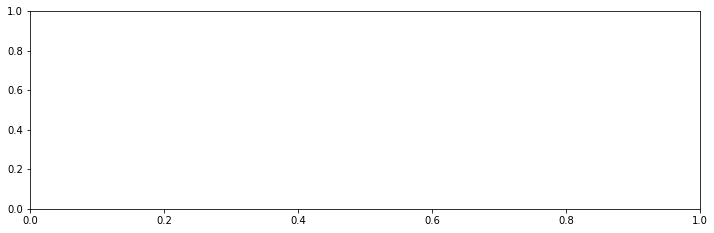

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_rodgers['FantPt'], lags=53, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_rodgers['FantPt'], lags=53, ax=ax2)
plt.show()

In [37]:
# define Dickey-Fuller Test (DFT) function
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic         -6.929237e+00
p-value                 1.094947e-09
Lags Used               0.000000e+00
Observations Used       5.200000e+01
Critical Value (1%)    -3.562879e+00
Critical Value (5%)    -2.918973e+00
Critical Value (10%)   -2.597393e+00
dtype: float64


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


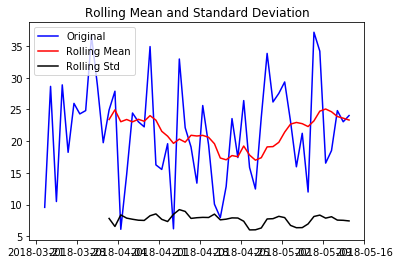

In [39]:
#dftest(np.log(df_rodgers_2014.FantPt))
dftest(df_rodgers.FantPt)

In [40]:
model=sm.tsa.ARMA(df_rodgers['FantPt'],(0,1))
results=model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                 FantPt   No. Observations:                   53
Model:                     ARMA(0, 1)   Log Likelihood                -183.543
Method:                       css-mle   S.D. of innovations              7.722
Date:                Thu, 22 Mar 2018   AIC                            373.087
Time:                        11:23:24   BIC                            378.998
Sample:                    03-22-2018   HQIC                           375.360
                         - 05-13-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.5460      1.108     19.453      0.000      19.375      23.717
ma.L1.FantPt     0.0447      0.140      0.318      0.752      -0.231       0.320
                                    Roots   

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


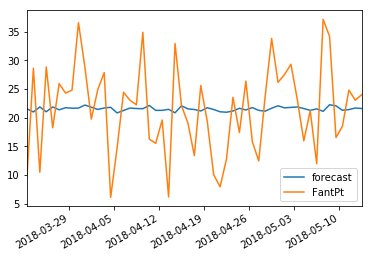

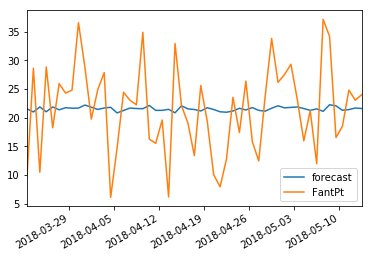

In [41]:
results.plot_predict()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(array([ 3.,  4.,  3.,  8.,  7., 10.,  8.,  4.,  3.,  3.]),
 array([-15.72201815, -12.54369674,  -9.36537534,  -6.18705393,
         -3.00873253,   0.16958888,   3.34791028,   6.52623169,
          9.70455309,  12.8828745 ,  16.0611959 ]),
 <a list of 10 Patch objects>)

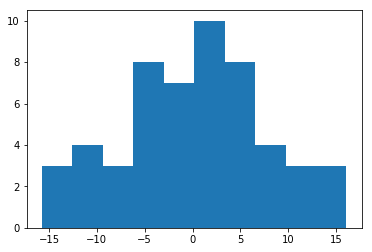

In [42]:
plt.hist(results.resid)

In [248]:
model=sm.tsa.ARMA(df_rodgers['FantPt'],(0,1), exog=df_rodgers[['h/a_', 'h/a_@',
                                                                           'opponent_ARI',
      #'opponent_ATL', 
                                                                           #'opponent_BAL', 
                                                                           'opponent_BUF', 
                                                                           'opponent_CAR',
      #'opponent_CHI', 'opponent_CIN', 
                                                                           #'opponent_CLE', 
                                                                           'opponent_DAL',
       #'opponent_DEN', 'opponent_DET', 'opponent_GNB', 
                                                                           'opponent_HOU',
        'opponent_IND', 
                                                                           'opponent_JAX', 
                                                                           'opponent_KAN', 
                                                                           #'opponent_LAC',
       #'opponent_LAR', 
                                                                           #'opponent_MIA', 
                                                                           #'opponent_MIN', 'opponent_NOR',
      'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
        #'opponent_PHI', 'opponent_PIT', 
                                                                           'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS',
                                                                           
                                                                           
                                                                           
                                                                           
                                                                           'day_Mon', 'day_Sat','day_Sun','day_Thu']])
results=model.fit()
print(results.summary())

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likeliho

                              ARMA Model Results                              
Dep. Variable:                 FantPt   No. Observations:                   53
Model:                     ARMA(0, 1)   Log Likelihood                -155.992
Method:                       css-mle   S.D. of innovations              4.422
Date:                Thu, 22 Mar 2018   AIC                            367.984
Time:                        16:01:44   BIC                            423.153
Sample:                    03-22-2018   HQIC                           389.199
                         - 05-13-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.5987        nan        nan        nan         nan         nan
h/a_            10.5084        nan        nan        nan         nan         nan
h/a_@            4.0926        nan        na

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


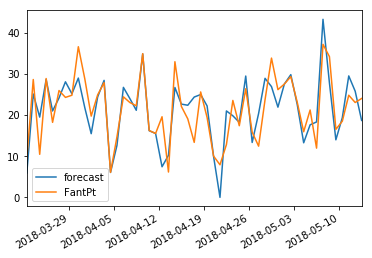

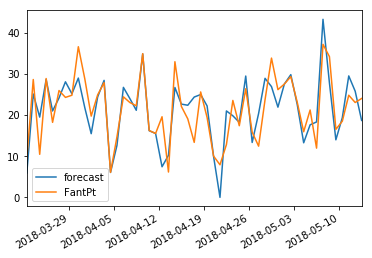

In [245]:
results.plot_predict()

In [124]:
np.sqrt(np.mean(results.resid.get_values()**2))

4.624516264043316

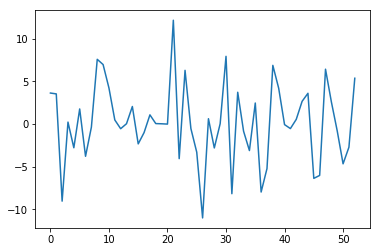

In [125]:
plt.plot(results.resid.get_values());

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


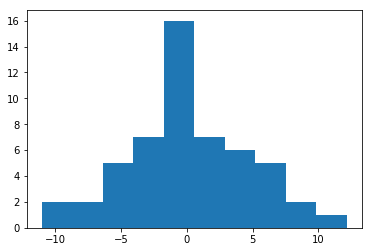

In [45]:
plt.hist(results.resid);

In [146]:
df_adp_qb = df[df['position'] == 'QB']
df_adp_rb = df[df['position'] == 'RB']
df_adp_wr = df[df['position'] == 'WR']
df_adp_te = df[df['position'] == 'TE']

In [150]:
datelist = pd.date_range(pd.datetime.today(), periods=df_adp_qb.shape[0]).tolist()

In [151]:
df_adp_qb['index'] = datelist


df_adp_qb.set_index('index', inplace=True)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_adp_qb.shape[0]

410

In [157]:
train = df_adp_qb.iloc[:300]
test = df_adp_qb.iloc[300:]

In [158]:
model = sm.tsa.ARMA(train.FantPt, (0,1), exog = train[['op_rank', 'h/a_', 'h/a_@',
                                                               'day_Mon', 'day_Sat','day_Sun',
                                                               'day_Thu','rank','adp']]).fit()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likeliho

In [159]:
model.summary()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 FantPt   No. Observations:                  300
Model:                     ARMA(0, 1)   Log Likelihood               -1036.240
Method:                       css-mle   S.D. of innovations              7.653
Date:                Tue, 27 Mar 2018   AIC                           2096.480
Time:                        16:09:44   BIC                           2140.925
Sample:                    03-27-2018   HQIC                          2114.267
                         - 01-20-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.1666        nan        nan        nan         nan         nan
op_rank          0.1173      0.047      2.500      0.013       0.025       0.209
h/a_             6.6173        nan        nan        nan         nan         nan
h/a_@            5.5494        nan        nan        nan         nan         nan
day_Mon          1.7892   2.27e+04   7.89e-05      1.000   -4.45e+04    4.45e+04
day_Sat         10.2886   2.27e+04      0.000      1.000   -4.44e+04    4.45e+04
day_Sun          0.3485   2.27e+04   1.54e-05      1.000   -4.45e+04    4.45e+04
day_Thu         -0.2595   2.27e+04  -1.14e-05      1.000   -4.45e+04    4.45e+04
rank            -0.0722      0.031     -2.293      0.023      -0.134      -0.010
adp              0.0380      0.043      0.886      0.376      -0.046       0.122
ma.L1.FantPt     0.1988      0.057      3.514      0.001       0.088       0.310
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -5.0291           +0.0000j            5.0291            0.5000
-----------------------------------------------------------------------------
"""

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


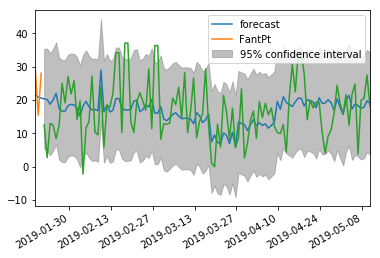

In [166]:
model.plot_predict(start = train.index[-3], end=test.index[-1], exog = test[['op_rank', 'h/a_', 'h/a_@',
                                                               'day_Mon', 'day_Sat','day_Sun',
                                                               'day_Thu','rank','adp']],
                  plot_insample = True, dynamic = False)
plt.plot(test.FantPt)

In [249]:
model = sm.tsa.ARMA(df_rodgers_2014.FantPt, (0,1), exog = df_rodgers_2014[['h/a_', 'h/a_@',
                                                                           'opponent_ARI',
      #'opponent_ATL', 
                                                                           #'opponent_BAL', 
                                                                           'opponent_BUF', 
                                                                           'opponent_CAR',
      #'opponent_CHI', 'opponent_CIN', 
                                                                           #'opponent_CLE', 
                                                                           'opponent_DAL',
       #'opponent_DEN', 'opponent_DET', 'opponent_GNB', 
                                                                           'opponent_HOU',
       # 'opponent_IND', 
                                                                           'opponent_JAX', 
                                                                           'opponent_KAN', 
                                                                           #'opponent_LAC',
       #'opponent_LAR', 
                                                                           #'opponent_MIA', 
                                                                           #'opponent_MIN', 'opponent_NOR',
      'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
        #'opponent_PHI', 'opponent_PIT', 
                                                                           'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS',
                                                                           
                                                                           
                                                                           
                                                                           
                                                                           'day_Mon', 'day_Sat','day_Sun','day_Thu']]).fit()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likeliho

In [250]:
model.summary()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 FantPt   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                -142.246
Method:                       css-mle   S.D. of innovations              4.500
Date:                Thu, 22 Mar 2018   AIC                            338.493
Time:                        16:03:13   BIC                            389.015
Sample:                    03-22-2018   HQIC                           357.585
                         - 05-08-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.6777        nan        nan        nan         nan         nan
h/a_            11.2665        nan        nan        nan         nan         nan
h/a_@            3.4127        nan        nan        nan         nan         nan
opponent_ARI   -21.8832      5.703     -3.837      0.001     -33.061     -10.706
opponent_BUF   -16.2745      6.052     -2.689      0.013     -28.136      -4.413
opponent_CAR     0.1728      3.909      0.044      0.965      -7.490       7.835
opponent_DAL   -10.4093      4.312     -2.414      0.025     -18.861      -1.957
opponent_HOU   -15.4385      5.324     -2.900      0.008     -25.873      -5.004
opponent_JAX   -10.0206      4.781     -2.096      0.048     -19.391      -0.650
opponent_KAN     6.2071      7.370      0.842      0.409      -8.237      20.652
opponent_NWE    -2.0712      5.434     -0.381      0.707     -12.721       8.579
opponent_NYG   -17.0243      5.138     -3.313      0.003     -27.095      -6.953
opponent_NYJ    -2.5455      4.547     -0.560      0.581     -11.458       6.367
opponent_OAK   -11.3971      5.981     -1.905      0.070     -23.120       0.326
opponent_SDG   -21.1378      5.118     -4.130      0.000     -31.169     -11.106
opponent_SEA    -8.8142      3.430     -2.569      0.017     -15.537      -2.091
opponent_SFO    -5.2361      6.549     -0.800      0.433     -18.071       7.599
opponent_STL   -13.8520      6.516     -2.126      0.045     -26.623      -1.081
opponent_TAM    -9.3297      5.500     -1.696      0.104     -20.110       1.451
opponent_TEN    10.0971      5.355      1.886      0.073      -0.398      20.592
opponent_WAS     8.5324      6.304      1.353      0.190      -3.824      20.889
day_Mon          3.4850        nan        nan        nan         nan         nan
day_Sat         11.3913        nan        nan        nan         nan         nan
day_Sun          3.4617        nan        nan        nan         nan         nan
day_Thu         -3.6579        nan        nan        nan         nan         nan
ma.L1.FantPt    -1.0000      0.056    -17.819      0.000      -1.110      -0.890
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [251]:
df_rodgers_2014

player     age       date  game  week  \
index                                                                      
2018-03-22 11:22:27.651850  Aaron Rodgers  30-276 2014-09-04     1     1   
2018-03-23 11:22:27.651850  Aaron Rodgers  30-286 2014-09-14     2     2   
2018-03-24 11:22:27.651850  Aaron Rodgers  30-293 2014-09-21     3     3   
2018-03-25 11:22:27.651850  Aaron Rodgers  30-300 2014-09-28     4     4   
2018-03-26 11:22:27.651850  Aaron Rodgers  30-304 2014-10-02     5     5   
2018-03-27 11:22:27.651850  Aaron Rodgers  30-314 2014-10-12     6     6   
2018-03-28 11:22:27.651850  Aaron Rodgers  30-321 2014-10-19     7     7   
2018-03-29 11:22:27.651850  Aaron Rodgers  30-328 2014-10-26     8     8   
2018-03-30 11:22:27.651850  Aaron Rodgers  30-342 2014-11-09     9    10   
2018-03-31 11:22:27.651850  Aaron Rodgers  30-349 2014-11-16    10    11   
2018-04-01 11:22:27.651850  Aaron Rodgers  30-356 2014-11-23    11    12   
2018-04-02 11:22:27.651850  Aaron Rodgers  30-363 2014-11-30    12    13   
2018-04-03 11:22:27.651850  Aaron Rodgers  31-006 2014-12-08    13    14   
2018-04-04 11:22:27.651850  Aaron Rodgers  31-012 2014-12-14    14    15   
2018-04-05 11:22:27.651850  Aaron Rodgers  31-019 2014-12-21    15    16   
2018-04-06 11:22:27.651850  Aaron Rodgers  31-026 2014-12-28    16    17   
2018-04-07 11:22:27.651850  Aaron Rodgers  31-285 2015-09-13     1     1   
2018-04-08 11:22:27.651850  Aaron Rodgers  31-292 2015-09-20     2     2   
2018-04-09 11:22:27.651850  Aaron Rodgers  31-300 2015-09-28     3     3   
2018-04-10 11:22:27.651850  Aaron Rodgers  31-306 2015-10-04     4     4   
2018-04-11 11:22:27.651850  Aaron Rodgers  31-313 2015-10-11     5     5   
2018-04-12 11:22:27.651850  Aaron Rodgers  31-320 2015-10-18     6     6   
2018-04-13 11:22:27.651850  Aaron Rodgers  31-334 2015-11-01     7     8   
2018-04-14 11:22:27.651850  Aaron Rodgers  31-341 2015-11-08     8     9   
2018-04-15 11:22:27.651850  Aaron Rodgers  31-348 2015-11-15     9    10   
2018-04-16 11:22:27.651850  Aaron Rodgers  31-355 2015-11-22    10    11   
2018-04-17 11:22:27.651850  Aaron Rodgers  31-359 2015-11-26    11    12   
2018-04-18 11:22:27.651850  Aaron Rodgers  32-001 2015-12-03    12    13   
2018-04-19 11:22:27.651850  Aaron Rodgers  32-011 2015-12-13    13    14   
2018-04-20 11:22:27.651850  Aaron Rodgers  32-018 2015-12-20    14    15   
2018-04-21 11:22:27.651850  Aaron Rodgers  32-025 2015-12-27    15    16   
2018-04-22 11:22:27.651850  Aaron Rodgers  32-032 2016-01-03    16    17   
2018-04-23 11:22:27.651850  Aaron Rodgers  32-284 2016-09-11     1     1   
2018-04-24 11:22:27.651850  Aaron Rodgers  32-291 2016-09-18     2     2   
2018-04-25 11:22:27.651850  Aaron Rodgers  32-298 2016-09-25     3     3   
2018-04-26 11:22:27.651850  Aaron Rodgers  32-312 2016-10-09     4     5   
2018-04-27 11:22:27.651850  Aaron Rodgers  32-319 2016-10-16     5     6   
2018-04-28 11:22:27.651850  Aaron Rodgers  32-323 2016-10-20     6     7   
2018-04-29 11:22:27.651850  Aaron Rodgers  32-333 2016-10-30     7     8   
2018-04-30 11:22:27.651850  Aaron Rodgers  32-340 2016-11-06     8     9   
2018-05-01 11:22:27.651850  Aaron Rodgers  32-347 2016-11-13     9    10   
2018-05-02 11:22:27.651850  Aaron Rodgers  32-354 2016-11-20    10    11   
2018-05-03 11:22:27.651850  Aaron Rodgers  32-362 2016-11-28    11    12   
2018-05-04 11:22:27.651850  Aaron Rodgers  33-002 2016-12-04    12    13   
2018-05-05 11:22:27.651850  Aaron Rodgers  33-009 2016-12-11    13    14   
2018-05-06 11:22:27.651850  Aaron Rodgers  33-016 2016-12-18    14    15   
2018-05-07 11:22:27.651850  Aaron Rodgers  33-022 2016-12-24    15    16   
2018-05-08 11:22:27.651850  Aaron Rodgers  33-030 2017-01-01    16    17   

                            FantPt   ppr  DKPT  FDPT  cmp   ...     \
index                                                       ...      
2018-03-22 11:22:27.651850    9.56   9.6  10.6  10.6   23   ...      
2018-03-23 11:22:27.6518

In [252]:
df_rodgers_2017

player     age       date  game  week  \
index                                                                      
2018-05-09 11:22:27.651850  Aaron Rodgers  33-282 2017-09-10     1     1   
2018-05-10 11:22:27.651850  Aaron Rodgers  33-289 2017-09-17     2     2   
2018-05-11 11:22:27.651850  Aaron Rodgers  33-296 2017-09-24     3     3   
2018-05-12 11:22:27.651850  Aaron Rodgers  33-300 2017-09-28     4     4   
2018-05-13 11:22:27.651850  Aaron Rodgers  33-310 2017-10-08     5     5   

                            FantPt   ppr  DKPT  FDPT  cmp   ...     \
index                                                       ...      
2018-05-09 11:22:27.651850   16.54  16.5  20.5  17.5   28   ...      
2018-05-10 11:22:27.651850   18.52  18.5  23.5  19.5   33   ...      
2018-05-11 11:22:27.651850   24.82  24.8  28.8  25.8   28   ...      
2018-05-12 11:22:27.651850   23.06  23.1  23.1  23.1   18   ...      
2018-05-13 11:22:27.651850   24.04  24.0  24.0  24.0   19   ...      

                            opponent_SEA  opponent_SFO  opponent_STL  \
index                                                                  
2018-05-09 11:22:27.651850             1             0             0   
2018-05-10 11:22:27.651850             0             0             0   
2018-05-11 11:22:27.651850             0             0             0   
2018-05-12 11:22:27.651850             0             0             0   
2018-05-13 11:22:27.651850             0             0             0   

                            opponent_TAM  opponent_TEN  opponent_WAS  day_Mon  \
index                                                                           
2018-05-09 11:22:27.651850             0             0             0        0   
2018-05-10 11:22:27.651850             0             0             0        0   
2018-05-11 11:22:27.651850             0             0             0        0   
2018-05-12 11:22:27.651850             0             0             0        0   
2018-05-13 11:22:27.651850             0             0             0        0   

                            day_Sat  day_Sun  day_Thu  
index                                                  
2018-05-09 11:22:27.651850        0        1        0  
2018-05-10 11:22:27.651850        0        1        0  
2018-05-11 11:22:27.651850        0        1        0  
2018-05-12 11:22:27.651850        0        0        1  
2018-05-13 11:22:27.651850        0        1        0  

[5 rows x 99 columns]

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


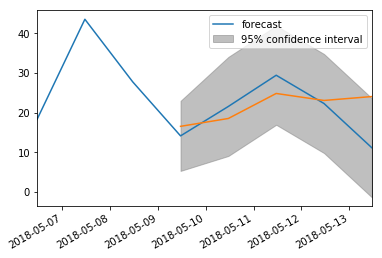

In [255]:
model.plot_predict(start = '2018-05-06 11:22:27.651850', end='2018-05-13 11:22:27.651850',exog=df_rodgers_2017[['h/a_', 'h/a_@',
                                                                           'opponent_ARI',
      #'opponent_ATL', 
                                                                           #'opponent_BAL', 
                                                                           'opponent_BUF', 
                                                                           'opponent_CAR',
      #'opponent_CHI', 'opponent_CIN', 
                                                                           #'opponent_CLE', 
                                                                           'opponent_DAL',
       #'opponent_DEN', 'opponent_DET', 'opponent_GNB', 
                                                                           'opponent_HOU',
       # 'opponent_IND', 
                                                                           'opponent_JAX', 
                                                                           'opponent_KAN', 
                                                                           #'opponent_LAC',
       #'opponent_LAR', 
                                                                           #'opponent_MIA', 
                                                                           #'opponent_MIN', 'opponent_NOR',
      'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
        #'opponent_PHI', 'opponent_PIT', 
                                                                           'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS',
                                                                           
                                                                           
                                                                           
                                                                           
                                                                           'day_Mon', 'day_Sat','day_Sun','day_Thu']], plot_insample = False)
plt.plot(df_rodgers_2017['FantPt'])

In [272]:
from sklearn.model_selection import train_test_split
X = df_qb.drop('y',1)
y = df_qb.y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .05,shuffle = False)


In [273]:
# Use full set of qbs

model = sm.tsa.ARMA(y_train, (0,1), exog = X_train).fit()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


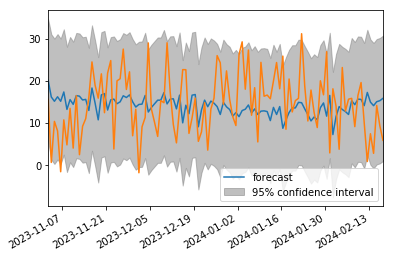

In [276]:
model.plot_predict(start=y_test.index[0], end=y_test.index[-1],exog=X_test, plot_insample = False)
plt.plot(y_test)


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


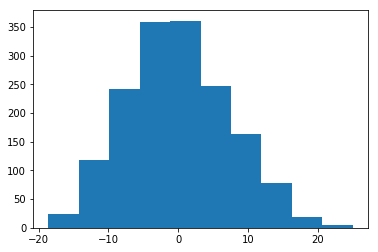

In [270]:
plt.hist(model.resid);

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ValueError: shapes (5,27) and (24,) not aligned: 27 (dim 1) != 24 (dim 0)

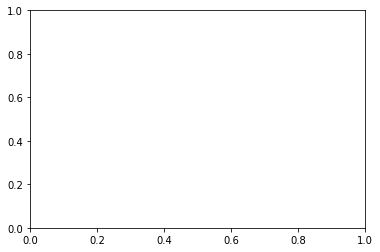

In [256]:
model.plot_predict(start=df_rodgers_2014.index[0], end=df_rodgers_2017.index[-1],exog = df_rodgers_2017[['att', 'h/a_', 'h/a_@',
                                                                           'opponent_ARI',
      #'opponent_ATL', 
                                                                           #'opponent_BAL', 
                                                                           'opponent_BUF', 
                                                                           'opponent_CAR',
      #'opponent_CHI', 'opponent_CIN', 
                                                                           #'opponent_CLE', 
                                                                           'opponent_DAL',
       #'opponent_DEN', 'opponent_DET', 'opponent_GNB', 
                                                                           'opponent_HOU',
       # 'opponent_IND', 
                                                                           'opponent_JAX', 
                                                                           'opponent_KAN', 
                                                                           #'opponent_LAC',
       #'opponent_LAR', 
                                                                           #'opponent_MIA', 
                                                                           'opponent_MIN', 'opponent_NOR',
      'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
        #'opponent_PHI', 'opponent_PIT', 
                                                                           'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS',
                                                                           
                                                                           
                                                                           
                                                                           
                                                                           'day_Mon', 'day_Sat','day_Sun','day_Thu']],
                 )


In [53]:
print(df_rodgers_2014.FantPt.std())
print(df_rodgers_2014.FantPt.diff().std())
print(df_rodgers_2014.FantPt.diff().diff().std())
print(df_rodgers_2014.FantPt.diff().diff().diff().std())
print(np.log(df_rodgers_2014.FantPt).std())
print(np.log(np.log(df_rodgers_2014.FantPt)).std())

8.138906778314844
10.97486688929496
18.88897173326533
33.89606879860848
0.44862858130221694
0.16600277239973887


In [54]:
# define Dickey-Fuller Test (DFT) function
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic         -6.277049e+00
p-value                 3.877617e-08
Lags Used               0.000000e+00
Observations Used       4.700000e+01
Critical Value (1%)    -3.577848e+00
Critical Value (5%)    -2.925338e+00
Critical Value (10%)   -2.600774e+00
dtype: float64


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


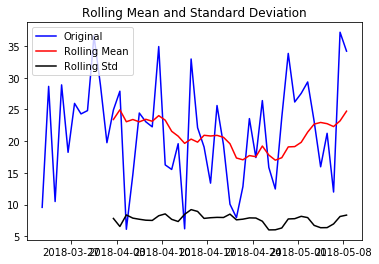

In [55]:
#dftest(np.log(df_rodgers_2014.FantPt))
dftest(df_rodgers_2014.FantPt)

In [7]:
# Imports
# Basics
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
# gensim
from gensim import corpora, models, similarities, matutils
from gensim.models import Word2Vec

# nltk
from nltk.corpus import gutenberg

# sklearn

# keras
import keras
np.random.seed(13)
from keras.models import Sequential
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout, Bidirectional
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [59]:
max_features = 41

maxlen = 41

nb_epoch = 20

In [60]:
# Create the model
model = Sequential()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=41, output_dim=1, input_length=41, embeddings_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


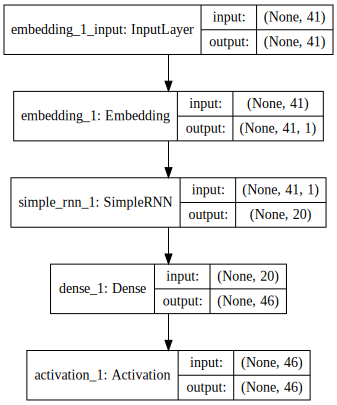

In [61]:
# Create the model
#model = Sequential()
# The Embedding layer allows us to map words into dense vectors as inputs, common first layer
model.add(Embedding(input_dim=max_features, output_dim=1, init='glorot_uniform', input_length=maxlen))
# This is the most basic kind of RNN!  We're using 20 units, 
#which somewhat reflects our "memory" of past events in a sequence
# For the purposes of keras, it's just another type of "unit" you can try!
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [62]:
X_train = df_rodgers_2014[['att', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'opponent_LAR', 'opponent_MIA', 'opponent_MIN', 'opponent_NOR',
       'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
       'opponent_PHI', 'opponent_PIT', 'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS','day_Mon', 'day_Sat','day_Sun','day_Thu']]
X_test = df_rodgers_2017[['att', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'opponent_LAR', 'opponent_MIA', 'opponent_MIN', 'opponent_NOR',
       'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
       'opponent_PHI', 'opponent_PIT', 'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS','day_Mon', 'day_Sat','day_Sun','day_Thu']]
y_train = df_rodgers_2014['FantPt']
y_test = df_rodgers_2017['FantPt']

In [63]:
# Train the model
model.fit(X_train, y_train, batch_size=256, epochs=nb_epoch, 
          validation_data=(X_test, y_test))

Train on 48 samples, validate on 5 samples
Epoch 1/20


InvalidArgumentError: indices[0,0] = 45 is not in [0, 41)
	 [[Node: embedding_1/Gather = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_1/embeddings/read, embedding_1/Cast)]]

Caused by op 'embedding_1/Gather', defined at:
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-afa3a3c30d29>", line 4, in <module>
    model.add(Embedding(input_dim=max_features, output_dim=1, init='glorot_uniform', input_length=maxlen))
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/keras/models.py", line 467, in add
    layer(x)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/keras/layers/embeddings.py", line 138, in call
    out = K.gather(self.embeddings, inputs)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 1211, in gather
    return tf.gather(reference, indices)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 2667, in gather
    params, indices, validate_indices=validate_indices, name=name)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1777, in gather
    validate_indices=validate_indices, name=name)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): indices[0,0] = 45 is not in [0, 41)
	 [[Node: embedding_1/Gather = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_1/embeddings/read, embedding_1/Cast)]]


In [227]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [66]:
df_rodgers.columns


Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

In [67]:
df_try = df_rodgers.drop(['player', 'age', 'date','game','week', 'ppr', 'DKPT', 'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS',],axis=1)

In [68]:
df_try['y'] = df_try['FantPt']

In [69]:
df_try = df_try.drop('FantPt', 1)

In [70]:
df_try.columns

Index(['h/a_', 'h/a_@', 'opponent_ARI', 'opponent_ATL', 'opponent_BAL',
       'opponent_BUF', 'opponent_CAR', 'opponent_CHI', 'opponent_CIN',
       'opponent_CLE', 'opponent_DAL', 'opponent_DEN', 'opponent_DET',
       'opponent_GNB', 'opponent_HOU', 'opponent_IND', 'opponent_JAX',
       'opponent_KAN', 'opponent_LAC', 'opponent_LAR', 'opponent_MIA',
       'opponent_MIN', 'opponent_NOR', 'opponent_NWE', 'opponent_NYG',
       'opponent_NYJ', 'opponent_OAK', 'opponent_PHI', 'opponent_PIT',
       'opponent_SDG', 'opponent_SEA', 'opponent_SFO', 'opponent_STL',
       'opponent_TAM', 'opponent_TEN', 'opponent_WAS', 'day_Mon', 'day_Sat',
       'day_Sun', 'day_Thu', 'y'],
      dtype='object')

In [71]:
reframed = series_to_supervised(df_try, 1, 1)

In [72]:
reframed

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  \
index                                                                    
2018-03-23 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-03-24 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-03-25 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-03-26 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-03-27 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-03-28 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-03-29 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-03-30 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-03-31 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-01 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-02 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-03 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-04 11:22:27.651850        1.0        0.0        0.0        1.0   
2018-04-05 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-06 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-07 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-08 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-09 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-10 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-11 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-12 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-13 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-14 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-15 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-16 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-17 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-18 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-19 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-20 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-21 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-22 11:22:27.651850        0.0        1.0        1.0        0.0   
2018-04-23 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-24 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-25 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-04-26 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-27 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-28 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-29 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-04-30 11:22:27.651850        0.0        1.0        0.0        1.0   
2018-05-01 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-02 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-05-03 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-05-04 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-05-05 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-06 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-07 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-05-08 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-09 11:22:27.651850        0.0        1.0        0.0        0.0   
2018-05-10 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-11 11:22:27.651850        0.0        1.0        0.0        1.0   
2018-05-12 11:22:27.651850        1.0        0.0        0.0        0.0   
2018-05-13 11:22:27.651850        1.0        0.0        0.0        0.0   

                            var

In [73]:
values = reframed.values

train = values[:47, :]
test = values[47:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(47, 1, 81) (47,) (5, 1, 81) (5,)


Train on 47 samples, validate on 5 samples
Epoch 1/100
 - 1s - loss: 21.5551 - val_loss: 20.8627
Epoch 2/100
 - 0s - loss: 21.1293 - val_loss: 20.3939
Epoch 3/100
 - 0s - loss: 20.6831 - val_loss: 19.9204
Epoch 4/100
 - 0s - loss: 20.2317 - val_loss: 19.4386
Epoch 5/100
 - 0s - loss: 19.7719 - val_loss: 18.9457
Epoch 6/100
 - 0s - loss: 19.3006 - val_loss: 18.4396
Epoch 7/100
 - 0s - loss: 18.8134 - val_loss: 17.9138
Epoch 8/100
 - 0s - loss: 18.3068 - val_loss: 17.3658
Epoch 9/100
 - 0s - loss: 17.7787 - val_loss: 16.7952
Epoch 10/100
 - 0s - loss: 17.2287 - val_loss: 16.2057
Epoch 11/100
 - 0s - loss: 16.6556 - val_loss: 15.5973
Epoch 12/100
 - 0s - loss: 16.0682 - val_loss: 14.9716
Epoch 13/100
 - 0s - loss: 15.4969 - val_loss: 14.3258
Epoch 14/100
 - 0s - loss: 14.9240 - val_loss: 13.6649
Epoch 15/100
 - 0s - loss: 14.3369 - val_loss: 12.9906
Epoch 16/100
 - 0s - loss: 13.7321 - val_loss: 12.2983
Epoch 17/100
 - 0s - loss: 13.1111 - val_loss: 11.5885
Epoch 18/100
 - 0s - loss: 12.4

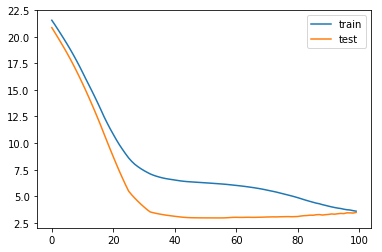

In [74]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [75]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.974


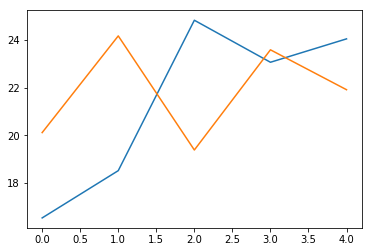

In [76]:
plt.plot(inv_y)
plt.plot(inv_yhat)

Not very accurate.. Lets try and use the data for every qb.

In [77]:
df_sorted = df.sort_values('player')

In [78]:
df_qb = df_sorted[df_sorted['att'] > 10]

In [79]:
df_qb = df_qb.sort_values(['player', 'date'],ascending=True)

In [80]:
df_qb

player     age       date  game  week  FantPt   ppr  DKPT  \
2396       A.J. McCarron  25-091 2015-12-13    13    14   16.00  16.0  18.0   
4487       A.J. McCarron  25-098 2015-12-20    14    15   11.88  11.9  11.9   
4267       A.J. McCarron  25-106 2015-12-28    15    16   12.10  12.1  13.1   
2996       A.J. McCarron  25-112 2016-01-03    16    17   14.60  14.6  14.6   
6175       Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6   
318        Aaron Rodgers  30-286 2014-09-14     2     2   28.64  28.6  32.6   
5419       Aaron Rodgers  30-293 2014-09-21     3     3   10.48  10.5  10.5   
309        Aaron Rodgers  30-300 2014-09-28     4     4   28.88  28.9  31.9   
1700       Aaron Rodgers  30-304 2014-10-02     5     5   18.24  18.2  18.2   
517        Aaron Rodgers  30-314 2014-10-12     6     6   25.96  26.0  26.0   
663        Aaron Rodgers  30-321 2014-10-19     7     7   24.30  24.3  24.3   
615        Aaron Rodgers  30-328 2014-10-26     8     8   24.82  24.8  29.8   
126        Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6   
22         Aaron Rodgers  30-342 2014-11-09     9    10   36.60  36.6  39.6   
311        Aaron Rodgers  30-349 2014-11-16    10    11   28.84  28.8  31.8   
1343       Aaron Rodgers  30-356 2014-11-23    11    12   19.76  19.8  19.8   
607        Aaron Rodgers  30-363 2014-11-30    12    13   24.92  24.9  27.9   
364        Aaron Rodgers  31-006 2014-12-08    13    14   27.88  27.9  30.9   
9620       Aaron Rodgers  31-012 2014-12-14    14    15    6.10   6.1   8.1   
2926       Aaron Rodgers  31-019 2014-12-21    15    16   14.72  14.7  18.7   
654        Aaron Rodgers  31-026 2014-12-28    16    17   24.44  24.4  24.4   
812        Aaron Rodgers  31-285 2015-09-13     1     1   23.06  23.1  23.1   
928        Aaron Rodgers  31-292 2015-09-20     2     2   22.26  22.3  22.3   
148        Aaron Rodgers  31-300 2015-09-28     3     3   34.92  34.9  37.9   
44         Aaron Rodgers  31-300 2015-09-28     3     3   34.92  34.9  37.9   
2299       Aaron Rodgers  31-306 2015-10-04     4     4   16.26  16.3  16.3   
2585       Aaron Rodgers  31-313 2015-10-11     5     5   15.54  15.5  18.5   
1374       Aaron Rodgers  31-320 2015-10-18     6     6   19.60  19.6  19.6   
9503       Aaron Rodgers  31-334 2015-11-01     7     8    6.18   6.2   6.2   
173        Aaron Rodgers  31-341 2015-11-08     8     9   32.96  33.0  37.0   
...                  ...     ...        ...   ...   ...     ...   ...   ...   
3975        Tyrod Taylor  27-123 2016-12-04    12    13   12.64  12.6  14.6   
2658        Tyrod Taylor  27-130 2016-12-11    13    14   15.32  15.3  16.3   
2463        Tyrod Taylor  27-137 2016-12-18    14    15   15.86  15.9  15.9   
212         Tyrod Taylor  27-143 2016-12-24    15    16   31.16  31.2  34.2   
1563        Tyrod Taylor  28-038 2017-09-10     1     1   18.76  18.8  19.8   
5412        Tyrod Taylor  28-045 2017-09-17     2     2   10.50  10.5  10.5   
1820        Tyrod Taylor  28-052 2017-09-24     3     3   17.82  17.8  17.8   
4066        Tyrod Taylor  28-059 2017-10-01     4     4   12.48  12.5  12.5   
6771        Tyrod Taylor  28-066 2017-10-08     5     5    8.94   8.9   9.9   
1279        Tyrod Taylor  28-080 2017-10-22     6     7   20.02  20.0  20.0   
2177        Tyrod Taylor  28-087 2017-10-29     7     8   16.70  16.7  16.7   
445         Tyrod Taylor  28-091 2017-11-02     8     9   26.90  26.9  27.9   
14071       Tyrod Taylor  28-101 2017-11-12     9    10    2.94   2.9   3.9   
1725        Tyrod Taylor  28-108 2017-11-19    10    11   18.12  18.1  19.1   
3230        Tyrod Taylor  28-115 2017-11-26    11    12   14.02  14.0  14.0   
12649       Tyrod Taylor  28-122 2017-12-03    12    13    3.80   3.8   4.8   
801         Tyrod Taylor  28-136 2017-12-17    14    15   23.16  23.2  23.2   
3879        Tyrod Taylor  28-143 2017-12-24    15    16   12.84  12.8  12.8   
2541        Tyrod Taylor  28-150 2017-12-31    16    17   15.66  15.

In [81]:
datelist_1 = pd.date_range(pd.datetime.today(), periods=2159).tolist()

In [82]:
df_qb['index'] = datelist_1

df_qb.set_index('index', inplace=True)

In [83]:
df_qb.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

In [84]:
df_qb['y'] = df_qb['FantPt']

In [85]:
df_qb = df_qb.drop(['player','age', 'date', 'game', 'week','FantPt', 'ppr','DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA'],1)

In [86]:
df_qb

team_ARI  team_ATL  team_BAL  team_BUF  team_CAR  \
index                                                                          
2018-03-22 11:24:24.192396         0         0         0         0         0   
2018-03-23 11:24:24.192396         0         0         0         0         0   
2018-03-24 11:24:24.192396         0         0         0         0         0   
2018-03-25 11:24:24.192396         0         0         0         0         0   
2018-03-26 11:24:24.192396         0         0         0         0         0   
2018-03-27 11:24:24.192396         0         0         0         0         0   
2018-03-28 11:24:24.192396         0         0         0         0         0   
2018-03-29 11:24:24.192396         0         0         0         0         0   
2018-03-30 11:24:24.192396         0         0         0         0         0   
2018-03-31 11:24:24.192396         0         0         0         0         0   
2018-04-01 11:24:24.192396         0         0         0         0         0   
2018-04-02 11:24:24.192396         0         0         0         0         0   
2018-04-03 11:24:24.192396         0         0         0         0         0   
2018-04-04 11:24:24.192396         0         0         0         0         0   
2018-04-05 11:24:24.192396         0         0         0         0         0   
2018-04-06 11:24:24.192396         0         0         0         0         0   
2018-04-07 11:24:24.192396         0         0         0         0         0   
2018-04-08 11:24:24.192396         0         0         0         0         0   
2018-04-09 11:24:24.192396         0         0         0         0         0   
2018-04-10 11:24:24.192396         0         0         0         0         0   
2018-04-11 11:24:24.192396         0         0         0         0         0   
2018-04-12 11:24:24.192396         0         0         0         0         0   
2018-04-13 11:24:24.192396         0         0         0         0         0   
2018-04-14 11:24:24.192396         0         0         0         0         0   
2018-04-15 11:24:24.192396         0         0         0         0         0   
2018-04-16 11:24:24.192396         0         0         0         0         0   
2018-04-17 11:24:24.192396         0         0         0         0         0   
2018-04-18 11:24:24.192396         0         0         0         0         0   
2018-04-19 11:24:24.192396         0         0         0         0         0   
2018-04-20 11:24:24.192396         0         0         0         0         0   
...                              ...       ...       ...       ...       ...   
2024-01-19 11:24:24.192396         0         0         0         1         0   
2024-01-20 11:24:24.192396         0         0         0         1         0   
2024-01-21 11:24:24.192396         0         0         0         1         0   
2024-01-22 11:24:24.192396         0         0         0         1         0   
2024-01-23 11:24:24.192396         0         0         0         1         0   
2024-01-24 11:24:24.192396         0         0         0         1         0   
2024-01-25 11:24:24.192396         0         0         0         1         0   
2024-01-26 11:24:24.192396         0         0         0         1         0   
2024-01-27 11:24:24.192396         0         0         0         1         0   
2024-01-28 11:24:24.192396         0         0         0         1         0   
2024-01-29 11:24:24.192396         0         0         0         1         0   
2024-01-30 11:24:24.192396         0         0         0         1         0   
2024-01-31 11:24:24.192396         0         0         0         1         0   
2024-02-01 11:24:24.192396         0         0         0         1         0   
2024-02-02 11:24:24.192396         0         0         0         1         0   
2024-02-03 11:24:24.192396         0         0         0         1         0   
2024-02-04 11:24:24.192396         0         0         0         1         0   
2024-02-05 11:24:24.192396  

In [87]:
reframed_1 = series_to_supervised(df_qb, 1, 1)

In [88]:
values = reframed_1.values

train = values[:2000, :]
test = values[2000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2000, 1, 149) (2000,) (158, 1, 149) (158,)


Train on 2000 samples, validate on 158 samples
Epoch 1/50
 - 2s - loss: 7.8344 - val_loss: 6.3201
Epoch 2/50
 - 1s - loss: 6.2225 - val_loss: 6.2314
Epoch 3/50
 - 1s - loss: 6.1271 - val_loss: 6.1582
Epoch 4/50
 - 1s - loss: 6.0385 - val_loss: 6.1275
Epoch 5/50
 - 1s - loss: 5.9678 - val_loss: 6.1552
Epoch 6/50
 - 1s - loss: 5.9102 - val_loss: 6.1690
Epoch 7/50
 - 1s - loss: 5.8527 - val_loss: 6.1809
Epoch 8/50
 - 1s - loss: 5.8143 - val_loss: 6.2377
Epoch 9/50
 - 1s - loss: 5.7792 - val_loss: 6.2210
Epoch 10/50
 - 1s - loss: 5.7384 - val_loss: 6.2742
Epoch 11/50
 - 1s - loss: 5.6971 - val_loss: 6.2167
Epoch 12/50
 - 1s - loss: 5.6604 - val_loss: 6.2931
Epoch 13/50
 - 1s - loss: 5.6174 - val_loss: 6.2420
Epoch 14/50
 - 1s - loss: 5.5666 - val_loss: 6.2723
Epoch 15/50
 - 1s - loss: 5.5148 - val_loss: 6.2733
Epoch 16/50
 - 1s - loss: 5.4628 - val_loss: 6.1742
Epoch 17/50
 - 1s - loss: 5.3951 - val_loss: 6.2220
Epoch 18/50
 - 1s - loss: 5.3402 - val_loss: 6.1939
Epoch 19/50
 - 1s - loss: 

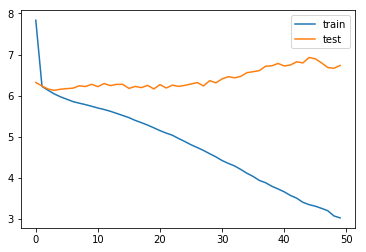

In [89]:
# design network
model = Sequential()
model.add(LSTM(149, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=5, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [90]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.743


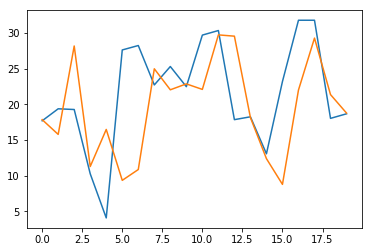

In [91]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20]);

Test Statistic         -8.970540e+00
p-value                 7.775525e-15
Lags Used               1.100000e+01
Observations Used       2.147000e+03
Critical Value (1%)    -3.433399e+00
Critical Value (5%)    -2.862887e+00
Critical Value (10%)   -2.567487e+00
dtype: float64


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


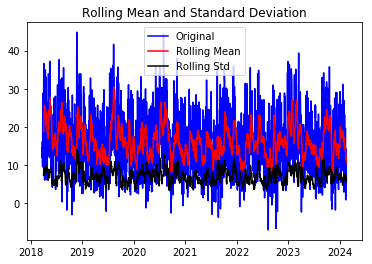

In [92]:
#dftest(np.log(df_rodgers_2014.FantPt))
dftest(df_qb.y)

In [93]:
# lets try again but look two weeks back
reframed_2 = series_to_supervised(df_qb, 2, 1)

In [94]:
values = reframed_2.values

train = values[:2000, :]
test = values[2000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2000, 1, 224) (2000,) (157, 1, 224) (157,)


Train on 2000 samples, validate on 157 samples
Epoch 1/10
 - 2s - loss: 7.0252 - val_loss: 6.1305
Epoch 2/10
 - 2s - loss: 6.2121 - val_loss: 6.0857
Epoch 3/10
 - 2s - loss: 6.1015 - val_loss: 6.0495
Epoch 4/10
 - 2s - loss: 6.0215 - val_loss: 6.0594
Epoch 5/10
 - 2s - loss: 5.9279 - val_loss: 6.0861
Epoch 6/10
 - 2s - loss: 5.8561 - val_loss: 6.0775
Epoch 7/10
 - 2s - loss: 5.8017 - val_loss: 6.1763
Epoch 8/10
 - 2s - loss: 5.7567 - val_loss: 6.0879
Epoch 9/10
 - 1s - loss: 5.7179 - val_loss: 6.1877
Epoch 10/10
 - 1s - loss: 5.6979 - val_loss: 6.1707


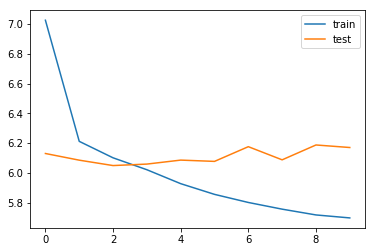

In [95]:
# design network
model = Sequential()
model.add(LSTM(149, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=5, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [96]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.872


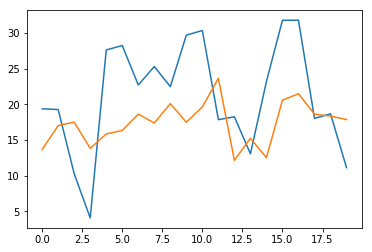

In [97]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20]);

In [98]:
df.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

In [99]:
df_rb = df[df['ruatt'] > 5]

In [100]:
df_rb = df_rb.sort_values(['player', 'date'],ascending=True)

In [101]:
df_rb.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

In [102]:
df_rb['y'] = df['FantPt']
df_rb = df_rb.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA'], 1)

In [103]:
datelist_2 = pd.date_range(pd.datetime.today(), periods=3386).tolist()

In [104]:
df_rb['index'] = datelist_2

df_rb.set_index('index', inplace=True)

In [105]:
reframed_rb = series_to_supervised(df_rb, 1, 1)

In [106]:
values = reframed_rb.values

train = values[:3000, :]
test = values[3000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3000, 1, 149) (3000,) (385, 1, 149) (385,)


Train on 3000 samples, validate on 385 samples
Epoch 1/5
 - 2s - loss: 6.5102 - val_loss: 5.6339
Epoch 2/5
 - 1s - loss: 5.7544 - val_loss: 5.5769
Epoch 3/5
 - 1s - loss: 5.6831 - val_loss: 5.5420
Epoch 4/5
 - 1s - loss: 5.6255 - val_loss: 5.5523
Epoch 5/5
 - 1s - loss: 5.5875 - val_loss: 5.5788


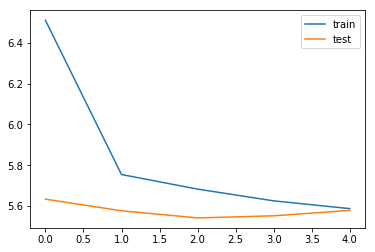

In [107]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=5, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [108]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.517


In [279]:
df.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'oppone

In [375]:
df_qb_with_stats = df_train[df_train['att'] > 5]
df_qb_with_stats = df_qb_with_stats.sort_values(['player', 'date'],ascending=True)

In [376]:
df_qb_with_stats['y'] = df_qb_with_stats['FantPt']

In [377]:
df_qb_with_stats = df_qb_with_stats.drop(['player','age','date', 'game','week','FantPt', 'ppr','DKPT','FDPT'],1)

In [378]:
df_qb_with_stats.shape

(1678, 91)

In [382]:
datelist_3 = pd.date_range(pd.datetime.today(), periods=1678).tolist()

In [383]:
df_qb_with_stats['index'] = datelist_3

df_qb_with_stats.set_index('index', inplace=True)

In [384]:
df_qb_with_stats.columns

Index(['cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds', 'rec',
       'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS', 'h/a_', 'h/a_@', 'opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'opponent_LAR', 'opponent_MIA', 'opponent_MIN', 'opponent_NOR',
       'opponent_NWE', '

In [385]:
reframed_qb_with_stats = series_to_supervised(df_qb_with_stats, 1, 1)

In [386]:
reframed_qb_with_stats = reframed_qb_with_stats.drop(['var1(t)','var2(t)','var3(t)','var4(t)','var5(t)','var6(t)','var7(t)',
                                                'var8(t)','var9(t)','var10(t)','var11(t)','var12(t)','var13(t)',
                                                'var14(t)','var15(t)','var16(t)'],1)


In [387]:
reframed_qb_with_stats.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       ...
       'var82(t)', 'var83(t)', 'var84(t)', 'var85(t)', 'var86(t)', 'var87(t)',
       'var88(t)', 'var89(t)', 'var90(t)', 'var91(t)'],
      dtype='object', length=166)

In [467]:
values = reframed_with_stats.values

train = values[:2000, :]
test = values[2000:, :]
#train = resample(train, 
#                                 replace=True,     # sample with replacement
#                                 n_samples=50000,    # to match majority class
#                                 random_state=123) # reproducible results
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2000, 1, 165) (2000,) (229, 1, 165) (229,)


Train on 2000 samples, validate on 229 samples
Epoch 1/15
 - 5s - loss: 10.2788 - val_loss: 7.2940
Epoch 2/15
 - 1s - loss: 6.6286 - val_loss: 6.8574
Epoch 3/15
 - 1s - loss: 6.4876 - val_loss: 6.7657
Epoch 4/15
 - 1s - loss: 6.4563 - val_loss: 6.8373
Epoch 5/15
 - 1s - loss: 6.4242 - val_loss: 6.8162
Epoch 6/15
 - 1s - loss: 6.4129 - val_loss: 6.7169
Epoch 7/15
 - 1s - loss: 6.4148 - val_loss: 6.8099
Epoch 8/15
 - 1s - loss: 6.3921 - val_loss: 6.6767
Epoch 9/15
 - 1s - loss: 6.3631 - val_loss: 6.7340
Epoch 10/15
 - 1s - loss: 6.3263 - val_loss: 6.6434
Epoch 11/15
 - 1s - loss: 6.3138 - val_loss: 6.6253
Epoch 12/15
 - 1s - loss: 6.2784 - val_loss: 6.6835
Epoch 13/15
 - 1s - loss: 6.2993 - val_loss: 6.7964
Epoch 14/15
 - 1s - loss: 6.2998 - val_loss: 6.7308
Epoch 15/15
 - 1s - loss: 6.2653 - val_loss: 6.6456


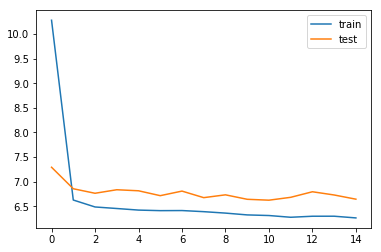

In [468]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=15, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [469]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.145


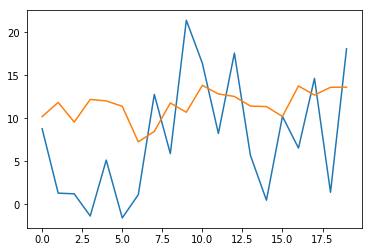

In [470]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20]);

In [401]:
X = reframed_qb_with_stats.drop('var91(t)',1).values
y = reframed_qb_with_stats['var91(t)'].values
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 229,shuffle = True)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1448, 1, 165) (1448,) (229, 1, 165) (229,)


Train on 1448 samples, validate on 229 samples
Epoch 1/15
 - 4s - loss: 11.2496 - val_loss: 8.5922
Epoch 2/15
 - 1s - loss: 7.1888 - val_loss: 6.6771
Epoch 3/15
 - 1s - loss: 6.5957 - val_loss: 6.4675
Epoch 4/15
 - 1s - loss: 6.5439 - val_loss: 6.4812
Epoch 5/15
 - 1s - loss: 6.5277 - val_loss: 6.4586
Epoch 6/15
 - 1s - loss: 6.4855 - val_loss: 6.4203
Epoch 7/15
 - 1s - loss: 6.4432 - val_loss: 6.4153
Epoch 8/15
 - 1s - loss: 6.4543 - val_loss: 6.4760
Epoch 9/15
 - 1s - loss: 6.4025 - val_loss: 6.4836
Epoch 10/15
 - 1s - loss: 6.4244 - val_loss: 6.4100
Epoch 11/15
 - 1s - loss: 6.3946 - val_loss: 6.5233
Epoch 12/15
 - 1s - loss: 6.3627 - val_loss: 6.3973
Epoch 13/15
 - 1s - loss: 6.3609 - val_loss: 6.4949
Epoch 14/15
 - 1s - loss: 6.2795 - val_loss: 6.4970
Epoch 15/15
 - 1s - loss: 6.2853 - val_loss: 6.4092


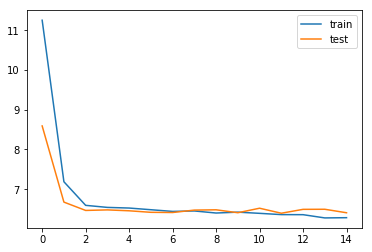

In [402]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=15, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [403]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.909


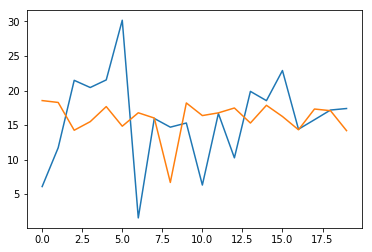

In [404]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20]);

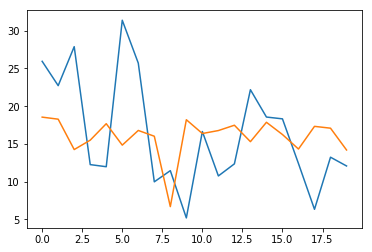

In [409]:
plt.plot(test_y[:20])
plt.plot(yhat[:20])

In [249]:
df_adp_qb = df[df['position'] == 'QB']
df_adp_rb = df[df['position'] == 'RB']
df_adp_wr = df[df['position'] == 'WR']
df_adp_te = df[df['position'] == 'TE']

In [250]:
df_adp_qb = df_adp_qb.sort_values(['date','player'])
df_adp_rb = df_adp_rb.sort_values(['date','player'])
df_adp_wr = df_adp_wr.sort_values(['date','player'])
df_adp_te = df_adp_te.sort_values(['date','player'])

In [251]:
df_adp_qb['y'] = df_adp_qb['FantPt']

In [227]:
df_adp_qb = df_adp_qb.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

In [228]:
df_adp_qb.shape[0]

1669

In [252]:
train = df_adp_qb[df_adp_qb['date'] < '2017-02-01']
test = df_adp_qb[df_adp_qb['date'] > '2017-02-01']

In [254]:
train = train.sort_values(['player','date'])
test = test.sort_values(['player', 'date'])

In [255]:
train = train.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
test = test.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

In [256]:
#Lets try and model with the new qb data that has adp included
reframed_train_qb = series_to_supervised(train, 1, 1)
reframed_test_qb = series_to_supervised(test, 1, 1)

In [260]:
#values = reframed_adp_qb.values

#train = values[:1500, :]
#test = values[1500:, :]
train = reframed_train_qb.values
test = reframed_test_qb.values


# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1267, 1, 155) (1267,) (400, 1, 155) (400,)


Train on 1267 samples, validate on 400 samples
Epoch 1/50
 - 3s - loss: 11.5226 - val_loss: 7.5417
Epoch 2/50
 - 0s - loss: 7.4134 - val_loss: 6.3202
Epoch 3/50
 - 0s - loss: 6.6479 - val_loss: 6.3308
Epoch 4/50
 - 1s - loss: 6.5460 - val_loss: 6.3299
Epoch 5/50
 - 1s - loss: 6.5003 - val_loss: 6.3803
Epoch 6/50
 - 0s - loss: 6.4671 - val_loss: 6.4340
Epoch 7/50
 - 1s - loss: 6.4353 - val_loss: 6.4458
Epoch 8/50
 - 1s - loss: 6.4162 - val_loss: 6.4768
Epoch 9/50
 - 0s - loss: 6.4016 - val_loss: 6.4260
Epoch 10/50
 - 0s - loss: 6.3804 - val_loss: 6.4023
Epoch 11/50
 - 0s - loss: 6.3612 - val_loss: 6.4492
Epoch 12/50
 - 0s - loss: 6.3600 - val_loss: 6.4669
Epoch 13/50
 - 1s - loss: 6.3537 - val_loss: 6.5071
Epoch 14/50
 - 1s - loss: 6.3416 - val_loss: 6.4293
Epoch 15/50
 - 0s - loss: 6.3269 - val_loss: 6.4642
Epoch 16/50
 - 0s - loss: 6.3218 - val_loss: 6.5607
Epoch 17/50
 - 0s - loss: 6.3113 - val_loss: 6.3741
Epoch 18/50
 - 0s - loss: 6.2847 - val_loss: 6.4312
Epoch 19/50
 - 0s - loss:

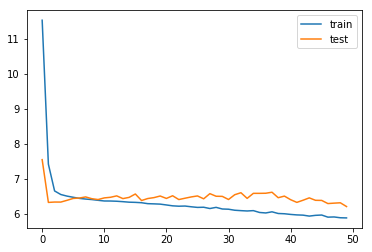

In [261]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [262]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.741


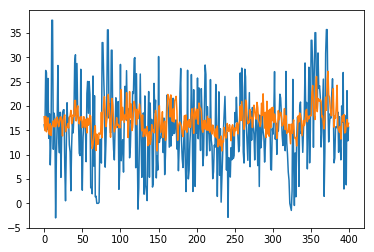

In [264]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [234]:
#Now for running backs
df_adp_rb['y'] = df_adp_rb['FantPt']

In [235]:
df_adp_rb = df_adp_rb.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
#df_adp_rb[['op_rank', 'h/a_', 'h/a_@','day_Mon', 'day_Sat','day_Sun','day_Thu','rank','adp', 'y']]

In [236]:
df_adp_rb.shape[0]

3338

In [237]:
reframed_adp_rb = series_to_supervised(df_adp_rb, 1, 1)

In [238]:
values = reframed_adp_rb.values

train = values[:3000, :]
test = values[3000:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3000, 1, 155) (3000,) (337, 1, 155) (337,)


Train on 3000 samples, validate on 337 samples
Epoch 1/50
 - 4s - loss: 5.4533 - val_loss: 5.1083
Epoch 2/50
 - 1s - loss: 5.1043 - val_loss: 4.9251
Epoch 3/50
 - 1s - loss: 5.0718 - val_loss: 4.9309
Epoch 4/50
 - 1s - loss: 5.0217 - val_loss: 4.9561
Epoch 5/50
 - 1s - loss: 5.0129 - val_loss: 4.9384
Epoch 6/50
 - 1s - loss: 4.9994 - val_loss: 4.8809
Epoch 7/50
 - 1s - loss: 4.9668 - val_loss: 5.0200
Epoch 8/50
 - 1s - loss: 4.9547 - val_loss: 4.9563
Epoch 9/50
 - 1s - loss: 4.9367 - val_loss: 4.9122
Epoch 10/50
 - 1s - loss: 4.9361 - val_loss: 4.9884
Epoch 11/50
 - 1s - loss: 4.8941 - val_loss: 4.9079
Epoch 12/50
 - 1s - loss: 4.8943 - val_loss: 4.8714
Epoch 13/50
 - 1s - loss: 4.8874 - val_loss: 4.9765
Epoch 14/50
 - 1s - loss: 4.8393 - val_loss: 4.9176
Epoch 15/50
 - 1s - loss: 4.8484 - val_loss: 4.9536
Epoch 16/50
 - 1s - loss: 4.8213 - val_loss: 5.0503
Epoch 17/50
 - 1s - loss: 4.8122 - val_loss: 5.0809
Epoch 18/50
 - 1s - loss: 4.8104 - val_loss: 5.0033
Epoch 19/50
 - 1s - loss: 

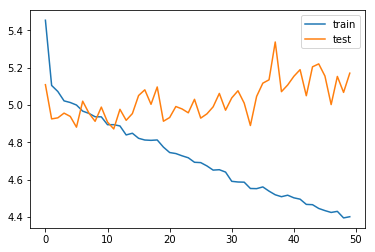

In [239]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [240]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.310


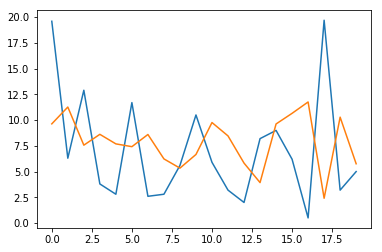

In [241]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20])

In [242]:
#Now for wide recievers
df_adp_wr['y'] = df_adp_wr['FantPt']

In [244]:
df_adp_wr = df_adp_wr.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
#df_adp_wr[['op_rank', 'h/a_', 'h/a_@','day_Mon', 'day_Sat','day_Sun','day_Thu','rank','adp', 'y']]

In [245]:
df_adp_wr.shape[0]

4473

In [246]:
reframed_adp_wr = series_to_supervised(df_adp_wr, 1, 1)

In [247]:
values = reframed_adp_wr.values

train = values[:4200, :]
test = values[4200:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4200, 1, 155) (4200,) (272, 1, 155) (272,)


Train on 4200 samples, validate on 272 samples
Epoch 1/50
 - 3s - loss: 4.9082 - val_loss: 4.4682
Epoch 2/50
 - 1s - loss: 4.7327 - val_loss: 4.3441
Epoch 3/50
 - 1s - loss: 4.7342 - val_loss: 4.3675
Epoch 4/50
 - 1s - loss: 4.7133 - val_loss: 4.2768
Epoch 5/50
 - 1s - loss: 4.7068 - val_loss: 4.2596
Epoch 6/50
 - 1s - loss: 4.6946 - val_loss: 4.2506
Epoch 7/50
 - 1s - loss: 4.6922 - val_loss: 4.2216
Epoch 8/50
 - 1s - loss: 4.6760 - val_loss: 4.4341
Epoch 9/50
 - 1s - loss: 4.6892 - val_loss: 4.3030
Epoch 10/50
 - 1s - loss: 4.6768 - val_loss: 4.2969
Epoch 11/50
 - 1s - loss: 4.6718 - val_loss: 4.2142
Epoch 12/50
 - 1s - loss: 4.6593 - val_loss: 4.2205
Epoch 13/50
 - 1s - loss: 4.6681 - val_loss: 4.3109
Epoch 14/50
 - 1s - loss: 4.6646 - val_loss: 4.2398
Epoch 15/50
 - 1s - loss: 4.6647 - val_loss: 4.2415
Epoch 16/50
 - 1s - loss: 4.6500 - val_loss: 4.4802
Epoch 17/50
 - 1s - loss: 4.6649 - val_loss: 4.4219
Epoch 18/50
 - 1s - loss: 4.6565 - val_loss: 4.4919
Epoch 19/50
 - 1s - loss: 

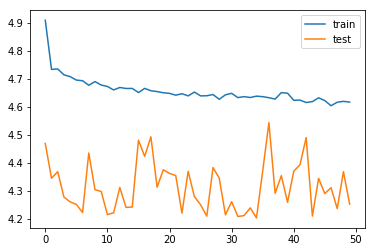

In [201]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [202]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.048


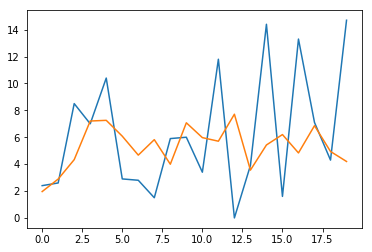

In [203]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20])

In [105]:
#Now for tight ends
df_adp_te['y'] = df_adp_te['FantPt']

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
df_adp_te = df_adp_te[['op_rank', 'h/a_', 'h/a_@','day_Mon', 'day_Sat','day_Sun','day_Thu','rank','adp', 'y']]

In [108]:
df_adp_te.shape[0]

378

In [109]:
reframed_adp_te = series_to_supervised(df_adp_te, 1, 1)

In [124]:
values = reframed_adp_te.values

train = values[:300, :]
test = values[300:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(300, 1, 19) (300,) (77, 1, 19) (77,)


Train on 300 samples, validate on 77 samples
Epoch 1/50
 - 2s - loss: 4.3722 - val_loss: 4.9506
Epoch 2/50
 - 0s - loss: 4.1296 - val_loss: 4.9060
Epoch 3/50
 - 0s - loss: 4.0753 - val_loss: 4.8591
Epoch 4/50
 - 0s - loss: 4.0729 - val_loss: 4.8110
Epoch 5/50
 - 0s - loss: 4.0478 - val_loss: 4.7652
Epoch 6/50
 - 0s - loss: 4.0425 - val_loss: 4.7442
Epoch 7/50
 - 0s - loss: 4.0198 - val_loss: 4.7425
Epoch 8/50
 - 0s - loss: 4.0122 - val_loss: 4.7109
Epoch 9/50
 - 0s - loss: 4.0234 - val_loss: 4.6991
Epoch 10/50
 - 0s - loss: 3.9895 - val_loss: 4.6746
Epoch 11/50
 - 0s - loss: 3.9779 - val_loss: 4.6707
Epoch 12/50
 - 0s - loss: 4.0042 - val_loss: 4.6788
Epoch 13/50
 - 0s - loss: 3.9506 - val_loss: 4.6211
Epoch 14/50
 - 0s - loss: 3.9731 - val_loss: 4.5999
Epoch 15/50
 - 0s - loss: 3.9697 - val_loss: 4.5945
Epoch 16/50
 - 0s - loss: 3.9744 - val_loss: 4.5835
Epoch 17/50
 - 0s - loss: 3.9571 - val_loss: 4.5673
Epoch 18/50
 - 0s - loss: 3.9544 - val_loss: 4.5426
Epoch 19/50
 - 0s - loss: 3.

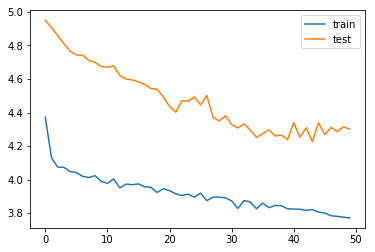

In [125]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [126]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.127


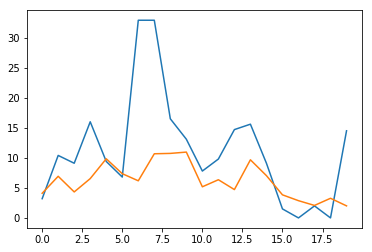

In [127]:
plt.plot(inv_y[:20])
plt.plot(inv_yhat[:20])

In [167]:
df_adp_qb = df[df['position'] == 'QB']
df_adp_rb = df[df['position'] == 'RB']
df_adp_wr = df[df['position'] == 'WR']
df_adp_te = df[df['position'] == 'TE']

In [1]:
df_adp_qb.sort_values(by = ['date' , 'week'])

NameError: name 'df_adp_qb' is not defined

In [316]:
train = projected_2017[projected_2017['date'] < '2017-12-01']
test = projected_2017[projected_2017['date'] > '2017-12-01']

In [317]:
train.shape

(2073, 104)

In [318]:
train['y'] = train['ppr']
test['y'] = test['ppr']

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [319]:
#another model!!!
train = train.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

test = test.drop(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

reframed_train = series_to_supervised(train, 1, 1)
reframed_test = series_to_supervised(test, 1, 1)

In [320]:
train = reframed_train.values
test = reframed_test.values

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2072, 1, 157) (2072,) (927, 1, 157) (927,)


Train on 2072 samples, validate on 927 samples
Epoch 1/50
 - 4s - loss: 6.1931 - val_loss: 5.6807
Epoch 2/50
 - 1s - loss: 5.5955 - val_loss: 5.4963
Epoch 3/50
 - 1s - loss: 5.5274 - val_loss: 5.5327
Epoch 4/50
 - 1s - loss: 5.4745 - val_loss: 5.4373
Epoch 5/50
 - 1s - loss: 5.4508 - val_loss: 5.5983
Epoch 6/50
 - 1s - loss: 5.4266 - val_loss: 5.4129
Epoch 7/50
 - 1s - loss: 5.4005 - val_loss: 5.5293
Epoch 8/50
 - 1s - loss: 5.3969 - val_loss: 5.5159
Epoch 9/50
 - 1s - loss: 5.3539 - val_loss: 5.3541
Epoch 10/50
 - 1s - loss: 5.3872 - val_loss: 5.3303
Epoch 11/50
 - 1s - loss: 5.3139 - val_loss: 5.3855
Epoch 12/50
 - 1s - loss: 5.3239 - val_loss: 5.2513
Epoch 13/50
 - 1s - loss: 5.2871 - val_loss: 5.4699
Epoch 14/50
 - 1s - loss: 5.2935 - val_loss: 5.7205
Epoch 15/50
 - 1s - loss: 5.3148 - val_loss: 5.5597
Epoch 16/50
 - 1s - loss: 5.2920 - val_loss: 5.3899
Epoch 17/50
 - 1s - loss: 5.2546 - val_loss: 5.3200
Epoch 18/50
 - 1s - loss: 5.2151 - val_loss: 5.2941
Epoch 19/50
 - 1s - loss: 

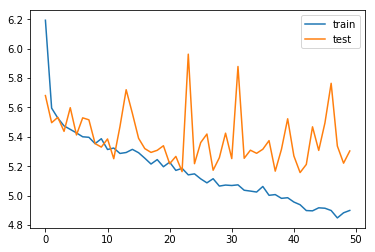

In [321]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [322]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.879


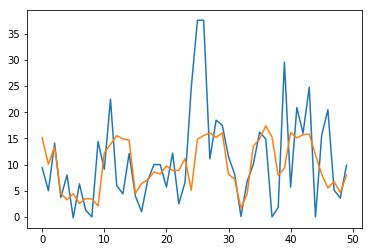

In [324]:
plt.plot(inv_y[:50])
plt.plot(inv_yhat[:50])

In [8]:
df_adp_qb = df[df['position'] == 'QB']
df_adp_rb = df[df['position'] == 'RB']
df_adp_wr = df[df['position'] == 'WR']
df_adp_te = df[df['position'] == 'TE']

Lets make this a classification problem.  Lets have a number 1 mean that the player is in the top three fantasy earners that week at qb, top 5 at wr, top 4 at rb, and top 3 at te and a zero otherwise.

In [38]:
from operator import itemgetter
from collections import defaultdict

In [70]:
def get_points(df):
    points_list = []
    for week in range(1,18):
        df_week = df[df['week'] == week]
        points_list.append(df_week['FantPt'])
    return points_list

In [71]:
def top_points(point_list):
    top = []
    i = 1
    for week in point_list:
        s_points = sorted(week, reverse = True)
        top.append((i, s_points))
        i +=1
        
    return top 

In [88]:
def to_binary(df, top, limit):
    binary_list = []
    for week in top:
        best = week[1]
        df_week = df[df['week'] == week[0]]
        for score in df_week['FantPt']:
            if score >= best[limit]:
                binary_list.append(1)
            else:
                binary_list.append(0)
    df['play'] = binary_list
    return df
            

In [755]:
def make_classification(df, position):
    if position == 'WR':
        limit = 5
    elif position == 'RB':
        limit = 4
    else:
        limit = 3
    df = df.sort_values('week')
    df_14 = df[df['date'] < '2015-02-01']
    df_15 = df[(df['date'] > '2015-02-01') & (df['date'] < '2016-02-01')]
    df_16 = df[(df['date'] < '2017-02-01') & (df['date'] > '2016-02-01')]
    df_17 = df[df['date'] > '2017-02-01']
    points_14 = get_points(df_14)
    points_15 = get_points(df_15)
    points_16 = get_points(df_16)
    points_17 = get_points(df_17)
    
    top_14 = top_points(points_14)
    top_15 = top_points(points_15)
    top_16 = top_points(points_16)
    top_17 = top_points(points_17)
    
    df_14 = to_binary(df_14, top_14, limit)
    df_15 = to_binary(df_15, top_15, limit)
    df_16 = to_binary(df_16, top_16, limit)
    df_17 = to_binary(df_17, top_17, limit)
    
    df_binary = df_14.append(df_15)
    df_binary = df_binary.append(df_16)
    df_binary = df_binary.append(df_17)
    
    return df_binary
            
                

In [ ]:
df_bin_qb = make_classification(df_adp_qb, 'QB')
df_bin_rb = make_classification(df_adp_rb, 'RB')
df_bin_wr = make_classification(df_adp_wr, 'WR')
df_bin_te = make_classification(df_adp_te, 'TE')



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [670]:
df_bin_qb

player     age       date  game  week  FantPt   ppr  DKPT  \
13         Aaron Rodgers  30-276 2014-09-04     1     1    9.56   9.6  10.6   
1219          Drew Brees  35-235 2014-09-07     1     1   15.52  15.5  19.5   
1307         Eli Manning  33-248 2014-09-08     1     1    6.52   6.5   8.5   
1463          Geno Smith  23-332 2014-09-07     1     1   12.64  12.6  14.6   
851     Colin Kaepernick  26-308 2014-09-07     1     1   17.14  17.1  17.1   
1115          Derek Carr  23-163 2014-09-07     1     1   13.94  13.9  13.9   
2723    Matthew Stafford  26-213 2014-09-08     1     1   30.04  30.0  33.0   
3719           Tony Romo  34-139 2014-09-07     1     1    9.24   9.2  12.2   
3702           Tom Brady  37-035 2014-09-07     1     1   10.26  10.3  12.3   
2915          Nick Foles  25-230 2014-09-07     1     1   14.88  14.9  20.9   
3451          Shaun Hill  34-241 2014-09-07     1     1    1.14   1.1   2.1   
3387      Ryan Tannehill  26-042 2014-09-07     1     1   12.92  12.9  13.9   
3042      Peyton Manning  38-167 2014-09-07     1     1   22.46  22.5  22.5   
3335      Russell Wilson  25-279 2014-09-04     1     1   18.54  18.5  18.5   
1802          Jay Cutler  31-131 2014-09-07     1     1   17.96  18.0  23.0   
1892          Joe Flacco  29-234 2014-09-07     1     1   16.50  16.5  20.5   
2037         Josh McCown  35-065 2014-09-07     1     1   14.02  14.0  16.0   
2696           Matt Ryan  29-113 2014-09-07     1     1   31.42  31.4  34.4   
3074       Philip Rivers  32-274 2014-09-08     1     1   12.52  12.5  13.5   
65            Alex Smith  32-108 2014-09-07     1     1    0.00   0.0   0.0   
64            Alex Smith  30-123 2014-09-07     1     1    9.68   9.7  12.7   
193          Andy Dalton  26-313 2014-09-07     1     1   18.34  18.3  21.3   
303   Ben Roethlisberger  32-189 2014-09-07     1     1   17.40  17.4  21.4   
175          Andrew Luck  24-360 2014-09-07     1     1   26.70  26.7  31.7   
1308         Eli Manning  33-254 2014-09-14     2     2   15.58  15.6  17.6   
1464          Geno Smith  23-339 2014-09-14     2     2   17.64  17.6  18.6   
1220          Drew Brees  35-242 2014-09-14     2     2   15.78  15.8  16.8   
2038         Josh McCown  35-072 2014-09-14     2     2   17.76  17.8  18.8   
2697           Matt Ryan  29-120 2014-09-14     2     2   10.04  10.0  13.0   
1893          Joe Flacco  29-238 2014-09-11     2     2   14.94  14.9  14.9   
...                  ...     ...        ...   ...   ...     ...   ...   ...   
1283         Eli Manning  36-355 2017-12-24    15    16    5.02   5.0   8.0   
1680      Jameis Winston  23-352 2017-12-24    15    16   13.28  13.3  19.3   
834         Dak Prescott  24-148 2017-12-24    15    16    5.34   5.3   7.3   
551           Cam Newton  28-227 2017-12-24    15    16   15.60  15.6  16.6   
637          Case Keenum  29-309 2017-12-23    15    16    9.36   9.4   9.4   
2978       Philip Rivers  36-023 2017-12-31    16    17   27.98  28.0  31.0   
3118      Russell Wilson  29-032 2017-12-31    16    17   20.44  20.4  20.4   
3440           Tom Brady  40-150 2017-12-31    16    17   15.60  15.6  15.6   
2946        Paxton Lynch  23-322 2017-12-31    16    17   13.46  13.5  16.5   
2917     Patrick Mahomes  22-105 2017-12-31    16    17   10.36  10.4  11.4   
399        Blake Bortles  25-247 2017-12-31    16    17    3.22   3.2   5.2   
485          Brian Hoyer  32-079 2017-12-31    16    17    0.20   0.2   0.2   
552           Cam Newton  28-234 2017-12-31    16    17   11.10  11.1  14.1   
1917          Joe Flacco  32-349 2017-12-31    16    17   14.12  14.1  15.1   
638          Case Keenum  29-317 2017-12-31    16    17   11.56  11.6  11.6   
835         Dak Prescott  24-155 2017-12-31    16    17   12.76  12.8  12.8   
991        DeShone Kizer  21-362 2017-12-31    16    17   24.66  24.7  28.7   
1885     Jimmy Garoppolo  26-059 2017-12-31    16    17   15.58  15.6  17.6   
1074          Derek Carr  26-278 2017-12-31    16    17    9.82   9.

In [166]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, normalize
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
import pickle


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [113]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [205]:
test = df_bin_qb[df_bin_qb['date'] > '2017-02-01']
train = df_bin_qb[df_bin_qb['date'] < '2017-02-01']

X = train.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position', 'play'], 1)
X_test = test.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position', 'play'], 1)

y = train.play

y_test = test.play

In [206]:
#Random forest classifier
rfc = RFC(max_features='auto',n_estimators=100, class_weight = {0:1, 1:50000000})
fit_rfc = rfc.fit(X, y)
yhat_up = fit_rfc.predict(X_test)
rfc_score = fit_rfc.score(X_test, y_test)
print(rfc_score)

0.5960099750623441


In [207]:
print(classification_report(y_test, yhat_up))

             precision    recall  f1-score   support

          0       0.89      0.58      0.71       333
          1       0.24      0.66      0.36        68

avg / total       0.78      0.60      0.65       401



[[194 139]
 [ 23  45]]


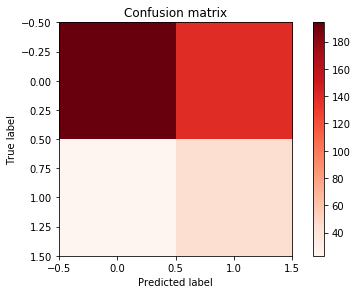

In [208]:
cm=confusion_matrix(y_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=10),
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X, y)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print('\n')
    print (alg_label)
    print ('-'*20)
    print
    print ("classification report")
    print (classification_report(y_obs, y_pred))
    print
    print ('   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print ('   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print ('   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print ('   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.83      0.99      0.90       333
          1       0.20      0.01      0.03        68

avg / total       0.72      0.82      0.75       401

   accuracy score             0.8229 
   precision score            0.2000 
   recall score               0.0147 
   f1 score                   0.0274 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.83      1.00      0.91       333
          1       0.00      0.00      0.00        68

avg / total       0.69      0.83      0.75       401

   accuracy score             0.8304 
   precision score            0.0000 
   recall score               0.0000 
   f1 score                   0.0000 


SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.83      1.00 

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




DecisionTreeClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       333
          1       0.16      0.07      0.10        68

avg / total       0.72      0.78      0.74       401

   accuracy score             0.7781 
   precision score            0.1613 
   recall score               0.0735 
   f1 score                   0.1010 


RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.83      0.97      0.89       333
          1       0.00      0.00      0.00        68

avg / total       0.69      0.81      0.74       401

   accuracy score             0.8080 
   precision score            0.0000 
   recall score               0.0000 
   f1 score                   0.0000 


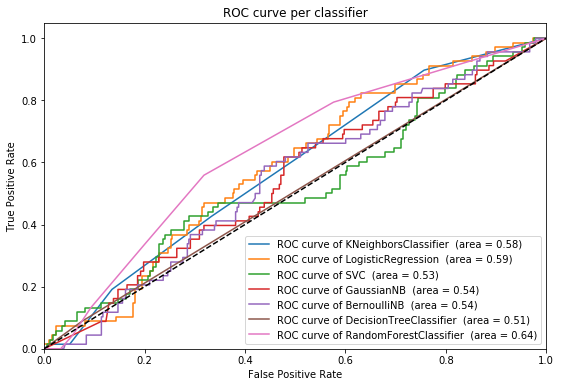

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
y_obs = y_test
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            KNeighborsClassifier(n_neighbors=10), 
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X, y)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X, y).decision_function(X_test)
    except:
        y_score = (alg.fit(X, y).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [214]:
#Random forest classifier
bnb = BernoulliNB()
fit_bnb = bnb.fit(X, y)
yhat_up = fit_bnb.predict(X_test)
bnb_score = fit_bnb.score(X_test, y_test)
print(bnb_score)

0.7780548628428927


In [216]:
print(classification_report(y_test, yhat_up))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       333
          1       0.04      0.01      0.02        68

avg / total       0.69      0.78      0.73       401



[[311  22]
 [ 67   1]]


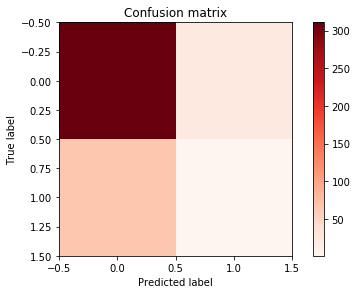

In [217]:
cm=confusion_matrix(y_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [223]:
#Random forest classifier
rfc = RFC(max_features='auto',n_estimators=100, class_weight = {0:1, 1:50000000})
fit_rfc = rfc.fit(X, y)
yhat_up = fit_rfc.predict(X_test)
rfc_score = fit_rfc.score(X_test, y_test)
print(rfc_score)

0.5960099750623441


In [224]:
print(classification_report(y_test, yhat_up))

             precision    recall  f1-score   support

          0       0.90      0.58      0.70       333
          1       0.25      0.69      0.37        68

avg / total       0.79      0.60      0.65       401



[[192 141]
 [ 21  47]]


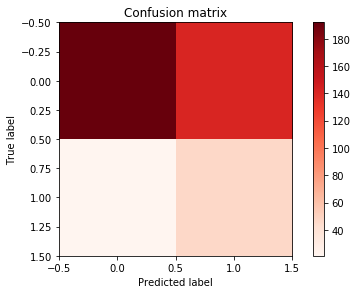

In [225]:
cm=confusion_matrix(y_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [201]:
def predict_with_cutoff(y_prob, threshold):
    y_pred = [1 if x >= threshold else 0 for x in y_prob]
    return y_pred

def cost(cm):
    tn, fp, fn, tp = cm.ravel()
    cost = (tn) + (tp * 1) + (fp * .8)
    return cost


def get_costlist(yhat):
    cost_list = []
    for i in yhat:
        cm=confusion_matrix(y_test, i, labels=None)
        cost_list.append(cost(cm))
    return cost_list

def get_score(cost_list, cm):
    tn, fp, fn, tp = cm.ravel()
    return max(cost_list)/(tn + fp + (fn + tp)*.05)

def getyhat(regressor, m, X_test):
    yhat = []
    y_score = regressor.predict_proba(X_test)[:,1]
    for i in m:
        yhat.append(predict_with_cutoff(y_score, i))
    return yhat

def getindex(cost_list):
    index = 0
    for i in cost_list:
        if max(cost_list) == i:
            ind = index
            index = index + 1
        else:
            index = index + 1
    return ind

In [202]:
m = np.linspace(0,1,1e3)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [218]:
yhat_list_rfc = getyhat(bnb, m, X_test)
cost_list_rfc = get_costlist(yhat_list_rfc)
index_rfc = getindex(cost_list_rfc)
y_up_score_rfc = bnb.predict_proba(X_test)[:,1]
yhat_rfc = predict_with_cutoff(y_up_score_rfc, m[index_rfc])
cm_rfc = confusion_matrix(y_test, yhat_rfc, labels=None)
score_rfc = get_score(cost_list_rfc,cm_rfc)

[[186 147]
 [ 28  40]]


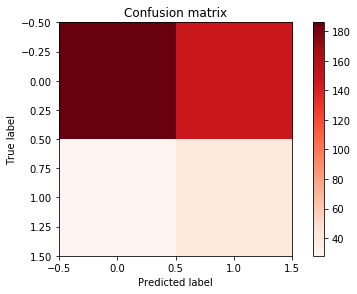

In [219]:
plt.figure()
plot_confusion_matrix(cm_rfc)
print(cm_rfc)

In [229]:
#lets add the data from the week before into the models.
#another model!!!

test = df_bin_qb[df_bin_qb['date'] > '2017-02-01']
train = df_bin_qb[df_bin_qb['date'] < '2017-02-01']

test = test.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
train = train.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

reframed_train = series_to_supervised(train, 1, 1)
reframed_test = series_to_supervised(test, 1, 1)

In [230]:

# split into input and outputs
X_train, y_train = train.drop('play',1), train.play
X_test, y_test = test.drop('play',1), test.play

In [234]:
#Random forest classifier
rfc = RFC(max_features='auto',n_estimators=100, class_weight = {0:1, 1:50000000})
fit_rfc = rfc.fit(X, y)
yhat_up = fit_rfc.predict(X_test)
rfc_score = fit_rfc.score(X_test, y_test)
print(rfc_score)

0.6084788029925187


In [235]:
print(classification_report(y_test, yhat_up))

             precision    recall  f1-score   support

          0       0.90      0.59      0.72       333
          1       0.26      0.69      0.37        68

avg / total       0.79      0.61      0.66       401



[[197 136]
 [ 21  47]]


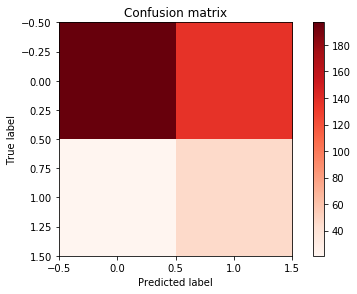

In [236]:
cm=confusion_matrix(y_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [237]:
#Random forest classifier
bnb = BernoulliNB()
fit_bnb = bnb.fit(X, y)
yhat_up = fit_bnb.predict(X_test)
bnb_score = fit_bnb.score(X_test, y_test)
print(bnb_score)


0.7780548628428927


In [238]:
print(classification_report(y_test, yhat_up))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       333
          1       0.04      0.01      0.02        68

avg / total       0.69      0.78      0.73       401



[[311  22]
 [ 67   1]]


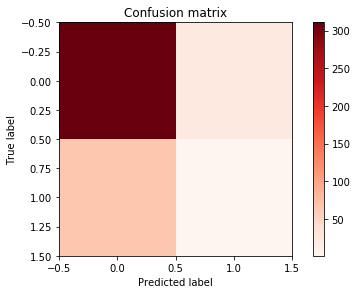

In [239]:
cm=confusion_matrix(y_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [274]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [319]:
#lets add the data from the week before into the models.
#another model!!!

test = df_bin_wr[df_bin_wr['date'] > '2017-02-01']
train = df_bin_wr[df_bin_wr['date'] < '2017-02-01']

test = test.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
train = train.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

reframed_train = series_to_supervised(train, 1, 1)
reframed_test = series_to_supervised(test, 1, 1)

In [320]:
train = reframed_train.values
test = reframed_test.values

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3313, 1, 155) (3313,) (1158, 1, 155) (1158,)


Train on 3313 samples, validate on 1158 samples
Epoch 1/10
 - 4s - loss: 0.3045 - acc: 0.9070 - val_loss: 0.2830 - val_acc: 0.9119
Epoch 2/10
 - 2s - loss: 0.2987 - acc: 0.9070 - val_loss: 0.2815 - val_acc: 0.9119
Epoch 3/10
 - 2s - loss: 0.2959 - acc: 0.9070 - val_loss: 0.2820 - val_acc: 0.9119
Epoch 4/10
 - 1s - loss: 0.2954 - acc: 0.9070 - val_loss: 0.2814 - val_acc: 0.9119
Epoch 5/10
 - 2s - loss: 0.2942 - acc: 0.9070 - val_loss: 0.2810 - val_acc: 0.9119
Epoch 6/10
 - 2s - loss: 0.2959 - acc: 0.9070 - val_loss: 0.2798 - val_acc: 0.9119
Epoch 7/10
 - 2s - loss: 0.2927 - acc: 0.9070 - val_loss: 0.2816 - val_acc: 0.9119
Epoch 8/10
 - 1s - loss: 0.2933 - acc: 0.9070 - val_loss: 0.2820 - val_acc: 0.9119
Epoch 9/10
 - 1s - loss: 0.2939 - acc: 0.9070 - val_loss: 0.2827 - val_acc: 0.9119
Epoch 10/10
 - 2s - loss: 0.2924 - acc: 0.9070 - val_loss: 0.2811 - val_acc: 0.9119


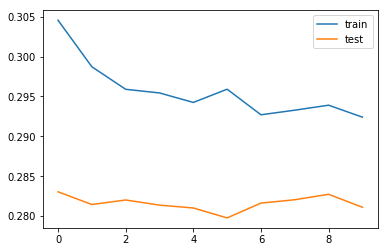

In [321]:
# design network
model = Sequential()
model.add(Conv1D(filters=155, kernel_size=3, padding='same', activation='relu',
                 input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(.2))
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [322]:

# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
yhat = model.predict_classes(test_X)
print(classification_report(test_y, yhat))

Accuracy: 91.19%


In [323]:
yhat = model.predict_classes(test_X)

In [324]:
print(classification_report(test_y, yhat))

             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95      1056
        1.0       0.00      0.00      0.00       102

avg / total       0.83      0.91      0.87      1158



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1056    0]
 [ 102    0]]


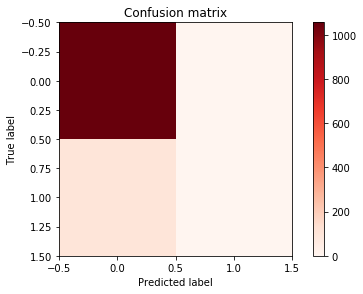

In [325]:
cm=confusion_matrix(test_y, yhat, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [344]:
#I suspect I may have a problem with unbalanced classes so I am going to remove all players who average below
#a certain number of points per game because it is likely that we would never want to pick them anyways and
#the goal of this model is to select only the best players.
#df_bin_qb = df_bin_qb[df_bin_qb.groupby('player').mean().FantPt < 12.5]

def remove_low_scorers(df, threshold):
    av_pts = df.groupby('player').mean().FantPt
    
    pp_pair = []
    for i in range(len(av_pts)):
        pp_pair.append((av_pts.index[i], av_pts.values[i]))

    player_list = []
    for pair in pp_pair:
        player, points = pair
        if points > threshold:
            player_list.append(player)
    new_df = df[df['player'].isin(player_list)]
    return new_df

In [673]:
df_reduced_qb = remove_low_scorers(df_bin_qb, 12)
df_reduced_rb = remove_low_scorers(df_bin_rb, 5)
df_reduced_wr = remove_low_scorers(df_bin_wr, 8)
df_reduced_te = remove_low_scorers(df_bin_te, 5)

In [745]:
test = df_reduced_wr[df_reduced_wr['date'] > '2017-12-25']
train = df_reduced_wr[df_reduced_wr['date'] < '2017-12-25']

test = test.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)
train = train.drop(['player','age','date','game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'position'], 1)

reframed_train = series_to_supervised(train, 1, 1)
reframed_test = series_to_supervised(test, 1, 1)

In [746]:
train = reframed_train.values
test = reframed_test.values

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1797, 1, 155) (1797,) (24, 1, 155) (24,)


Train on 1797 samples, validate on 24 samples
Epoch 1/10
 - 60s - loss: 0.4648 - acc: 0.8325 - val_loss: 0.5415 - val_acc: 0.7917
Epoch 2/10
 - 3s - loss: 0.4410 - acc: 0.8370 - val_loss: 0.5478 - val_acc: 0.7917
Epoch 3/10
 - 3s - loss: 0.4354 - acc: 0.8370 - val_loss: 0.5455 - val_acc: 0.7917
Epoch 4/10
 - 3s - loss: 0.4355 - acc: 0.8408 - val_loss: 0.5448 - val_acc: 0.7917
Epoch 5/10
 - 3s - loss: 0.4306 - acc: 0.8425 - val_loss: 0.5508 - val_acc: 0.7917
Epoch 6/10
 - 3s - loss: 0.4243 - acc: 0.8447 - val_loss: 0.5414 - val_acc: 0.7917
Epoch 7/10
 - 3s - loss: 0.4219 - acc: 0.8475 - val_loss: 0.5402 - val_acc: 0.7917
Epoch 8/10
 - 3s - loss: 0.4179 - acc: 0.8481 - val_loss: 0.5445 - val_acc: 0.7917
Epoch 9/10
 - 3s - loss: 0.4124 - acc: 0.8509 - val_loss: 0.5458 - val_acc: 0.7917
Epoch 10/10
 - 3s - loss: 0.4100 - acc: 0.8525 - val_loss: 0.5446 - val_acc: 0.7917


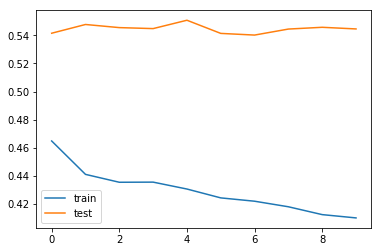

In [747]:
# design network
model = Sequential()

model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(.1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.1))
model.add(LSTM(100))
model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [731]:
def get_picks(y_prob, picks):
    threshold_list = np.linspace(0,1,1e3)
    for threshold in threshold_list:
        yhat = predict_with_cutoff(y_prob, threshold)
        if sum(yhat) in range(picks - 2, picks + 2):
            break
    return yhat

In [748]:
# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_prob = model.predict_proba(test_X)
yhat = get_picks(y_prob, 4)
print(classification_report(test_y, yhat))

Accuracy: 79.17%
             precision    recall  f1-score   support

        0.0       0.79      0.79      0.79        19
        1.0       0.20      0.20      0.20         5

avg / total       0.67      0.67      0.67        24



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


[[15  4]
 [ 4  1]]


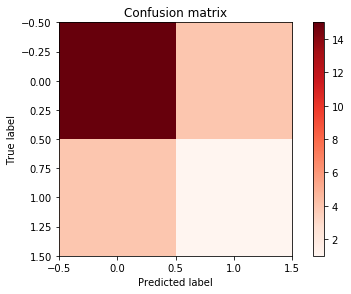

In [749]:
cm=confusion_matrix(test_y, yhat, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [501]:
np.dot(yhat,test_y)

2.0

In [752]:

def play_4_me(df, picks, start, end):
    
    index = pd.date_range(start, end)
    
    clean_df = clean_data(df)
    
    test_full = clean_df[clean_df['var2(t)'].isin(index)]
    train_full = clean_df[clean_df['var2(t)'] < start]
    
    test = test_full.drop(['var1(t-1)','var2(t)', 'var3(t)'],1)
    train = train_full.drop(['var1(t-1)','var2(t)', 'var3(t)'],1)
    
    train = train.values
    test = test.values

    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    # design network
    model = Sequential()
    model.add(Conv1D(filters=155, kernel_size=3, padding='same', activation='relu',
                 input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(.1))
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(Dropout(.1))
    model.add(LSTM(100))
    model.add(Dropout(.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    history = model.fit(train_X, train_y, epochs=15, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # Final evaluation of the model
    scores = model.evaluate(test_X, test_y, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    y_prob = model.predict_proba(test_X)
    yhat = get_picks(y_prob, picks)
    print(classification_report(test_y, yhat))
    cm=confusion_matrix(test_y, yhat, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)
    print(cm)
    
    test_full['prediction'] = yhat
    predictions = test_full[test_full['prediction'] == 1]
    player_list = predictions['var1(t-1)'].values
    actual = test_full[test_full['var81(t)'] == 1]
    true_player_list = actual['var1(t-1)'].values
    
    points_list = []
    for player in player_list:
        t = test_full[test_full['var1(t-1)'] == player]
        points_list.append((player, t['var3(t)'].values))
        
    true_list = []    
    for player in true_player_list:
        t = test_full[test_full['var1(t-1)'] == player]
        true_list.append((player, t['var3(t)'].values))
        
    num_correct = np.dot(yhat,test_y)
    return points_list, true_list, num_correct

In [398]:
test_full = df_reduced_qb[df_reduced_qb['date'] > '2017-12-25']

In [399]:
test_full.shape

(20, 104)

In [495]:
#need to clean the data to make sure that the values being used as previous week stats belong to the player

def clean_data(df):
    df = df.drop(['age','game', 'week', 'ppr', 'DKPT',
                  'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds',
                  'rutds','rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 
                  'XPA', 'position'], 1)
    
    player_list = df['player'].unique()
    reframed_list = []
    for player in player_list:
        player_df = df[df['player'] == player]
        player_df = player_df.sort_values(by = 'date')
        player_df = player_df.drop_duplicates()
        reframed_player = series_to_supervised(player_df, 1, 1)
        reframed_list.append(reframed_player)
    
    reframed_df = pd.DataFrame()
    for dataframe in reframed_list:
        reframed_df = reframed_df.append(dataframe)
        
    reframed_df = reframed_df.drop(['var2(t-1)','var1(t)'],1)
    return reframed_df
        
    
    
    

In [434]:
r = clean_data(df_reduced_qb)

In [474]:
time = df_reduced_qb[df_reduced_qb['date'] > '2017-02-01']
time.groupby('week').min()

player     age       date  game  FantPt  ppr  DKPT  FDPT  cmp  att  \
week                                                                            
1      Alex Smith  22-331 2017-09-07     1   -3.00 -3.0   2.0   1.0    9   17   
2      Alex Smith  22-338 2017-09-14     1    6.68  6.7   6.7   6.7   14   21   
3      Alex Smith  22-342 2017-09-21     2   -2.88 -2.9  -0.9  -0.9    8   18   
4      Alex Smith  22-352 2017-10-01     3    5.06  5.1   6.1   6.1    6   10   
5      Alex Smith  22-359 2017-10-05     4    1.44  1.4   1.4   1.4    5   11   
6      Alex Smith  23-001 2017-10-12     5    2.44  2.4   2.4   2.4    5   10   
7      Alex Smith  23-008 2017-10-19     6    2.88  2.9   3.9   3.9   10   16   
8      Alex Smith  23-296 2017-10-26     7    3.70  3.7   6.7   5.7   10   15   
9      Alex Smith  23-022 2017-11-02     8    3.48  3.5   3.5   3.5    7   13   
10    Andy Dalton  23-029 2017-11-09     9    2.94  2.9   3.9   3.9    9   18   
11     Alex Smith  23-036 2017-11-16    10   -1.20 -1.2   2.8   1.8    6   12   
12     Alex Smith  23-043 2017-11-23    11    2.42  2.4   3.4   3.4    2    2   
13     Alex Smith  23-050 2017-11-30    12    3.80  3.8   4.8   4.8    9   18   
14     Alex Smith  23-057 2017-12-07    13    3.46  3.5   5.5   5.5   13   25   
15     Alex Smith  23-064 2017-12-16    14    0.52  0.5   2.5   2.5   11   21   
16     Alex Smith  23-071 2017-12-23    15    5.02  5.0   7.3   7.0   14   21   
17    Andy Dalton  23-359 2017-12-31    16    0.24  0.2   0.2   0.2    1    2   

      ...   opponent_TEN  opponent_WAS  day_Mon  day_Sat  day_Sun  day_Thu  \
week  ...                                                                    
1     ...              0             0        0        0        0        0   
2     ...              0             0        0        0        0        0   
3     ...              0             0        0        0        0        0   
4     ...              0             0        0        0        0        0   
5     ...              0             0        0        0        0        0   
6     ...              0             0        0        0        0        0   
7     ...              0             0        0        0        0        0   
8     ...              0             0        0        0        0        0   
9     ...              0             0        0        0        0        0   
10    ...              0             0        0        0        0        0   
11    ...              0             0        0        0        0        0   
12    ...              0             0        0        0        0        0   
13    ...              0             0        0        0        0        0   
14    ...              0             0        0        0        0        0   
15    ...              0             0        0        0        0        0   
16    ...              0             0        0        0        0        0   
17    ...              0             0        0        0        1        0   

      rank    adp  position  play  
week                               
1       17  21.93        QB     0  
2       17  21.93        QB     0  
3       17  21.93        QB     0  
4       17  21.93        QB     0  
5       17  21.93        QB     0  
6       17  21.93        QB     0  
7       17  21.93        QB     0  
8       17  21.93        QB     0  
9       26  32.29        QB     0  
10      17  21.93        QB     0  
11      17  21.93        QB     0  
12      17  21.93        QB     0  
13      17  21.93        QB     0  
14      17  21.93        QB     0  
15      17  21.93        QB     0  
16      17  21.93        QB     0  
17      17  21.93        QB     0  

[17 rows x 103 columns]

In [475]:
season_dates = [('2017-09-07', '2017-09-13'),('2017-09-14', '2017-09-20'),('2017-09-21', '2017-09-30'),
                ('2017-10-01', '2017-10-04'),('2017-10-05', '2017-10-11'),('2017-10-12', '2017-10-18'),
                ('2017-10-19', '2017-10-25'),('2017-10-26', '2017-11-01'),('2017-11-02', '2017-11-08'),
                ('2017-11-09', '2017-11-15'),('2017-11-16', '2017-11-22'),('2017-11-23', '2017-11-29'),
                ('2017-11-30', '2017-12-06'),('2017-12-07', '2017-12-15'),('2017-12-16', '2017-12-22'),
                ('2017-12-23', '2017-12-30'),('2017-12-31', '2018-02-01')]

Train on 1095 samples, validate on 21 samples
Epoch 1/15
 - 40s - loss: 0.4914 - acc: 0.8237 - val_loss: 0.5012 - val_acc: 0.8095
Epoch 2/15
 - 1s - loss: 0.4673 - acc: 0.8228 - val_loss: 0.5029 - val_acc: 0.8095
Epoch 3/15
 - 1s - loss: 0.4637 - acc: 0.8228 - val_loss: 0.4994 - val_acc: 0.8095
Epoch 4/15
 - 1s - loss: 0.4566 - acc: 0.8228 - val_loss: 0.5189 - val_acc: 0.8095
Epoch 5/15
 - 1s - loss: 0.4598 - acc: 0.8228 - val_loss: 0.5140 - val_acc: 0.8095
Epoch 6/15
 - 1s - loss: 0.4520 - acc: 0.8228 - val_loss: 0.5393 - val_acc: 0.8095
Epoch 7/15
 - 1s - loss: 0.4527 - acc: 0.8228 - val_loss: 0.5004 - val_acc: 0.8095
Epoch 8/15
 - 1s - loss: 0.4489 - acc: 0.8237 - val_loss: 0.5033 - val_acc: 0.8095
Epoch 9/15
 - 1s - loss: 0.4455 - acc: 0.8256 - val_loss: 0.5067 - val_acc: 0.8095
Epoch 10/15
 - 1s - loss: 0.4453 - acc: 0.8265 - val_loss: 0.5128 - val_acc: 0.8095
Epoch 11/15
 - 1s - loss: 0.4409 - acc: 0.8301 - val_loss: 0.5427 - val_acc: 0.8095
Epoch 12/15
 - 1s - loss: 0.4408 - acc

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


             precision    recall  f1-score   support

        0.0       0.76      0.76      0.76        17
        1.0       0.00      0.00      0.00         4

avg / total       0.62      0.62      0.62        21

[[13  4]
 [ 4  0]]


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train on 1116 samples, validate on 22 samples
Epoch 1/15
 - 37s - loss: 0.4915 - acc: 0.8181 - val_loss: 0.4614 - val_acc: 0.8182
Epoch 2/15
 - 2s - loss: 0.4649 - acc: 0.8226 - val_loss: 0.4481 - val_acc: 0.8182
Epoch 3/15
 - 2s - loss: 0.4646 - acc: 0.8226 - val_loss: 0.4426 - val_acc: 0.8182
Epoch 4/15
 - 2s - loss: 0.4585 - acc: 0.8226 - val_loss: 0.4385 - val_acc: 0.8182
Epoch 5/15
 - 2s - loss: 0.4610 - acc: 0.8226 - val_loss: 0.4483 - val_acc: 0.8182
Epoch 6/15
 - 2s - loss: 0.4588 - acc: 0.8226 - val_loss: 0.4352 - val_acc: 0.8182
Epoch 7/15
 - 2s - loss: 0.4535 - acc: 0.8226 - val_loss: 0.4586 - val_acc: 0.8182
Epoch 8/15
 - 2s - loss: 0.4520 - acc: 0.8244 - val_loss: 0.4745 - val_acc: 0.8182
Epoch 9/15
 - 2s - loss: 0.4535 - acc: 0.8271 - val_loss: 0.4587 - val_acc: 0.8182
Epoch 10/15
 - 2s - loss: 0.4498 - acc: 0.8297 - val_loss: 0.4651 - val_acc: 0.8182
Epoch 11/15
 - 1s - loss: 0.4493 - acc: 0.8297 - val_loss: 0.4827 - val_acc: 0.8182
Epoch 12/15
 - 2s - loss: 0.4427 - acc

Epoch 6/15
 - 2s - loss: 0.4547 - acc: 0.8224 - val_loss: 0.4648 - val_acc: 0.8182
Epoch 7/15
 - 1s - loss: 0.4543 - acc: 0.8232 - val_loss: 0.4611 - val_acc: 0.8182
Epoch 8/15
 - 1s - loss: 0.4596 - acc: 0.8241 - val_loss: 0.4648 - val_acc: 0.8182
Epoch 9/15
 - 1s - loss: 0.4486 - acc: 0.8249 - val_loss: 0.4566 - val_acc: 0.8182
Epoch 10/15
 - 2s - loss: 0.4470 - acc: 0.8265 - val_loss: 0.4596 - val_acc: 0.8182
Epoch 11/15
 - 1s - loss: 0.4477 - acc: 0.8265 - val_loss: 0.4566 - val_acc: 0.8182
Epoch 12/15
 - 1s - loss: 0.4459 - acc: 0.8282 - val_loss: 0.4558 - val_acc: 0.8182
Epoch 13/15
 - 1s - loss: 0.4431 - acc: 0.8290 - val_loss: 0.4545 - val_acc: 0.8182
Epoch 14/15
 - 1s - loss: 0.4376 - acc: 0.8298 - val_loss: 0.4571 - val_acc: 0.8182
Epoch 15/15
 - 2s - loss: 0.4361 - acc: 0.8347 - val_loss: 0.4486 - val_acc: 0.8182
Accuracy: 81.82%
             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89        18
        1.0       0.50      0.50      0.

Epoch 12/15
 - 1s - loss: 0.4392 - acc: 0.8307 - val_loss: 0.4827 - val_acc: 0.8000
Epoch 13/15
 - 2s - loss: 0.4468 - acc: 0.8261 - val_loss: 0.4790 - val_acc: 0.8000
Epoch 14/15
 - 2s - loss: 0.4443 - acc: 0.8261 - val_loss: 0.4849 - val_acc: 0.8000
Epoch 15/15
 - 2s - loss: 0.4422 - acc: 0.8292 - val_loss: 0.5010 - val_acc: 0.8000
Accuracy: 80.00%
             precision    recall  f1-score   support

        0.0       0.81      0.81      0.81        16
        1.0       0.25      0.25      0.25         4

avg / total       0.70      0.70      0.70        20

[[13  3]
 [ 3  1]]
Train on 1337 samples, validate on 22 samples
Epoch 1/15
 - 47s - loss: 0.4988 - acc: 0.8160 - val_loss: 0.4734 - val_acc: 0.8182
Epoch 2/15
 - 2s - loss: 0.4725 - acc: 0.8190 - val_loss: 0.4670 - val_acc: 0.8182
Epoch 3/15
 - 2s - loss: 0.4680 - acc: 0.8190 - val_loss: 0.4632 - val_acc: 0.8182
Epoch 4/15
 - 2s - loss: 0.4646 - acc: 0.8190 - val_loss: 0.4670 - val_acc: 0.8182
Epoch 5/15
 - 2s - loss: 0.4631 - 

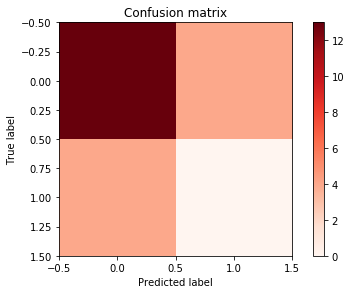

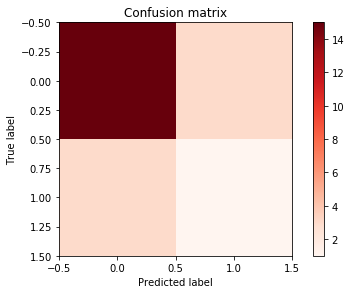

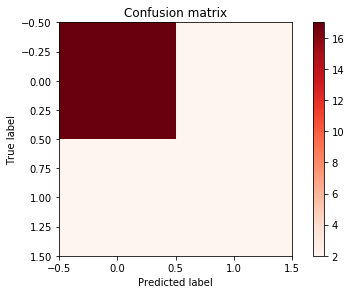

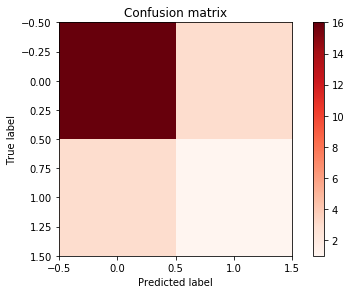

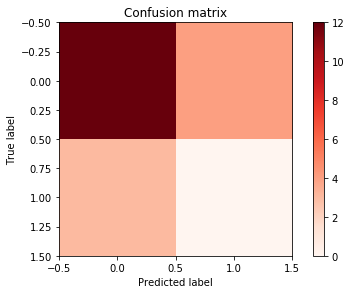

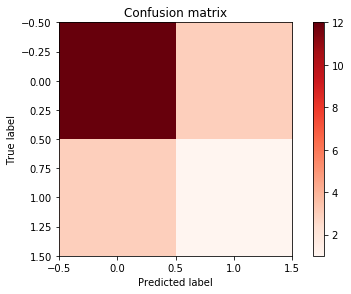

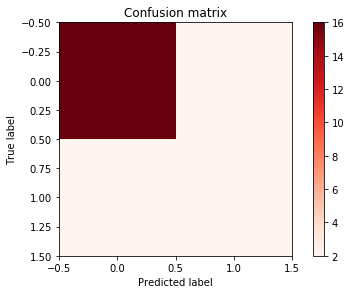

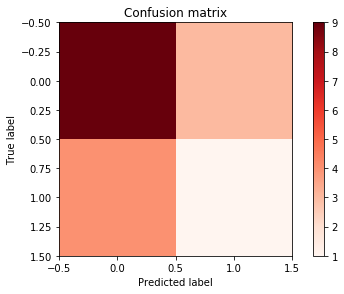

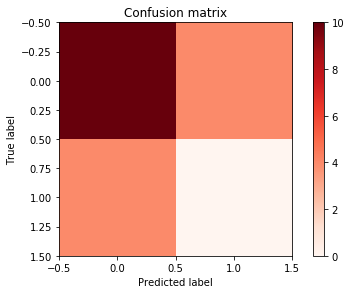

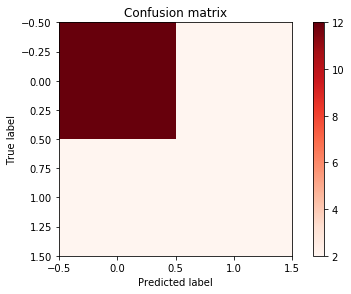

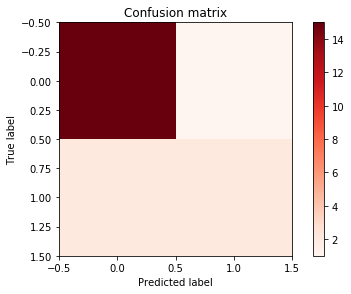

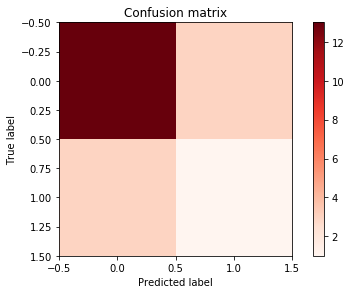

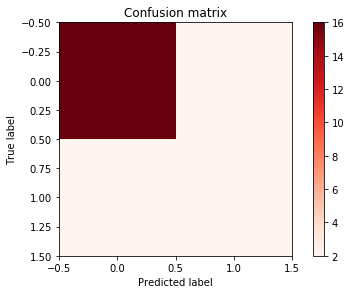

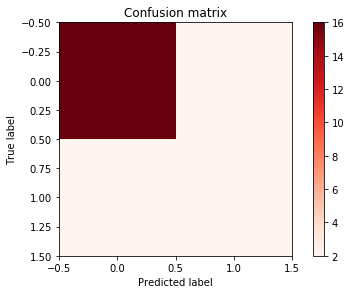

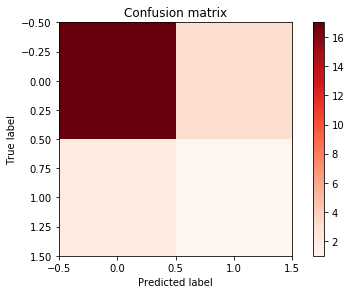

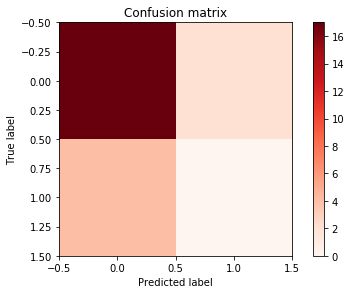

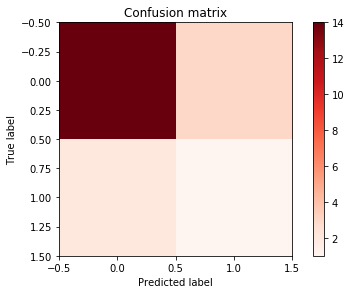

In [680]:
predictions = []
num_correct_list = []
for start, end in season_dates:
    p_list, t_list, num_correct = play_4_me(df_reduced_qb, 3, start, end)
    num_correct_list.append(num_correct)
    predictions.append((p_list, t_list))

In [ ]:
plt.rc('axes', axisbelow=True)

In [684]:
i = 1
pred_points = []
for week in predictions:
    print('WEEK '+str(i))
    print('Predictions')
    print(week[0])
    print('True')
    print(week[1])
    i +=1

WEEK 1
Predictions
[('Russell Wilson', array([8.32])), ('Ben Roethlisberger', array([15.72])), ('Tyrod Taylor', array([18.76])), ('Kirk Cousins', array([10.6]))]
True
[('Matthew Stafford', array([27.08])), ('Alex Smith', array([31.02])), ('Sam Bradford', array([25.54])), ('Marcus Mariota', array([18.84]))]
WEEK 2
Predictions
[('Derek Carr', array([21.2])), ('Russell Wilson', array([15.32])), ('Matt Ryan', array([14.88])), ('Marcus Mariota', array([13.]))]
True
[('Drew Brees', array([22.24])), ('Derek Carr', array([21.2])), ('Tom Brady', array([30.78])), ('Ben Roethlisberger', array([17.52]))]
WEEK 3
Predictions
[('Derek Carr', array([5.22])), ('Russell Wilson', array([33.52])), ('Cam Newton', array([8.28])), ('Case Keenum', array([28.56]))]
True
[('Tom Brady', array([35.72])), ('Russell Wilson', array([33.52])), ('Blake Bortles', array([27.56])), ('Case Keenum', array([28.56]))]
WEEK 4
Predictions
[('Drew Brees', array([19.02])), ('Tom Brady', array([20.48])), ('Russell Wilson', array(

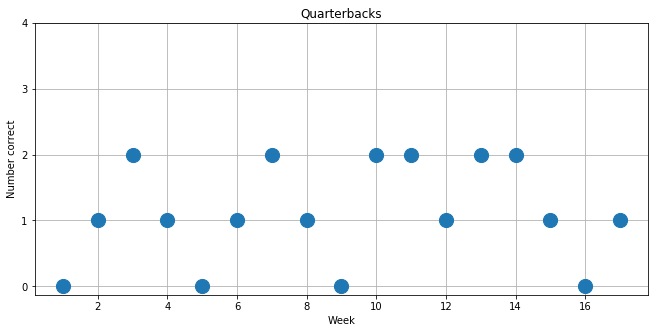

In [681]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.scatter(x=range(1,18),y=num_correct_list, s=200)
ax.set_xlabel('Week')
ax.set_ylabel('Number correct')
ax.set_yticks(np.arange(5));
ax.set_title('Quarterbacks');
ax.grid()

In [682]:
pred_pts = []
true_pts = []

all_pred = []
all_true = []
for pred, true in predictions:
    week_pts = []
    for player, points in pred:
        week_pts.append(points)
    all_pred.append(week_pts)
    pred_pts.append(int(np.mean(week_pts)))
    week_pts = []
    for player, points in true:
        week_pts.append(points)
    all_true.append(week_pts)
    true_pts.append(int(np.mean(week_pts)))

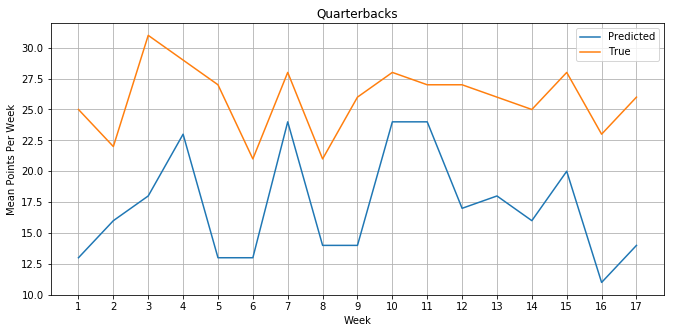

In [689]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.plot(np.arange(1,18),pred_pts)
ax.plot(np.arange(1,18),true_pts)
ax.set_xlabel('Week')
ax.set_ylabel('Mean Points Per Week')
ax.set_xticks(np.arange(1,18))
ax.set_title('Quarterbacks');
ax.legend( ('Predicted', 'True'), loc='best')
ax.grid()

In [620]:
pred_pts

[13, 15, 18, 20, 11, 17, 16, 13, 15, 24, 27, 17, 18, 15, 19, 15, 15]

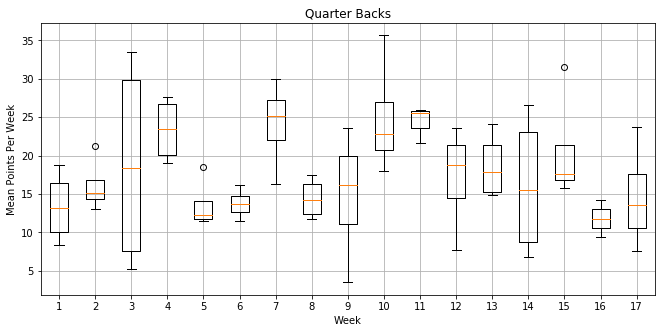

In [685]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.boxplot(all_pred)
#ax.plot(true_pts)
ax.set_xlabel('Week')
ax.set_ylabel('Mean Points Per Week')
ax.set_xticks(np.arange(1,18))
ax.set_title('Quarter Backs');
ax.grid()

Train on 1865 samples, validate on 34 samples
Epoch 1/15
 - 123s - loss: 0.3914 - acc: 0.8670 - val_loss: 0.1955 - val_acc: 0.9706
Epoch 2/15
 - 3s - loss: 0.3812 - acc: 0.8702 - val_loss: 0.1852 - val_acc: 0.9706
Epoch 3/15
 - 3s - loss: 0.3775 - acc: 0.8702 - val_loss: 0.1810 - val_acc: 0.9706
Epoch 4/15
 - 3s - loss: 0.3757 - acc: 0.8702 - val_loss: 0.1921 - val_acc: 0.9706
Epoch 5/15
 - 3s - loss: 0.3739 - acc: 0.8702 - val_loss: 0.1781 - val_acc: 0.9706
Epoch 6/15
 - 3s - loss: 0.3713 - acc: 0.8702 - val_loss: 0.1752 - val_acc: 0.9706
Epoch 7/15
 - 2s - loss: 0.3697 - acc: 0.8702 - val_loss: 0.1712 - val_acc: 0.9706
Epoch 8/15
 - 2s - loss: 0.3671 - acc: 0.8702 - val_loss: 0.1844 - val_acc: 0.9706
Epoch 9/15
 - 2s - loss: 0.3618 - acc: 0.8708 - val_loss: 0.1800 - val_acc: 0.9706
Epoch 10/15
 - 2s - loss: 0.3553 - acc: 0.8767 - val_loss: 0.1769 - val_acc: 0.9706
Epoch 11/15
 - 2s - loss: 0.3636 - acc: 0.8718 - val_loss: 0.1653 - val_acc: 0.9706
Epoch 12/15
 - 2s - loss: 0.3533 - ac

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


             precision    recall  f1-score   support

        0.0       1.00      0.85      0.92        33
        1.0       0.17      1.00      0.29         1

avg / total       0.98      0.85      0.90        34

[[28  5]
 [ 0  1]]


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train on 1899 samples, validate on 47 samples
Epoch 1/15
 - 126s - loss: 0.3894 - acc: 0.8684 - val_loss: 0.2786 - val_acc: 0.9149
Epoch 2/15
 - 3s - loss: 0.3758 - acc: 0.8720 - val_loss: 0.2694 - val_acc: 0.9149
Epoch 3/15
 - 3s - loss: 0.3728 - acc: 0.8720 - val_loss: 0.2661 - val_acc: 0.9149
Epoch 4/15
 - 3s - loss: 0.3708 - acc: 0.8720 - val_loss: 0.2702 - val_acc: 0.9149
Epoch 5/15
 - 3s - loss: 0.3716 - acc: 0.8720 - val_loss: 0.2580 - val_acc: 0.9149
Epoch 6/15
 - 3s - loss: 0.3650 - acc: 0.8720 - val_loss: 0.2599 - val_acc: 0.9149
Epoch 7/15
 - 3s - loss: 0.3609 - acc: 0.8715 - val_loss: 0.2757 - val_acc: 0.9149
Epoch 8/15
 - 3s - loss: 0.3658 - acc: 0.8731 - val_loss: 0.2525 - val_acc: 0.9149
Epoch 9/15
 - 3s - loss: 0.3513 - acc: 0.8752 - val_loss: 0.2621 - val_acc: 0.8723
Epoch 10/15
 - 3s - loss: 0.3605 - acc: 0.8741 - val_loss: 0.2526 - val_acc: 0.9149
Epoch 11/15
 - 3s - loss: 0.3545 - acc: 0.8736 - val_loss: 0.2559 - val_acc: 0.9362
Epoch 12/15
 - 3s - loss: 0.3466 - ac

Epoch 6/15
 - 3s - loss: 0.3617 - acc: 0.8744 - val_loss: 0.2957 - val_acc: 0.8958
Epoch 7/15
 - 3s - loss: 0.3572 - acc: 0.8753 - val_loss: 0.2991 - val_acc: 0.9167
Epoch 8/15
 - 4s - loss: 0.3571 - acc: 0.8701 - val_loss: 0.2956 - val_acc: 0.8958
Epoch 9/15
 - 4s - loss: 0.3482 - acc: 0.8744 - val_loss: 0.2953 - val_acc: 0.9167
Epoch 10/15
 - 4s - loss: 0.3470 - acc: 0.8758 - val_loss: 0.2972 - val_acc: 0.8958
Epoch 11/15
 - 4s - loss: 0.3432 - acc: 0.8809 - val_loss: 0.3451 - val_acc: 0.8958
Epoch 12/15
 - 4s - loss: 0.3499 - acc: 0.8795 - val_loss: 0.2970 - val_acc: 0.8958
Epoch 13/15
 - 4s - loss: 0.3415 - acc: 0.8819 - val_loss: 0.2887 - val_acc: 0.9167
Epoch 14/15
 - 5s - loss: 0.3324 - acc: 0.8833 - val_loss: 0.3071 - val_acc: 0.9167
Epoch 15/15
 - 4s - loss: 0.3294 - acc: 0.8852 - val_loss: 0.3097 - val_acc: 0.8958
Accuracy: 89.58%
             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92        43
        1.0       0.33      0.40      0.

Epoch 12/15
 - 3s - loss: 0.3395 - acc: 0.8834 - val_loss: 0.3202 - val_acc: 0.8980
Epoch 13/15
 - 3s - loss: 0.3353 - acc: 0.8842 - val_loss: 0.3211 - val_acc: 0.8980
Epoch 14/15
 - 3s - loss: 0.3291 - acc: 0.8872 - val_loss: 0.3325 - val_acc: 0.8980
Epoch 15/15
 - 3s - loss: 0.3267 - acc: 0.8859 - val_loss: 0.3083 - val_acc: 0.8980
Accuracy: 89.80%
             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92        44
        1.0       0.33      0.40      0.36         5

avg / total       0.87      0.86      0.86        49

[[40  4]
 [ 3  2]]
Train on 2390 samples, validate on 49 samples
Epoch 1/15
 - 119s - loss: 0.3798 - acc: 0.8724 - val_loss: 0.3411 - val_acc: 0.8980
Epoch 2/15
 - 4s - loss: 0.3679 - acc: 0.8757 - val_loss: 0.3474 - val_acc: 0.8980
Epoch 3/15
 - 3s - loss: 0.3638 - acc: 0.8757 - val_loss: 0.3411 - val_acc: 0.8980
Epoch 4/15
 - 3s - loss: 0.3623 - acc: 0.8757 - val_loss: 0.3430 - val_acc: 0.8980
Epoch 5/15
 - 3s - loss: 0.3610 -

[[31  6]
 [ 5  0]]


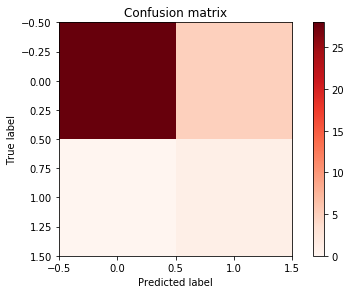

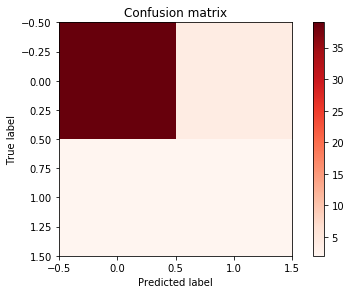

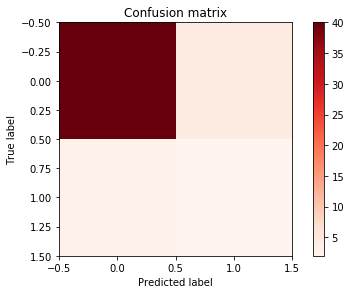

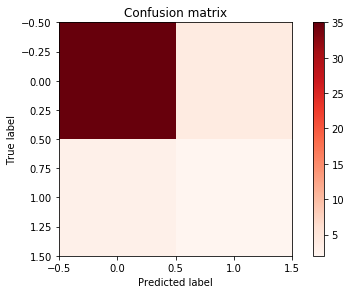

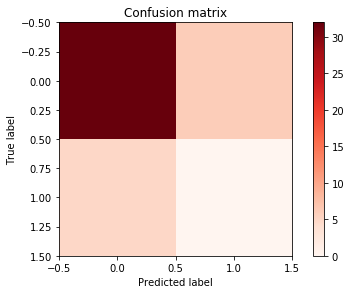

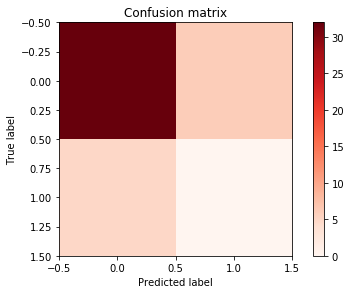

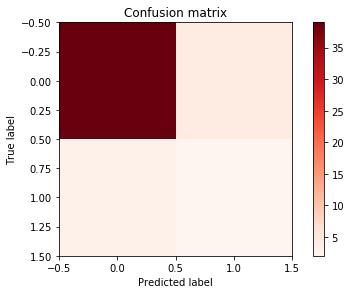

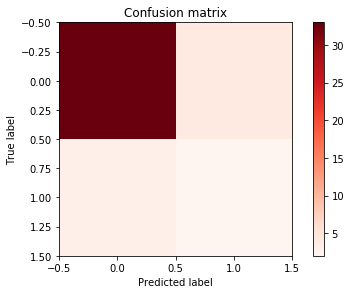

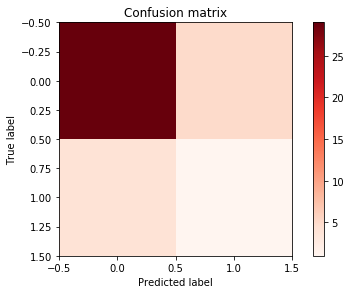

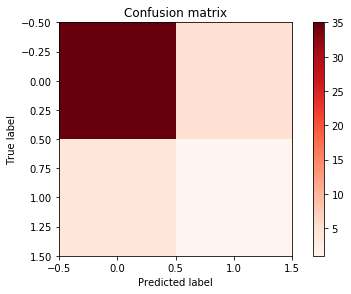

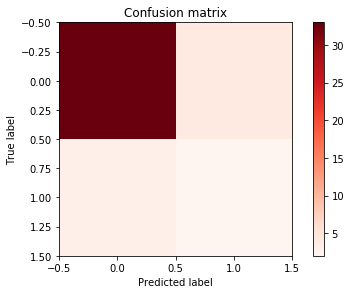

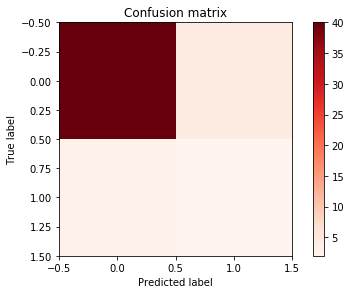

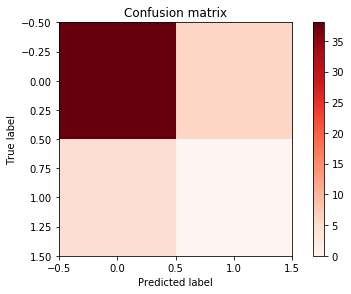

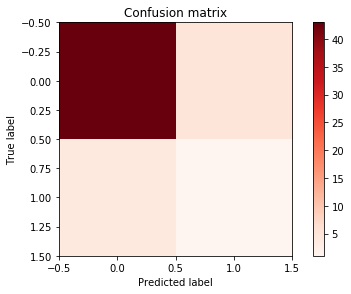

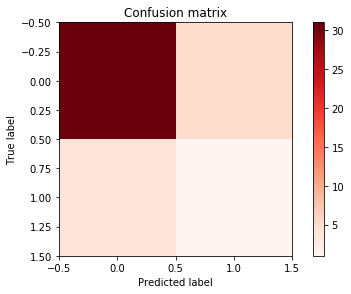

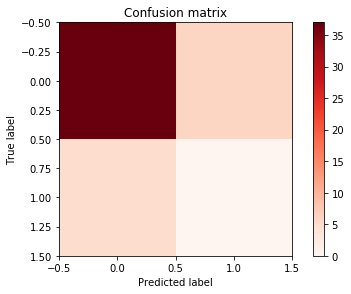

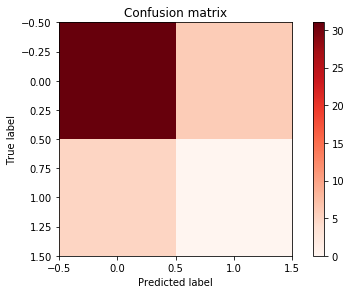

In [753]:
predictions = []
num_correct_list = []
for start, end in season_dates:
    p_list, t_list, num_correct = play_4_me(df_reduced_rb, 5, start, end)
    num_correct_list.append(num_correct)
    predictions.append((p_list, t_list))

In [642]:
i = 1
pred_points = []
for week in predictions:
    print('WEEK '+str(i))
    print('Predictions')
    print(week[0])
    print('True')
    print(week[1])
    i +=1
    

WEEK 1
Predictions
[('Devonta Freeman', array([9.9])), ('Lamar Miller', array([9.6])), ('LeSean McCoy', array([15.9])), ('Marshawn Lynch', array([9.2])), ('C.J. Anderson', array([8.8])), ('Ezekiel Elliott', array([14.]))]
True
[]
WEEK 2
Predictions
[('Devonta Freeman', array([22.])), ('Todd Gurley', array([23.6])), ('Ezekiel Elliott', array([2.2])), ('Leonard Fournette', array([12.1])), ('Kareem Hunt', array([22.9])), ('Mike Gillislee', array([12.9]))]
True
[('Devonta Freeman', array([22.])), ('C.J. Anderson', array([27.4])), ('Todd Gurley', array([23.6])), ('Kareem Hunt', array([22.9]))]
WEEK 3
Predictions
[('Marshawn Lynch', array([2.6])), ('Carlos Hyde', array([21.4])), ('C.J. Anderson', array([4.3])), ('Jay Ajayi', array([2.5])), ('Ezekiel Elliott', array([15.4])), ('Christian McCaffrey', array([11.7]))]
True
[('Carlos Hyde', array([21.4])), ('Todd Gurley', array([32.9])), ('Jordan Howard', array([26.6, 12.3])), ('Kareem Hunt', array([24.3]))]
WEEK 4
Predictions
[('Devonta Freeman'

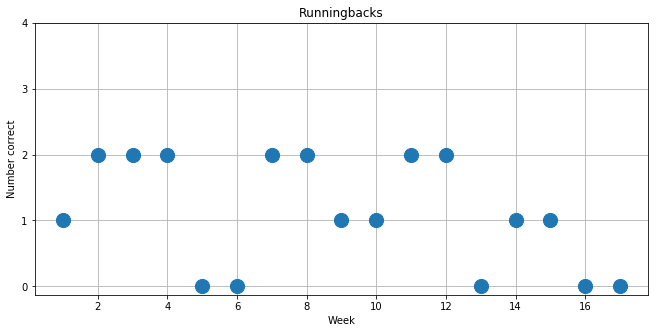

In [754]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.scatter(x=range(1,18),y=num_correct_list, s=200)
ax.set_xlabel('Week')
ax.set_ylabel('Number correct')
ax.set_yticks(np.arange(5));
ax.set_title('Runningbacks');
ax.grid()

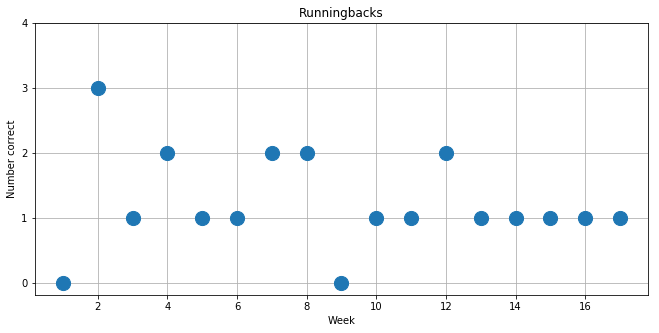

In [643]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.scatter(x=range(1,18),y=num_correct_list, s=200)
ax.set_xlabel('Week')
ax.set_ylabel('Number correct')
ax.set_yticks(np.arange(5));
ax.set_title('Runningbacks');
ax.grid()

Train on 646 samples, validate on 10 samples
Epoch 1/15
 - 21s - loss: 0.6010 - acc: 0.7291 - val_loss: 0.5457 - val_acc: 0.8000
Epoch 2/15
 - 0s - loss: 0.5794 - acc: 0.7399 - val_loss: 0.5307 - val_acc: 0.8000
Epoch 3/15
 - 0s - loss: 0.5704 - acc: 0.7399 - val_loss: 0.5524 - val_acc: 0.8000
Epoch 4/15
 - 0s - loss: 0.5722 - acc: 0.7399 - val_loss: 0.5560 - val_acc: 0.8000
Epoch 5/15
 - 0s - loss: 0.5742 - acc: 0.7368 - val_loss: 0.5401 - val_acc: 0.8000
Epoch 6/15
 - 0s - loss: 0.5670 - acc: 0.7399 - val_loss: 0.6024 - val_acc: 0.8000
Epoch 7/15
 - 0s - loss: 0.5775 - acc: 0.7337 - val_loss: 0.5443 - val_acc: 0.8000
Epoch 8/15
 - 0s - loss: 0.5658 - acc: 0.7353 - val_loss: 0.5527 - val_acc: 0.8000
Epoch 9/15
 - 0s - loss: 0.5601 - acc: 0.7399 - val_loss: 0.6072 - val_acc: 0.8000
Epoch 10/15
 - 0s - loss: 0.5696 - acc: 0.7415 - val_loss: 0.5679 - val_acc: 0.8000
Epoch 11/15
 - 0s - loss: 0.5653 - acc: 0.7415 - val_loss: 0.5663 - val_acc: 0.8000
Epoch 12/15
 - 0s - loss: 0.5653 - acc:

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         8
        1.0       0.00      0.00      0.00         2

avg / total       0.53      0.40      0.46        10

[[4 4]
 [2 0]]

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Train on 656 samples, validate on 12 samples
Epoch 1/15
 - 24s - loss: 0.5909 - acc: 0.7302 - val_loss: 0.5862 - val_acc: 0.6667
Epoch 2/15
 - 1s - loss: 0.5727 - acc: 0.7409 - val_loss: 0.5699 - val_acc: 0.7500
Epoch 3/15
 - 1s - loss: 0.5714 - acc: 0.7439 - val_loss: 0.5643 - val_acc: 0.7500
Epoch 4/15
 - 1s - loss: 0.5692 - acc: 0.7424 - val_loss: 0.5541 - val_acc: 0.7500
Epoch 5/15
 - 1s - loss: 0.5570 - acc: 0.7470 - val_loss: 0.5429 - val_acc: 0.8333
Epoch 6/15
 - 1s - loss: 0.5698 - acc: 0.7393 - val_loss: 0.5345 - val_acc: 0.8333
Epoch 7/15
 - 1s - loss: 0.5676 - acc: 0.7470 - val_loss: 0.5419 - val_acc: 0.8333
Epoch 8/15
 - 1s - loss: 0.5643 - acc: 0.7454 - val_loss: 0.5411 - val_acc: 0.8333
Epoch 9/15
 - 0s - loss: 0.5531 - acc: 0.7546 - val_loss: 0.5484 - val_acc: 0.7500
Epoch 10/15
 - 0s - loss: 0.5457 - acc: 0.7515 - val_loss: 0.5306 - val_acc: 0.8333
Epoch 11/15
 - 0s - loss: 0.5582 - acc: 0.7546 - val_loss: 0.5329 - val_acc: 0.8333
Epoch 12/15
 - 0s - loss: 0.5525 - acc

Epoch 7/15
 - 0s - loss: 0.5672 - acc: 0.7370 - val_loss: 0.7541 - val_acc: 0.4545
Epoch 8/15
 - 0s - loss: 0.5624 - acc: 0.7426 - val_loss: 0.7491 - val_acc: 0.4545
Epoch 9/15
 - 0s - loss: 0.5704 - acc: 0.7468 - val_loss: 0.7640 - val_acc: 0.4545
Epoch 10/15
 - 0s - loss: 0.5657 - acc: 0.7440 - val_loss: 0.7528 - val_acc: 0.4545
Epoch 11/15
 - 0s - loss: 0.5648 - acc: 0.7454 - val_loss: 0.8118 - val_acc: 0.4545
Epoch 12/15
 - 0s - loss: 0.5599 - acc: 0.7553 - val_loss: 0.8186 - val_acc: 0.4545
Epoch 13/15
 - 0s - loss: 0.5542 - acc: 0.7482 - val_loss: 0.8212 - val_acc: 0.4545
Epoch 14/15
 - 0s - loss: 0.5553 - acc: 0.7511 - val_loss: 0.8365 - val_acc: 0.4545
Epoch 15/15
 - 0s - loss: 0.5467 - acc: 0.7595 - val_loss: 0.8354 - val_acc: 0.4545
Accuracy: 45.45%
             precision    recall  f1-score   support

        0.0       0.71      0.71      0.71         7
        1.0       0.50      0.50      0.50         4

avg / total       0.64      0.64      0.64        11

[[5 2]
 [2 2]]


Epoch 13/15
 - 1s - loss: 0.5748 - acc: 0.7378 - val_loss: 0.5782 - val_acc: 0.7692
Epoch 14/15
 - 1s - loss: 0.5683 - acc: 0.7404 - val_loss: 0.5936 - val_acc: 0.7692
Epoch 15/15
 - 1s - loss: 0.5708 - acc: 0.7391 - val_loss: 0.5842 - val_acc: 0.7692
Accuracy: 76.92%
             precision    recall  f1-score   support

        0.0       0.67      0.67      0.67         9
        1.0       0.25      0.25      0.25         4

avg / total       0.54      0.54      0.54        13

[[6 3]
 [3 1]]
Train on 772 samples, validate on 12 samples
Epoch 1/15
 - 27s - loss: 0.5959 - acc: 0.7293 - val_loss: 0.5859 - val_acc: 0.6667
Epoch 2/15
 - 1s - loss: 0.5817 - acc: 0.7267 - val_loss: 0.5783 - val_acc: 0.6667
Epoch 3/15
 - 1s - loss: 0.5739 - acc: 0.7280 - val_loss: 0.5469 - val_acc: 0.7500
Epoch 4/15
 - 1s - loss: 0.5766 - acc: 0.7332 - val_loss: 0.5693 - val_acc: 0.6667
Epoch 5/15
 - 1s - loss: 0.5797 - acc: 0.7345 - val_loss: 0.5669 - val_acc: 0.7500
Epoch 6/15
 - 1s - loss: 0.5767 - acc: 0

 [4 0]]


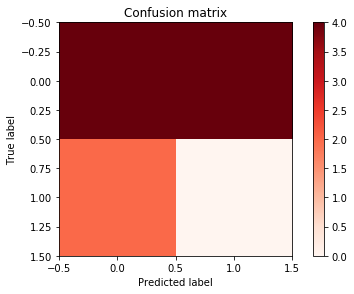

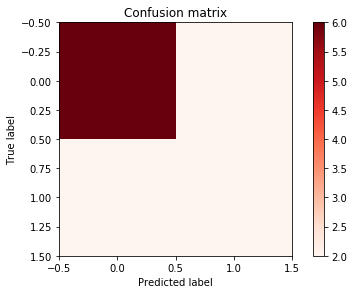

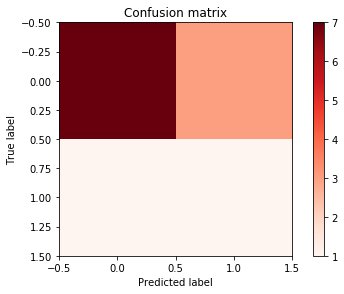

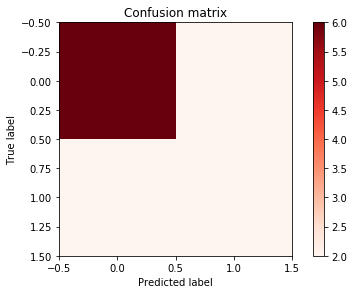

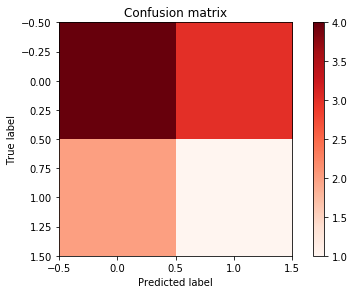

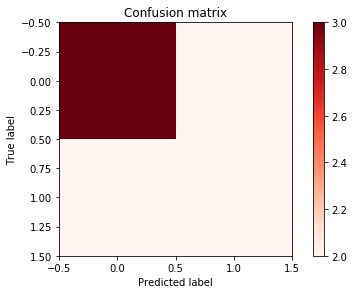

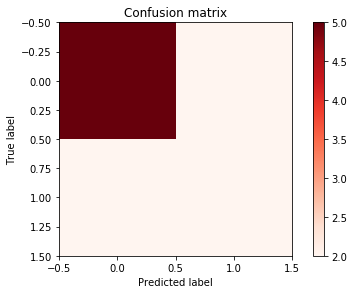

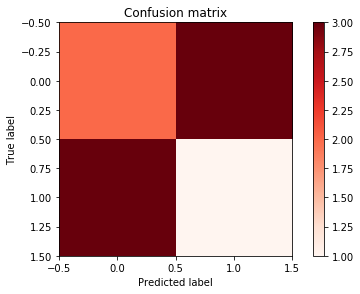

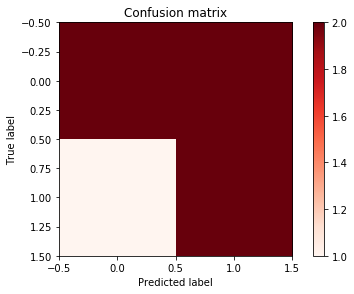

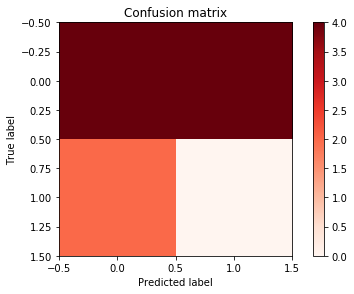

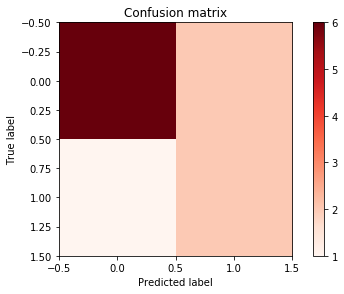

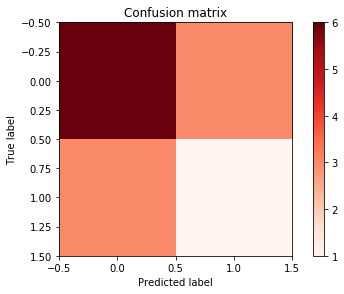

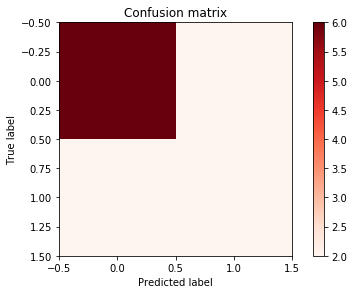

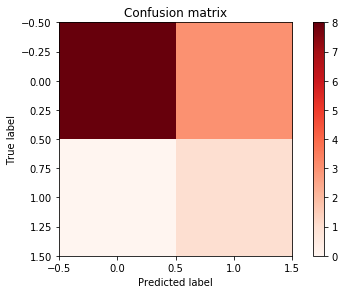

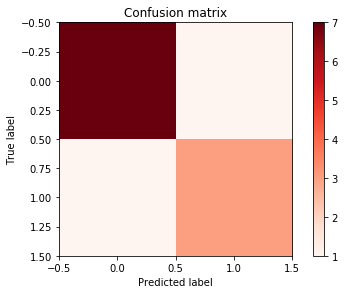

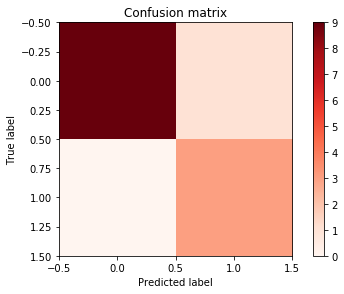

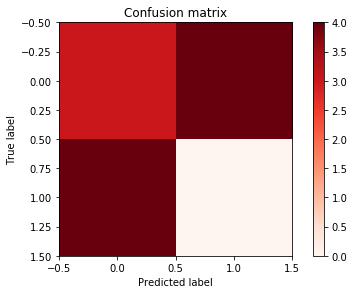

In [646]:
predictions = []
num_correct_list = []
for start, end in season_dates:
    p_list, t_list, num_correct = play_4_me(df_reduced_te, 3, start, end)
    num_correct_list.append(num_correct)
    predictions.append((p_list, t_list))

In [647]:
i = 1
pred_points = []
for week in predictions:
    print('WEEK '+str(i))
    print('Predictions')
    print(week[0])
    print('True')
    print(week[1])
    i +=1
    

WEEK 1
Predictions
[('Greg Olsen', array([1.8])), ('Kyle Rudolph', array([8.6])), ('Zach Ertz', array([9.3])), ('Delanie Walker', array([7.6]))]
True
[('Jason Witten', array([11.9])), ('Charles Clay', array([11.3]))]
WEEK 2
Predictions
[('Antonio Gates', array([7.1])), ('Jimmy Graham', array([0.1])), ('Travis Kelce', array([16.3])), ('Rob Gronkowski', array([17.6]))]
True
[('Jason Witten', array([15.7])), ('Travis Kelce', array([16.3])), ('Rob Gronkowski', array([17.6])), ('Delanie Walker', array([12.2]))]
WEEK 3
Predictions
[('Jimmy Graham', array([7.2])), ('Travis Kelce', array([0.1])), ('Zach Ertz', array([9.5])), ('Rob Gronkowski', array([14.9]))]
True
[('Rob Gronkowski', array([14.9])), ('Charles Clay', array([9.9]))]
WEEK 4
Predictions
[('Jimmy Graham', array([6.1])), ('Travis Kelce', array([17.4])), ('Rob Gronkowski', array([8.])), ('Cameron Brate', array([14.]))]
True
[('Travis Kelce', array([17.4])), ('Zach Ertz', array([8.1])), ('Charles Clay', array([11.2])), ('Cameron Brate

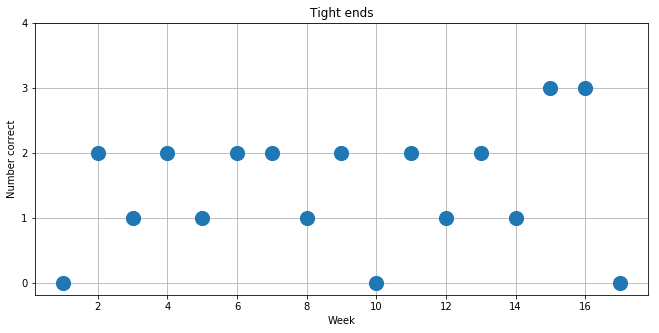

In [648]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(11)
ax.scatter(x=range(1,18),y=num_correct_list, s=200)
ax.set_xlabel('Week')
ax.set_ylabel('Number correct')
ax.set_yticks(np.arange(5));
ax.set_title('Tight ends');
ax.grid()